In [9]:
import pandas as pd
import numpy as np

In [4]:
str_state = 'GA'
file = 'agent_comments_sales_'+str_state


In [5]:
column = 'clean_publicremarks'

In [6]:
noun_sentence_df = pd.read_feather('noun_sentences/' + file + '_withembeddings_erros_' + column + '_nounsentences.fea')


In [7]:
noun_sentence_df

,noun_sentence,count,AVM_Error,AVM_Error_List,Listing_Error,Listing_Error_List,Listingid_List,AVM_Error_Average,Listing_Error_Average,AVM_Error_Indicators,Listing_Error_Indicators
0,great mt vernon woods subdivision,1,0.599963,[0.5999625012919896],-0.032455,[-0.032454780361757106],[210208994],0.599963,-0.032455,[],[]
1,private lot decatur sought-after winnona park,1,0.599905,[0.5999051282051282],-0.025538,[-0.025538461538461538],[173286059],0.599905,-0.025538,[],[]
2,inviting central foyer frames,1,0.599905,[0.5999051282051282],-0.025538,[-0.025538461538461538],[173286059],0.599905,-0.025538,[],[]
3,incredible rear yard w/ limitless potential,1,0.599905,[0.5999051282051282],-0.025538,[-0.025538461538461538],[173286059],0.599905,-0.025538,[],[]
4,geothermal youll,1,0.599767,[0.5997665174825175],-0.047552,[-0.04755244755244755],[6952860],0.599767,-0.047552,[],[]
...,...,...,...,...,...,...,...,...,...,...,...
1849013,combo brick,1,-1.499610,[-1.4996102222222225],-0.533333,[-0.5333333333333333],[84995269],-1.499610,-0.533333,[],[]
1849014,level lots boasts abundance shade,1,-1.499610,[-1.4996102222222225],-0.533333,[-0.5333333333333333],[84995269],-1.499610,-0.533333,[],[]
1849015,straight foyer eat-in kitchen,1,-1.499610,[-1.4996102222222225],-0.533333,[-0.5333333333333333],[84995269],-1.499610,-0.533333,[],[]
1849016,wood storage sheds sits,1,-1.499610,[-1.4996102222222225],-0.533333,[-0.5333333333333333],[84995269],-1.499610,-0.533333,[],[]


In [11]:

import tensorflow as tf
import tensorflow_hub as hub


In [12]:
module_url = "https://tfhub.dev/google/universal-sentence-encoder/4"
model = hub.load(module_url)
print ("module %s loaded" % module_url)

module https://tfhub.dev/google/universal-sentence-encoder/4 loaded


In [10]:
embedding = np.zeros([len(noun_sentence_df), 512])

In [13]:
column = 'noun_sentence'
new_column = column + '_embeddings'
noun_sentence_df[new_column] = noun_sentence_df[column].apply(lambda x: model([x]).numpy()[0]) 

In [17]:
noun_sentence_df

,noun_sentence,count,AVM_Error,AVM_Error_List,Listing_Error,Listing_Error_List,Listingid_List,AVM_Error_Average,Listing_Error_Average,AVM_Error_Indicators,Listing_Error_Indicators,noun_sentence_embeddings
0,great mt vernon woods subdivision,1,0.599963,[0.5999625012919896],-0.032455,[-0.032454780361757106],[210208994],0.599963,-0.032455,[],[],"[[0.013117646, 0.019790076, -0.025902215, 0.00..."
1,private lot decatur sought-after winnona park,1,0.599905,[0.5999051282051282],-0.025538,[-0.025538461538461538],[173286059],0.599905,-0.025538,[],[],"[[0.020273924, 0.020105323, -0.012676716, -0.0..."
2,inviting central foyer frames,1,0.599905,[0.5999051282051282],-0.025538,[-0.025538461538461538],[173286059],0.599905,-0.025538,[],[],"[[-0.045703962, 0.068157814, -0.055449303, 0.0..."
3,incredible rear yard w/ limitless potential,1,0.599905,[0.5999051282051282],-0.025538,[-0.025538461538461538],[173286059],0.599905,-0.025538,[],[],"[[0.032714177, -0.07150339, -0.07707424, -0.03..."
4,geothermal youll,1,0.599767,[0.5997665174825175],-0.047552,[-0.04755244755244755],[6952860],0.599767,-0.047552,[],[],"[[0.017892806, -0.02443172, -0.0288998, -0.048..."
...,...,...,...,...,...,...,...,...,...,...,...,...
1849013,combo brick,1,-1.499610,[-1.4996102222222225],-0.533333,[-0.5333333333333333],[84995269],-1.499610,-0.533333,[],[],"[[0.007024779, -0.0017124295, -0.0627071, 0.05..."
1849014,level lots boasts abundance shade,1,-1.499610,[-1.4996102222222225],-0.533333,[-0.5333333333333333],[84995269],-1.499610,-0.533333,[],[],"[[-0.00205741, -0.06786402, -0.04747214, 0.054..."
1849015,straight foyer eat-in kitchen,1,-1.499610,[-1.4996102222222225],-0.533333,[-0.5333333333333333],[84995269],-1.499610,-0.533333,[],[],"[[-0.0392266, 0.050290033, 0.004388458, 0.0504..."
1849016,wood storage sheds sits,1,-1.499610,[-1.4996102222222225],-0.533333,[-0.5333333333333333],[84995269],-1.499610,-0.533333,[],[],"[[0.032563742, 0.05967781, 0.0041432604, 0.045..."


In [19]:
noun_sentence_df.columns

Index(['noun_sentence', 'count', 'AVM_Error', 'AVM_Error_List',
       'Listing_Error', 'Listing_Error_List', 'Listingid_List',
       'AVM_Error_Average', 'Listing_Error_Average', 'AVM_Error_Indicators',
       'Listing_Error_Indicators', 'noun_sentence_embeddings'],
      dtype='object')

In [21]:
columns_to_split = ['noun_sentence_embeddings', 'noun_sentence_vaderpolarity']

In [35]:
noun_sentence_df_use = noun_sentence_df

In [39]:
for ii in range(len(noun_sentence_df_use)):
    #if (ii%10000==0): 
    tmp = noun_sentence_df_use['noun_sentence_embeddings'][ii]
    print(ii, tmp.shape)
    if noun_sentence_df_use['noun_sentence_embeddings'][ii].shape[0] == 1:
        noun_sentence_df_use['noun_sentence_embeddings'][ii] = tmp[0]
    

0 (512,)
1 (512,)
2 (512,)
3 (512,)
4 (512,)
5 (512,)
6 (512,)
7 (512,)
8 (512,)
9 (512,)
10 (512,)
11 (512,)
12 (512,)
13 (512,)
14 (512,)
15 (512,)
16 (512,)
17 (512,)
18 (512,)
19 (512,)
20 (512,)
21 (512,)
22 (512,)
23 (512,)
24 (512,)
25 (512,)
26 (512,)
27 (512,)
28 (512,)
29 (512,)
30 (512,)
31 (512,)
32 (512,)
33 (512,)
34 (512,)
35 (512,)
36 (512,)
37 (512,)
38 (512,)
39 (512,)
40 (512,)
41 (512,)
42 (512,)
43 (512,)
44 (512,)
45 (512,)
46 (512,)
47 (512,)
48 (512,)
49 (512,)
50 (512,)
51 (512,)
52 (512,)
53 (512,)
54 (512,)
55 (512,)
56 (512,)
57 (512,)
58 (512,)
59 (512,)
60 (512,)
61 (512,)
62 (512,)
63 (512,)
64 (512,)
65 (512,)
66 (512,)
67 (512,)
68 (512,)
69 (512,)
70 (512,)
71 (512,)
72 (512,)
73 (512,)
74 (512,)
75 (512,)
76 (512,)
77 (512,)
78 (512,)
79 (512,)
80 (512,)
81 (512,)
82 (512,)
83 (512,)
84 (512,)
85 (512,)
86 (512,)
87 (512,)
88 (512,)
89 (512,)
90 (512,)
91 (512,)
92 (512,)
93 (512,)
94 (512,)
95 (512,)
96 (512,)
97 (512,)
98 (512,)
99 (512,)
100 (512,)

1245 (512,)
1246 (512,)
1247 (512,)
1248 (512,)
1249 (512,)
1250 (512,)
1251 (512,)
1252 (512,)
1253 (512,)
1254 (512,)
1255 (512,)
1256 (512,)
1257 (512,)
1258 (512,)
1259 (512,)
1260 (512,)
1261 (512,)
1262 (512,)
1263 (512,)
1264 (512,)
1265 (512,)
1266 (512,)
1267 (512,)
1268 (512,)
1269 (512,)
1270 (512,)
1271 (512,)
1272 (512,)
1273 (512,)
1274 (512,)
1275 (512,)
1276 (512,)
1277 (512,)
1278 (512,)
1279 (512,)
1280 (512,)
1281 (512,)
1282 (512,)
1283 (512,)
1284 (512,)
1285 (512,)
1286 (512,)
1287 (512,)
1288 (512,)
1289 (512,)
1290 (512,)
1291 (512,)
1292 (512,)
1293 (512,)
1294 (512,)
1295 (512,)
1296 (512,)
1297 (512,)
1298 (512,)
1299 (512,)
1300 (512,)
1301 (512,)
1302 (512,)
1303 (512,)
1304 (512,)
1305 (512,)
1306 (512,)
1307 (512,)
1308 (512,)
1309 (512,)
1310 (512,)
1311 (512,)
1312 (512,)
1313 (512,)
1314 (512,)
1315 (512,)
1316 (512,)
1317 (512,)
1318 (512,)
1319 (512,)
1320 (512,)
1321 (512,)
1322 (512,)
1323 (512,)
1324 (512,)
1325 (512,)
1326 (512,)
1327 (512,)
1328

2214 (512,)
2215 (512,)
2216 (512,)
2217 (512,)
2218 (512,)
2219 (512,)
2220 (512,)
2221 (512,)
2222 (512,)
2223 (512,)
2224 (512,)
2225 (512,)
2226 (512,)
2227 (512,)
2228 (512,)
2229 (512,)
2230 (512,)
2231 (512,)
2232 (512,)
2233 (512,)
2234 (512,)
2235 (512,)
2236 (512,)
2237 (512,)
2238 (512,)
2239 (512,)
2240 (512,)
2241 (512,)
2242 (512,)
2243 (512,)
2244 (512,)
2245 (512,)
2246 (512,)
2247 (512,)
2248 (512,)
2249 (512,)
2250 (512,)
2251 (512,)
2252 (512,)
2253 (512,)
2254 (512,)
2255 (512,)
2256 (512,)
2257 (512,)
2258 (512,)
2259 (512,)
2260 (512,)
2261 (512,)
2262 (512,)
2263 (512,)
2264 (512,)
2265 (512,)
2266 (512,)
2267 (512,)
2268 (512,)
2269 (512,)
2270 (512,)
2271 (512,)
2272 (512,)
2273 (512,)
2274 (512,)
2275 (512,)
2276 (512,)
2277 (512,)
2278 (512,)
2279 (512,)
2280 (512,)
2281 (512,)
2282 (512,)
2283 (512,)
2284 (512,)
2285 (512,)
2286 (512,)
2287 (512,)
2288 (512,)
2289 (512,)
2290 (512,)
2291 (512,)
2292 (512,)
2293 (512,)
2294 (512,)
2295 (512,)
2296 (512,)
2297

2897 (512,)
2898 (512,)
2899 (512,)
2900 (512,)
2901 (512,)
2902 (512,)
2903 (512,)
2904 (512,)
2905 (512,)
2906 (512,)
2907 (512,)
2908 (512,)
2909 (512,)
2910 (512,)
2911 (512,)
2912 (512,)
2913 (512,)
2914 (512,)
2915 (512,)
2916 (512,)
2917 (512,)
2918 (512,)
2919 (512,)
2920 (512,)
2921 (512,)
2922 (512,)
2923 (512,)
2924 (512,)
2925 (512,)
2926 (512,)
2927 (512,)
2928 (512,)
2929 (512,)
2930 (512,)
2931 (512,)
2932 (512,)
2933 (512,)
2934 (512,)
2935 (512,)
2936 (512,)
2937 (512,)
2938 (512,)
2939 (512,)
2940 (512,)
2941 (512,)
2942 (512,)
2943 (512,)
2944 (512,)
2945 (512,)
2946 (512,)
2947 (512,)
2948 (512,)
2949 (512,)
2950 (512,)
2951 (512,)
2952 (512,)
2953 (512,)
2954 (512,)
2955 (512,)
2956 (512,)
2957 (512,)
2958 (512,)
2959 (512,)
2960 (512,)
2961 (512,)
2962 (512,)
2963 (512,)
2964 (512,)
2965 (512,)
2966 (512,)
2967 (512,)
2968 (512,)
2969 (512,)
2970 (512,)
2971 (512,)
2972 (512,)
2973 (512,)
2974 (512,)
2975 (512,)
2976 (512,)
2977 (512,)
2978 (512,)
2979 (512,)
2980

3639 (512,)
3640 (512,)
3641 (512,)
3642 (512,)
3643 (512,)
3644 (512,)
3645 (512,)
3646 (512,)
3647 (512,)
3648 (512,)
3649 (512,)
3650 (512,)
3651 (512,)
3652 (512,)
3653 (512,)
3654 (512,)
3655 (512,)
3656 (512,)
3657 (512,)
3658 (512,)
3659 (512,)
3660 (512,)
3661 (512,)
3662 (512,)
3663 (512,)
3664 (512,)
3665 (512,)
3666 (512,)
3667 (512,)
3668 (512,)
3669 (512,)
3670 (512,)
3671 (512,)
3672 (512,)
3673 (512,)
3674 (512,)
3675 (512,)
3676 (512,)
3677 (512,)
3678 (512,)
3679 (512,)
3680 (512,)
3681 (512,)
3682 (512,)
3683 (512,)
3684 (512,)
3685 (512,)
3686 (512,)
3687 (512,)
3688 (512,)
3689 (512,)
3690 (512,)
3691 (512,)
3692 (512,)
3693 (512,)
3694 (512,)
3695 (512,)
3696 (512,)
3697 (512,)
3698 (512,)
3699 (512,)
3700 (512,)
3701 (512,)
3702 (512,)
3703 (512,)
3704 (512,)
3705 (512,)
3706 (512,)
3707 (512,)
3708 (512,)
3709 (512,)
3710 (512,)
3711 (512,)
3712 (512,)
3713 (512,)
3714 (512,)
3715 (512,)
3716 (512,)
3717 (512,)
3718 (512,)
3719 (512,)
3720 (512,)
3721 (512,)
3722

4563 (512,)
4564 (512,)
4565 (512,)
4566 (512,)
4567 (512,)
4568 (512,)
4569 (512,)
4570 (512,)
4571 (512,)
4572 (512,)
4573 (512,)
4574 (512,)
4575 (512,)
4576 (512,)
4577 (512,)
4578 (512,)
4579 (512,)
4580 (512,)
4581 (512,)
4582 (512,)
4583 (512,)
4584 (512,)
4585 (512,)
4586 (512,)
4587 (512,)
4588 (512,)
4589 (512,)
4590 (512,)
4591 (512,)
4592 (512,)
4593 (512,)
4594 (512,)
4595 (512,)
4596 (512,)
4597 (512,)
4598 (512,)
4599 (512,)
4600 (512,)
4601 (512,)
4602 (512,)
4603 (512,)
4604 (512,)
4605 (512,)
4606 (512,)
4607 (512,)
4608 (512,)
4609 (512,)
4610 (512,)
4611 (512,)
4612 (512,)
4613 (512,)
4614 (512,)
4615 (512,)
4616 (512,)
4617 (512,)
4618 (512,)
4619 (512,)
4620 (512,)
4621 (512,)
4622 (512,)
4623 (512,)
4624 (512,)
4625 (512,)
4626 (512,)
4627 (512,)
4628 (512,)
4629 (512,)
4630 (512,)
4631 (512,)
4632 (512,)
4633 (512,)
4634 (512,)
4635 (512,)
4636 (512,)
4637 (512,)
4638 (512,)
4639 (512,)
4640 (512,)
4641 (512,)
4642 (512,)
4643 (512,)
4644 (512,)
4645 (512,)
4646

5337 (512,)
5338 (512,)
5339 (512,)
5340 (512,)
5341 (512,)
5342 (512,)
5343 (512,)
5344 (512,)
5345 (512,)
5346 (512,)
5347 (512,)
5348 (512,)
5349 (512,)
5350 (512,)
5351 (512,)
5352 (512,)
5353 (512,)
5354 (512,)
5355 (512,)
5356 (512,)
5357 (512,)
5358 (512,)
5359 (512,)
5360 (512,)
5361 (512,)
5362 (512,)
5363 (512,)
5364 (512,)
5365 (512,)
5366 (512,)
5367 (512,)
5368 (512,)
5369 (512,)
5370 (512,)
5371 (512,)
5372 (512,)
5373 (512,)
5374 (512,)
5375 (512,)
5376 (512,)
5377 (512,)
5378 (512,)
5379 (512,)
5380 (512,)
5381 (512,)
5382 (512,)
5383 (512,)
5384 (512,)
5385 (512,)
5386 (512,)
5387 (512,)
5388 (512,)
5389 (512,)
5390 (512,)
5391 (512,)
5392 (512,)
5393 (512,)
5394 (512,)
5395 (512,)
5396 (512,)
5397 (512,)
5398 (512,)
5399 (512,)
5400 (512,)
5401 (512,)
5402 (512,)
5403 (512,)
5404 (512,)
5405 (512,)
5406 (512,)
5407 (512,)
5408 (512,)
5409 (512,)
5410 (512,)
5411 (512,)
5412 (512,)
5413 (512,)
5414 (512,)
5415 (512,)
5416 (512,)
5417 (512,)
5418 (512,)
5419 (512,)
5420

6510 (512,)
6511 (512,)
6512 (512,)
6513 (512,)
6514 (512,)
6515 (512,)
6516 (512,)
6517 (512,)
6518 (512,)
6519 (512,)
6520 (512,)
6521 (512,)
6522 (512,)
6523 (512,)
6524 (512,)
6525 (512,)
6526 (512,)
6527 (512,)
6528 (512,)
6529 (512,)
6530 (512,)
6531 (512,)
6532 (512,)
6533 (512,)
6534 (512,)
6535 (512,)
6536 (512,)
6537 (512,)
6538 (512,)
6539 (512,)
6540 (512,)
6541 (512,)
6542 (512,)
6543 (512,)
6544 (512,)
6545 (512,)
6546 (512,)
6547 (512,)
6548 (512,)
6549 (512,)
6550 (512,)
6551 (512,)
6552 (512,)
6553 (512,)
6554 (512,)
6555 (512,)
6556 (512,)
6557 (512,)
6558 (512,)
6559 (512,)
6560 (512,)
6561 (512,)
6562 (512,)
6563 (512,)
6564 (512,)
6565 (512,)
6566 (512,)
6567 (512,)
6568 (512,)
6569 (512,)
6570 (512,)
6571 (512,)
6572 (512,)
6573 (512,)
6574 (512,)
6575 (512,)
6576 (512,)
6577 (512,)
6578 (512,)
6579 (512,)
6580 (512,)
6581 (512,)
6582 (512,)
6583 (512,)
6584 (512,)
6585 (512,)
6586 (512,)
6587 (512,)
6588 (512,)
6589 (512,)
6590 (512,)
6591 (512,)
6592 (512,)
6593

7659 (512,)
7660 (512,)
7661 (512,)
7662 (512,)
7663 (512,)
7664 (512,)
7665 (512,)
7666 (512,)
7667 (512,)
7668 (512,)
7669 (512,)
7670 (512,)
7671 (512,)
7672 (512,)
7673 (512,)
7674 (512,)
7675 (512,)
7676 (512,)
7677 (512,)
7678 (512,)
7679 (512,)
7680 (512,)
7681 (512,)
7682 (512,)
7683 (512,)
7684 (512,)
7685 (512,)
7686 (512,)
7687 (512,)
7688 (512,)
7689 (512,)
7690 (512,)
7691 (512,)
7692 (512,)
7693 (512,)
7694 (512,)
7695 (512,)
7696 (512,)
7697 (512,)
7698 (512,)
7699 (512,)
7700 (512,)
7701 (512,)
7702 (512,)
7703 (512,)
7704 (512,)
7705 (512,)
7706 (512,)
7707 (512,)
7708 (512,)
7709 (512,)
7710 (512,)
7711 (512,)
7712 (512,)
7713 (512,)
7714 (512,)
7715 (512,)
7716 (512,)
7717 (512,)
7718 (512,)
7719 (512,)
7720 (512,)
7721 (512,)
7722 (512,)
7723 (512,)
7724 (512,)
7725 (512,)
7726 (512,)
7727 (512,)
7728 (512,)
7729 (512,)
7730 (512,)
7731 (512,)
7732 (512,)
7733 (512,)
7734 (512,)
7735 (512,)
7736 (512,)
7737 (512,)
7738 (512,)
7739 (512,)
7740 (512,)
7741 (512,)
7742

8668 (512,)
8669 (512,)
8670 (512,)
8671 (512,)
8672 (512,)
8673 (512,)
8674 (512,)
8675 (512,)
8676 (512,)
8677 (512,)
8678 (512,)
8679 (512,)
8680 (512,)
8681 (512,)
8682 (512,)
8683 (512,)
8684 (512,)
8685 (512,)
8686 (512,)
8687 (512,)
8688 (512,)
8689 (512,)
8690 (512,)
8691 (512,)
8692 (512,)
8693 (512,)
8694 (512,)
8695 (512,)
8696 (512,)
8697 (512,)
8698 (512,)
8699 (512,)
8700 (512,)
8701 (512,)
8702 (512,)
8703 (512,)
8704 (512,)
8705 (512,)
8706 (512,)
8707 (512,)
8708 (512,)
8709 (512,)
8710 (512,)
8711 (512,)
8712 (512,)
8713 (512,)
8714 (512,)
8715 (512,)
8716 (512,)
8717 (512,)
8718 (512,)
8719 (512,)
8720 (512,)
8721 (512,)
8722 (512,)
8723 (512,)
8724 (512,)
8725 (512,)
8726 (512,)
8727 (512,)
8728 (512,)
8729 (512,)
8730 (512,)
8731 (512,)
8732 (512,)
8733 (512,)
8734 (512,)
8735 (512,)
8736 (512,)
8737 (512,)
8738 (512,)
8739 (512,)
8740 (512,)
8741 (512,)
8742 (512,)
8743 (512,)
8744 (512,)
8745 (512,)
8746 (512,)
8747 (512,)
8748 (512,)
8749 (512,)
8750 (512,)
8751

9539 (512,)
9540 (512,)
9541 (512,)
9542 (512,)
9543 (512,)
9544 (512,)
9545 (512,)
9546 (512,)
9547 (512,)
9548 (512,)
9549 (512,)
9550 (512,)
9551 (512,)
9552 (512,)
9553 (512,)
9554 (512,)
9555 (512,)
9556 (512,)
9557 (512,)
9558 (512,)
9559 (512,)
9560 (512,)
9561 (512,)
9562 (512,)
9563 (512,)
9564 (512,)
9565 (512,)
9566 (512,)
9567 (512,)
9568 (512,)
9569 (512,)
9570 (512,)
9571 (512,)
9572 (512,)
9573 (512,)
9574 (512,)
9575 (512,)
9576 (512,)
9577 (512,)
9578 (512,)
9579 (512,)
9580 (512,)
9581 (512,)
9582 (512,)
9583 (512,)
9584 (512,)
9585 (512,)
9586 (512,)
9587 (512,)
9588 (512,)
9589 (512,)
9590 (512,)
9591 (512,)
9592 (512,)
9593 (512,)
9594 (512,)
9595 (512,)
9596 (512,)
9597 (512,)
9598 (512,)
9599 (512,)
9600 (512,)
9601 (512,)
9602 (512,)
9603 (512,)
9604 (512,)
9605 (512,)
9606 (512,)
9607 (512,)
9608 (512,)
9609 (512,)
9610 (512,)
9611 (512,)
9612 (512,)
9613 (512,)
9614 (512,)
9615 (512,)
9616 (512,)
9617 (512,)
9618 (512,)
9619 (512,)
9620 (512,)
9621 (512,)
9622

10268 (512,)
10269 (512,)
10270 (512,)
10271 (512,)
10272 (512,)
10273 (512,)
10274 (512,)
10275 (512,)
10276 (512,)
10277 (512,)
10278 (512,)
10279 (512,)
10280 (512,)
10281 (512,)
10282 (512,)
10283 (512,)
10284 (512,)
10285 (512,)
10286 (512,)
10287 (512,)
10288 (512,)
10289 (512,)
10290 (512,)
10291 (512,)
10292 (512,)
10293 (512,)
10294 (512,)
10295 (512,)
10296 (512,)
10297 (512,)
10298 (512,)
10299 (512,)
10300 (512,)
10301 (512,)
10302 (512,)
10303 (512,)
10304 (512,)
10305 (512,)
10306 (512,)
10307 (512,)
10308 (512,)
10309 (512,)
10310 (512,)
10311 (512,)
10312 (512,)
10313 (512,)
10314 (512,)
10315 (512,)
10316 (512,)
10317 (512,)
10318 (512,)
10319 (512,)
10320 (512,)
10321 (512,)
10322 (512,)
10323 (512,)
10324 (512,)
10325 (512,)
10326 (512,)
10327 (512,)
10328 (512,)
10329 (512,)
10330 (512,)
10331 (512,)
10332 (512,)
10333 (512,)
10334 (512,)
10335 (512,)
10336 (512,)
10337 (512,)
10338 (512,)
10339 (512,)
10340 (512,)
10341 (512,)
10342 (512,)
10343 (512,)
10344 (512,)

11041 (512,)
11042 (512,)
11043 (512,)
11044 (512,)
11045 (512,)
11046 (512,)
11047 (512,)
11048 (512,)
11049 (512,)
11050 (512,)
11051 (512,)
11052 (512,)
11053 (512,)
11054 (512,)
11055 (512,)
11056 (512,)
11057 (512,)
11058 (512,)
11059 (512,)
11060 (512,)
11061 (512,)
11062 (512,)
11063 (512,)
11064 (512,)
11065 (512,)
11066 (512,)
11067 (512,)
11068 (512,)
11069 (512,)
11070 (512,)
11071 (512,)
11072 (512,)
11073 (512,)
11074 (512,)
11075 (512,)
11076 (512,)
11077 (512,)
11078 (512,)
11079 (512,)
11080 (512,)
11081 (512,)
11082 (512,)
11083 (512,)
11084 (512,)
11085 (512,)
11086 (512,)
11087 (512,)
11088 (512,)
11089 (512,)
11090 (512,)
11091 (512,)
11092 (512,)
11093 (512,)
11094 (512,)
11095 (512,)
11096 (512,)
11097 (512,)
11098 (512,)
11099 (512,)
11100 (512,)
11101 (512,)
11102 (512,)
11103 (512,)
11104 (512,)
11105 (512,)
11106 (512,)
11107 (512,)
11108 (512,)
11109 (512,)
11110 (512,)
11111 (512,)
11112 (512,)
11113 (512,)
11114 (512,)
11115 (512,)
11116 (512,)
11117 (512,)

11686 (512,)
11687 (512,)
11688 (512,)
11689 (512,)
11690 (512,)
11691 (512,)
11692 (512,)
11693 (512,)
11694 (512,)
11695 (512,)
11696 (512,)
11697 (512,)
11698 (512,)
11699 (512,)
11700 (512,)
11701 (512,)
11702 (512,)
11703 (512,)
11704 (512,)
11705 (512,)
11706 (512,)
11707 (512,)
11708 (512,)
11709 (512,)
11710 (512,)
11711 (512,)
11712 (512,)
11713 (512,)
11714 (512,)
11715 (512,)
11716 (512,)
11717 (512,)
11718 (512,)
11719 (512,)
11720 (512,)
11721 (512,)
11722 (512,)
11723 (512,)
11724 (512,)
11725 (512,)
11726 (512,)
11727 (512,)
11728 (512,)
11729 (512,)
11730 (512,)
11731 (512,)
11732 (512,)
11733 (512,)
11734 (512,)
11735 (512,)
11736 (512,)
11737 (512,)
11738 (512,)
11739 (512,)
11740 (512,)
11741 (512,)
11742 (512,)
11743 (512,)
11744 (512,)
11745 (512,)
11746 (512,)
11747 (512,)
11748 (512,)
11749 (512,)
11750 (512,)
11751 (512,)
11752 (512,)
11753 (512,)
11754 (512,)
11755 (512,)
11756 (512,)
11757 (512,)
11758 (512,)
11759 (512,)
11760 (512,)
11761 (512,)
11762 (512,)

12610 (512,)
12611 (512,)
12612 (512,)
12613 (512,)
12614 (512,)
12615 (512,)
12616 (512,)
12617 (512,)
12618 (512,)
12619 (512,)
12620 (512,)
12621 (512,)
12622 (512,)
12623 (512,)
12624 (512,)
12625 (512,)
12626 (512,)
12627 (512,)
12628 (512,)
12629 (512,)
12630 (512,)
12631 (512,)
12632 (512,)
12633 (512,)
12634 (512,)
12635 (512,)
12636 (512,)
12637 (512,)
12638 (512,)
12639 (512,)
12640 (512,)
12641 (512,)
12642 (512,)
12643 (512,)
12644 (512,)
12645 (512,)
12646 (512,)
12647 (512,)
12648 (512,)
12649 (512,)
12650 (512,)
12651 (512,)
12652 (512,)
12653 (512,)
12654 (512,)
12655 (512,)
12656 (512,)
12657 (512,)
12658 (512,)
12659 (512,)
12660 (512,)
12661 (512,)
12662 (512,)
12663 (512,)
12664 (512,)
12665 (512,)
12666 (512,)
12667 (512,)
12668 (512,)
12669 (512,)
12670 (512,)
12671 (512,)
12672 (512,)
12673 (512,)
12674 (512,)
12675 (512,)
12676 (512,)
12677 (512,)
12678 (512,)
12679 (512,)
12680 (512,)
12681 (512,)
12682 (512,)
12683 (512,)
12684 (512,)
12685 (512,)
12686 (512,)

13572 (512,)
13573 (512,)
13574 (512,)
13575 (512,)
13576 (512,)
13577 (512,)
13578 (512,)
13579 (512,)
13580 (512,)
13581 (512,)
13582 (512,)
13583 (512,)
13584 (512,)
13585 (512,)
13586 (512,)
13587 (512,)
13588 (512,)
13589 (512,)
13590 (512,)
13591 (512,)
13592 (512,)
13593 (512,)
13594 (512,)
13595 (512,)
13596 (512,)
13597 (512,)
13598 (512,)
13599 (512,)
13600 (512,)
13601 (512,)
13602 (512,)
13603 (512,)
13604 (512,)
13605 (512,)
13606 (512,)
13607 (512,)
13608 (512,)
13609 (512,)
13610 (512,)
13611 (512,)
13612 (512,)
13613 (512,)
13614 (512,)
13615 (512,)
13616 (512,)
13617 (512,)
13618 (512,)
13619 (512,)
13620 (512,)
13621 (512,)
13622 (512,)
13623 (512,)
13624 (512,)
13625 (512,)
13626 (512,)
13627 (512,)
13628 (512,)
13629 (512,)
13630 (512,)
13631 (512,)
13632 (512,)
13633 (512,)
13634 (512,)
13635 (512,)
13636 (512,)
13637 (512,)
13638 (512,)
13639 (512,)
13640 (512,)
13641 (512,)
13642 (512,)
13643 (512,)
13644 (512,)
13645 (512,)
13646 (512,)
13647 (512,)
13648 (512,)

14334 (512,)
14335 (512,)
14336 (512,)
14337 (512,)
14338 (512,)
14339 (512,)
14340 (512,)
14341 (512,)
14342 (512,)
14343 (512,)
14344 (512,)
14345 (512,)
14346 (512,)
14347 (512,)
14348 (512,)
14349 (512,)
14350 (512,)
14351 (512,)
14352 (512,)
14353 (512,)
14354 (512,)
14355 (512,)
14356 (512,)
14357 (512,)
14358 (512,)
14359 (512,)
14360 (512,)
14361 (512,)
14362 (512,)
14363 (512,)
14364 (512,)
14365 (512,)
14366 (512,)
14367 (512,)
14368 (512,)
14369 (512,)
14370 (512,)
14371 (512,)
14372 (512,)
14373 (512,)
14374 (512,)
14375 (512,)
14376 (512,)
14377 (512,)
14378 (512,)
14379 (512,)
14380 (512,)
14381 (512,)
14382 (512,)
14383 (512,)
14384 (512,)
14385 (512,)
14386 (512,)
14387 (512,)
14388 (512,)
14389 (512,)
14390 (512,)
14391 (512,)
14392 (512,)
14393 (512,)
14394 (512,)
14395 (512,)
14396 (512,)
14397 (512,)
14398 (512,)
14399 (512,)
14400 (512,)
14401 (512,)
14402 (512,)
14403 (512,)
14404 (512,)
14405 (512,)
14406 (512,)
14407 (512,)
14408 (512,)
14409 (512,)
14410 (512,)

15337 (512,)
15338 (512,)
15339 (512,)
15340 (512,)
15341 (512,)
15342 (512,)
15343 (512,)
15344 (512,)
15345 (512,)
15346 (512,)
15347 (512,)
15348 (512,)
15349 (512,)
15350 (512,)
15351 (512,)
15352 (512,)
15353 (512,)
15354 (512,)
15355 (512,)
15356 (512,)
15357 (512,)
15358 (512,)
15359 (512,)
15360 (512,)
15361 (512,)
15362 (512,)
15363 (512,)
15364 (512,)
15365 (512,)
15366 (512,)
15367 (512,)
15368 (512,)
15369 (512,)
15370 (512,)
15371 (512,)
15372 (512,)
15373 (512,)
15374 (512,)
15375 (512,)
15376 (512,)
15377 (512,)
15378 (512,)
15379 (512,)
15380 (512,)
15381 (512,)
15382 (512,)
15383 (512,)
15384 (512,)
15385 (512,)
15386 (512,)
15387 (512,)
15388 (512,)
15389 (512,)
15390 (512,)
15391 (512,)
15392 (512,)
15393 (512,)
15394 (512,)
15395 (512,)
15396 (512,)
15397 (512,)
15398 (512,)
15399 (512,)
15400 (512,)
15401 (512,)
15402 (512,)
15403 (512,)
15404 (512,)
15405 (512,)
15406 (512,)
15407 (512,)
15408 (512,)
15409 (512,)
15410 (512,)
15411 (512,)
15412 (512,)
15413 (512,)

/usr/local/lib/python3.6/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


15989 (1, 512)
15990 (1, 512)
15991 (1, 512)
15992 (1, 512)
15993 (1, 512)
15994 (1, 512)
15995 (1, 512)
15996 (1, 512)
15997 (1, 512)
15998 (1, 512)
15999 (1, 512)
16000 (1, 512)
16001 (1, 512)
16002 (1, 512)
16003 (1, 512)
16004 (1, 512)
16005 (1, 512)
16006 (1, 512)
16007 (1, 512)
16008 (1, 512)
16009 (1, 512)
16010 (1, 512)
16011 (1, 512)
16012 (1, 512)
16013 (1, 512)
16014 (1, 512)
16015 (1, 512)
16016 (1, 512)
16017 (1, 512)
16018 (1, 512)
16019 (1, 512)
16020 (1, 512)
16021 (1, 512)
16022 (1, 512)
16023 (1, 512)
16024 (1, 512)
16025 (1, 512)
16026 (1, 512)
16027 (1, 512)
16028 (1, 512)
16029 (1, 512)
16030 (1, 512)
16031 (1, 512)
16032 (1, 512)
16033 (1, 512)
16034 (1, 512)
16035 (1, 512)
16036 (1, 512)
16037 (1, 512)
16038 (1, 512)
16039 (1, 512)
16040 (1, 512)
16041 (1, 512)
16042 (1, 512)
16043 (1, 512)
16044 (1, 512)
16045 (1, 512)
16046 (1, 512)
16047 (1, 512)
16048 (1, 512)
16049 (1, 512)
16050 (1, 512)
16051 (1, 512)
16052 (1, 512)
16053 (1, 512)
16054 (1, 512)
16055 (1, 

16538 (1, 512)
16539 (1, 512)
16540 (1, 512)
16541 (1, 512)
16542 (1, 512)
16543 (1, 512)
16544 (1, 512)
16545 (1, 512)
16546 (1, 512)
16547 (1, 512)
16548 (1, 512)
16549 (1, 512)
16550 (1, 512)
16551 (1, 512)
16552 (1, 512)
16553 (1, 512)
16554 (1, 512)
16555 (1, 512)
16556 (1, 512)
16557 (1, 512)
16558 (1, 512)
16559 (1, 512)
16560 (1, 512)
16561 (1, 512)
16562 (1, 512)
16563 (1, 512)
16564 (1, 512)
16565 (1, 512)
16566 (1, 512)
16567 (1, 512)
16568 (1, 512)
16569 (1, 512)
16570 (1, 512)
16571 (1, 512)
16572 (1, 512)
16573 (1, 512)
16574 (1, 512)
16575 (1, 512)
16576 (1, 512)
16577 (1, 512)
16578 (1, 512)
16579 (1, 512)
16580 (1, 512)
16581 (1, 512)
16582 (1, 512)
16583 (1, 512)
16584 (1, 512)
16585 (1, 512)
16586 (1, 512)
16587 (1, 512)
16588 (1, 512)
16589 (1, 512)
16590 (1, 512)
16591 (1, 512)
16592 (1, 512)
16593 (1, 512)
16594 (1, 512)
16595 (1, 512)
16596 (1, 512)
16597 (1, 512)
16598 (1, 512)
16599 (1, 512)
16600 (1, 512)
16601 (1, 512)
16602 (1, 512)
16603 (1, 512)
16604 (1, 

17088 (1, 512)
17089 (1, 512)
17090 (1, 512)
17091 (1, 512)
17092 (1, 512)
17093 (1, 512)
17094 (1, 512)
17095 (1, 512)
17096 (1, 512)
17097 (1, 512)
17098 (1, 512)
17099 (1, 512)
17100 (1, 512)
17101 (1, 512)
17102 (1, 512)
17103 (1, 512)
17104 (1, 512)
17105 (1, 512)
17106 (1, 512)
17107 (1, 512)
17108 (1, 512)
17109 (1, 512)
17110 (1, 512)
17111 (1, 512)
17112 (1, 512)
17113 (1, 512)
17114 (1, 512)
17115 (1, 512)
17116 (1, 512)
17117 (1, 512)
17118 (1, 512)
17119 (1, 512)
17120 (1, 512)
17121 (1, 512)
17122 (1, 512)
17123 (1, 512)
17124 (1, 512)
17125 (1, 512)
17126 (1, 512)
17127 (1, 512)
17128 (1, 512)
17129 (1, 512)
17130 (1, 512)
17131 (1, 512)
17132 (1, 512)
17133 (1, 512)
17134 (1, 512)
17135 (1, 512)
17136 (1, 512)
17137 (1, 512)
17138 (1, 512)
17139 (1, 512)
17140 (1, 512)
17141 (1, 512)
17142 (1, 512)
17143 (1, 512)
17144 (1, 512)
17145 (1, 512)
17146 (1, 512)
17147 (1, 512)
17148 (1, 512)
17149 (1, 512)
17150 (1, 512)
17151 (1, 512)
17152 (1, 512)
17153 (1, 512)
17154 (1, 

17635 (1, 512)
17636 (1, 512)
17637 (1, 512)
17638 (1, 512)
17639 (1, 512)
17640 (1, 512)
17641 (1, 512)
17642 (1, 512)
17643 (1, 512)
17644 (1, 512)
17645 (1, 512)
17646 (1, 512)
17647 (1, 512)
17648 (1, 512)
17649 (1, 512)
17650 (1, 512)
17651 (1, 512)
17652 (1, 512)
17653 (1, 512)
17654 (1, 512)
17655 (1, 512)
17656 (1, 512)
17657 (1, 512)
17658 (1, 512)
17659 (1, 512)
17660 (1, 512)
17661 (1, 512)
17662 (1, 512)
17663 (1, 512)
17664 (1, 512)
17665 (1, 512)
17666 (1, 512)
17667 (1, 512)
17668 (1, 512)
17669 (1, 512)
17670 (1, 512)
17671 (1, 512)
17672 (1, 512)
17673 (1, 512)
17674 (1, 512)
17675 (1, 512)
17676 (1, 512)
17677 (1, 512)
17678 (1, 512)
17679 (1, 512)
17680 (1, 512)
17681 (1, 512)
17682 (1, 512)
17683 (1, 512)
17684 (1, 512)
17685 (1, 512)
17686 (1, 512)
17687 (1, 512)
17688 (1, 512)
17689 (1, 512)
17690 (1, 512)
17691 (1, 512)
17692 (1, 512)
17693 (1, 512)
17694 (1, 512)
17695 (1, 512)
17696 (1, 512)
17697 (1, 512)
17698 (1, 512)
17699 (1, 512)
17700 (1, 512)
17701 (1, 

18190 (1, 512)
18191 (1, 512)
18192 (1, 512)
18193 (1, 512)
18194 (1, 512)
18195 (1, 512)
18196 (1, 512)
18197 (1, 512)
18198 (1, 512)
18199 (1, 512)
18200 (1, 512)
18201 (1, 512)
18202 (1, 512)
18203 (1, 512)
18204 (1, 512)
18205 (1, 512)
18206 (1, 512)
18207 (1, 512)
18208 (1, 512)
18209 (1, 512)
18210 (1, 512)
18211 (1, 512)
18212 (1, 512)
18213 (1, 512)
18214 (1, 512)
18215 (1, 512)
18216 (1, 512)
18217 (1, 512)
18218 (1, 512)
18219 (1, 512)
18220 (1, 512)
18221 (1, 512)
18222 (1, 512)
18223 (1, 512)
18224 (1, 512)
18225 (1, 512)
18226 (1, 512)
18227 (1, 512)
18228 (1, 512)
18229 (1, 512)
18230 (1, 512)
18231 (1, 512)
18232 (1, 512)
18233 (1, 512)
18234 (1, 512)
18235 (1, 512)
18236 (1, 512)
18237 (1, 512)
18238 (1, 512)
18239 (1, 512)
18240 (1, 512)
18241 (1, 512)
18242 (1, 512)
18243 (1, 512)
18244 (1, 512)
18245 (1, 512)
18246 (1, 512)
18247 (1, 512)
18248 (1, 512)
18249 (1, 512)
18250 (1, 512)
18251 (1, 512)
18252 (1, 512)
18253 (1, 512)
18254 (1, 512)
18255 (1, 512)
18256 (1, 

18744 (1, 512)
18745 (1, 512)
18746 (1, 512)
18747 (1, 512)
18748 (1, 512)
18749 (1, 512)
18750 (1, 512)
18751 (1, 512)
18752 (1, 512)
18753 (1, 512)
18754 (1, 512)
18755 (1, 512)
18756 (1, 512)
18757 (1, 512)
18758 (1, 512)
18759 (1, 512)
18760 (1, 512)
18761 (1, 512)
18762 (1, 512)
18763 (1, 512)
18764 (1, 512)
18765 (1, 512)
18766 (1, 512)
18767 (1, 512)
18768 (1, 512)
18769 (1, 512)
18770 (1, 512)
18771 (1, 512)
18772 (1, 512)
18773 (1, 512)
18774 (1, 512)
18775 (1, 512)
18776 (1, 512)
18777 (1, 512)
18778 (1, 512)
18779 (1, 512)
18780 (1, 512)
18781 (1, 512)
18782 (1, 512)
18783 (1, 512)
18784 (1, 512)
18785 (1, 512)
18786 (1, 512)
18787 (1, 512)
18788 (1, 512)
18789 (1, 512)
18790 (1, 512)
18791 (1, 512)
18792 (1, 512)
18793 (1, 512)
18794 (1, 512)
18795 (1, 512)
18796 (1, 512)
18797 (1, 512)
18798 (1, 512)
18799 (1, 512)
18800 (1, 512)
18801 (1, 512)
18802 (1, 512)
18803 (1, 512)
18804 (1, 512)
18805 (1, 512)
18806 (1, 512)
18807 (1, 512)
18808 (1, 512)
18809 (1, 512)
18810 (1, 

19296 (1, 512)
19297 (1, 512)
19298 (1, 512)
19299 (1, 512)
19300 (1, 512)
19301 (1, 512)
19302 (1, 512)
19303 (1, 512)
19304 (1, 512)
19305 (1, 512)
19306 (1, 512)
19307 (1, 512)
19308 (1, 512)
19309 (1, 512)
19310 (1, 512)
19311 (1, 512)
19312 (1, 512)
19313 (1, 512)
19314 (1, 512)
19315 (1, 512)
19316 (1, 512)
19317 (1, 512)
19318 (1, 512)
19319 (1, 512)
19320 (1, 512)
19321 (1, 512)
19322 (1, 512)
19323 (1, 512)
19324 (1, 512)
19325 (1, 512)
19326 (1, 512)
19327 (1, 512)
19328 (1, 512)
19329 (1, 512)
19330 (1, 512)
19331 (1, 512)
19332 (1, 512)
19333 (1, 512)
19334 (1, 512)
19335 (1, 512)
19336 (1, 512)
19337 (1, 512)
19338 (1, 512)
19339 (1, 512)
19340 (1, 512)
19341 (1, 512)
19342 (1, 512)
19343 (1, 512)
19344 (1, 512)
19345 (1, 512)
19346 (1, 512)
19347 (1, 512)
19348 (1, 512)
19349 (1, 512)
19350 (1, 512)
19351 (1, 512)
19352 (1, 512)
19353 (1, 512)
19354 (1, 512)
19355 (1, 512)
19356 (1, 512)
19357 (1, 512)
19358 (1, 512)
19359 (1, 512)
19360 (1, 512)
19361 (1, 512)
19362 (1, 

19850 (1, 512)
19851 (1, 512)
19852 (1, 512)
19853 (1, 512)
19854 (1, 512)
19855 (1, 512)
19856 (1, 512)
19857 (1, 512)
19858 (1, 512)
19859 (1, 512)
19860 (1, 512)
19861 (1, 512)
19862 (1, 512)
19863 (1, 512)
19864 (1, 512)
19865 (1, 512)
19866 (1, 512)
19867 (1, 512)
19868 (1, 512)
19869 (1, 512)
19870 (1, 512)
19871 (1, 512)
19872 (1, 512)
19873 (1, 512)
19874 (1, 512)
19875 (1, 512)
19876 (1, 512)
19877 (1, 512)
19878 (1, 512)
19879 (1, 512)
19880 (1, 512)
19881 (1, 512)
19882 (1, 512)
19883 (1, 512)
19884 (1, 512)
19885 (1, 512)
19886 (1, 512)
19887 (1, 512)
19888 (1, 512)
19889 (1, 512)
19890 (1, 512)
19891 (1, 512)
19892 (1, 512)
19893 (1, 512)
19894 (1, 512)
19895 (1, 512)
19896 (1, 512)
19897 (1, 512)
19898 (1, 512)
19899 (1, 512)
19900 (1, 512)
19901 (1, 512)
19902 (1, 512)
19903 (1, 512)
19904 (1, 512)
19905 (1, 512)
19906 (1, 512)
19907 (1, 512)
19908 (1, 512)
19909 (1, 512)
19910 (1, 512)
19911 (1, 512)
19912 (1, 512)
19913 (1, 512)
19914 (1, 512)
19915 (1, 512)
19916 (1, 

20396 (1, 512)
20397 (1, 512)
20398 (1, 512)
20399 (1, 512)
20400 (1, 512)
20401 (1, 512)
20402 (1, 512)
20403 (1, 512)
20404 (1, 512)
20405 (1, 512)
20406 (1, 512)
20407 (1, 512)
20408 (1, 512)
20409 (1, 512)
20410 (1, 512)
20411 (1, 512)
20412 (1, 512)
20413 (1, 512)
20414 (1, 512)
20415 (1, 512)
20416 (1, 512)
20417 (1, 512)
20418 (1, 512)
20419 (1, 512)
20420 (1, 512)
20421 (1, 512)
20422 (1, 512)
20423 (1, 512)
20424 (1, 512)
20425 (1, 512)
20426 (1, 512)
20427 (1, 512)
20428 (1, 512)
20429 (1, 512)
20430 (1, 512)
20431 (1, 512)
20432 (1, 512)
20433 (1, 512)
20434 (1, 512)
20435 (1, 512)
20436 (1, 512)
20437 (1, 512)
20438 (1, 512)
20439 (1, 512)
20440 (1, 512)
20441 (1, 512)
20442 (1, 512)
20443 (1, 512)
20444 (1, 512)
20445 (1, 512)
20446 (1, 512)
20447 (1, 512)
20448 (1, 512)
20449 (1, 512)
20450 (1, 512)
20451 (1, 512)
20452 (1, 512)
20453 (1, 512)
20454 (1, 512)
20455 (1, 512)
20456 (1, 512)
20457 (1, 512)
20458 (1, 512)
20459 (1, 512)
20460 (1, 512)
20461 (1, 512)
20462 (1, 

20943 (1, 512)
20944 (1, 512)
20945 (1, 512)
20946 (1, 512)
20947 (1, 512)
20948 (1, 512)
20949 (1, 512)
20950 (1, 512)
20951 (1, 512)
20952 (1, 512)
20953 (1, 512)
20954 (1, 512)
20955 (1, 512)
20956 (1, 512)
20957 (1, 512)
20958 (1, 512)
20959 (1, 512)
20960 (1, 512)
20961 (1, 512)
20962 (1, 512)
20963 (1, 512)
20964 (1, 512)
20965 (1, 512)
20966 (1, 512)
20967 (1, 512)
20968 (1, 512)
20969 (1, 512)
20970 (1, 512)
20971 (1, 512)
20972 (1, 512)
20973 (1, 512)
20974 (1, 512)
20975 (1, 512)
20976 (1, 512)
20977 (1, 512)
20978 (1, 512)
20979 (1, 512)
20980 (1, 512)
20981 (1, 512)
20982 (1, 512)
20983 (1, 512)
20984 (1, 512)
20985 (1, 512)
20986 (1, 512)
20987 (1, 512)
20988 (1, 512)
20989 (1, 512)
20990 (1, 512)
20991 (1, 512)
20992 (1, 512)
20993 (1, 512)
20994 (1, 512)
20995 (1, 512)
20996 (1, 512)
20997 (1, 512)
20998 (1, 512)
20999 (1, 512)
21000 (1, 512)
21001 (1, 512)
21002 (1, 512)
21003 (1, 512)
21004 (1, 512)
21005 (1, 512)
21006 (1, 512)
21007 (1, 512)
21008 (1, 512)
21009 (1, 

21498 (1, 512)
21499 (1, 512)
21500 (1, 512)
21501 (1, 512)
21502 (1, 512)
21503 (1, 512)
21504 (1, 512)
21505 (1, 512)
21506 (1, 512)
21507 (1, 512)
21508 (1, 512)
21509 (1, 512)
21510 (1, 512)
21511 (1, 512)
21512 (1, 512)
21513 (1, 512)
21514 (1, 512)
21515 (1, 512)
21516 (1, 512)
21517 (1, 512)
21518 (1, 512)
21519 (1, 512)
21520 (1, 512)
21521 (1, 512)
21522 (1, 512)
21523 (1, 512)
21524 (1, 512)
21525 (1, 512)
21526 (1, 512)
21527 (1, 512)
21528 (1, 512)
21529 (1, 512)
21530 (1, 512)
21531 (1, 512)
21532 (1, 512)
21533 (1, 512)
21534 (1, 512)
21535 (1, 512)
21536 (1, 512)
21537 (1, 512)
21538 (1, 512)
21539 (1, 512)
21540 (1, 512)
21541 (1, 512)
21542 (1, 512)
21543 (1, 512)
21544 (1, 512)
21545 (1, 512)
21546 (1, 512)
21547 (1, 512)
21548 (1, 512)
21549 (1, 512)
21550 (1, 512)
21551 (1, 512)
21552 (1, 512)
21553 (1, 512)
21554 (1, 512)
21555 (1, 512)
21556 (1, 512)
21557 (1, 512)
21558 (1, 512)
21559 (1, 512)
21560 (1, 512)
21561 (1, 512)
21562 (1, 512)
21563 (1, 512)
21564 (1, 

22045 (1, 512)
22046 (1, 512)
22047 (1, 512)
22048 (1, 512)
22049 (1, 512)
22050 (1, 512)
22051 (1, 512)
22052 (1, 512)
22053 (1, 512)
22054 (1, 512)
22055 (1, 512)
22056 (1, 512)
22057 (1, 512)
22058 (1, 512)
22059 (1, 512)
22060 (1, 512)
22061 (1, 512)
22062 (1, 512)
22063 (1, 512)
22064 (1, 512)
22065 (1, 512)
22066 (1, 512)
22067 (1, 512)
22068 (1, 512)
22069 (1, 512)
22070 (1, 512)
22071 (1, 512)
22072 (1, 512)
22073 (1, 512)
22074 (1, 512)
22075 (1, 512)
22076 (1, 512)
22077 (1, 512)
22078 (1, 512)
22079 (1, 512)
22080 (1, 512)
22081 (1, 512)
22082 (1, 512)
22083 (1, 512)
22084 (1, 512)
22085 (1, 512)
22086 (1, 512)
22087 (1, 512)
22088 (1, 512)
22089 (1, 512)
22090 (1, 512)
22091 (1, 512)
22092 (1, 512)
22093 (1, 512)
22094 (1, 512)
22095 (1, 512)
22096 (1, 512)
22097 (1, 512)
22098 (1, 512)
22099 (1, 512)
22100 (1, 512)
22101 (1, 512)
22102 (1, 512)
22103 (1, 512)
22104 (1, 512)
22105 (1, 512)
22106 (1, 512)
22107 (1, 512)
22108 (1, 512)
22109 (1, 512)
22110 (1, 512)
22111 (1, 

22597 (1, 512)
22598 (1, 512)
22599 (1, 512)
22600 (1, 512)
22601 (1, 512)
22602 (1, 512)
22603 (1, 512)
22604 (1, 512)
22605 (1, 512)
22606 (1, 512)
22607 (1, 512)
22608 (1, 512)
22609 (1, 512)
22610 (1, 512)
22611 (1, 512)
22612 (1, 512)
22613 (1, 512)
22614 (1, 512)
22615 (1, 512)
22616 (1, 512)
22617 (1, 512)
22618 (1, 512)
22619 (1, 512)
22620 (1, 512)
22621 (1, 512)
22622 (1, 512)
22623 (1, 512)
22624 (1, 512)
22625 (1, 512)
22626 (1, 512)
22627 (1, 512)
22628 (1, 512)
22629 (1, 512)
22630 (1, 512)
22631 (1, 512)
22632 (1, 512)
22633 (1, 512)
22634 (1, 512)
22635 (1, 512)
22636 (1, 512)
22637 (1, 512)
22638 (1, 512)
22639 (1, 512)
22640 (1, 512)
22641 (1, 512)
22642 (1, 512)
22643 (1, 512)
22644 (1, 512)
22645 (1, 512)
22646 (1, 512)
22647 (1, 512)
22648 (1, 512)
22649 (1, 512)
22650 (1, 512)
22651 (1, 512)
22652 (1, 512)
22653 (1, 512)
22654 (1, 512)
22655 (1, 512)
22656 (1, 512)
22657 (1, 512)
22658 (1, 512)
22659 (1, 512)
22660 (1, 512)
22661 (1, 512)
22662 (1, 512)
22663 (1, 

23151 (1, 512)
23152 (1, 512)
23153 (1, 512)
23154 (1, 512)
23155 (1, 512)
23156 (1, 512)
23157 (1, 512)
23158 (1, 512)
23159 (1, 512)
23160 (1, 512)
23161 (1, 512)
23162 (1, 512)
23163 (1, 512)
23164 (1, 512)
23165 (1, 512)
23166 (1, 512)
23167 (1, 512)
23168 (1, 512)
23169 (1, 512)
23170 (1, 512)
23171 (1, 512)
23172 (1, 512)
23173 (1, 512)
23174 (1, 512)
23175 (1, 512)
23176 (1, 512)
23177 (1, 512)
23178 (1, 512)
23179 (1, 512)
23180 (1, 512)
23181 (1, 512)
23182 (1, 512)
23183 (1, 512)
23184 (1, 512)
23185 (1, 512)
23186 (1, 512)
23187 (1, 512)
23188 (1, 512)
23189 (1, 512)
23190 (1, 512)
23191 (1, 512)
23192 (1, 512)
23193 (1, 512)
23194 (1, 512)
23195 (1, 512)
23196 (1, 512)
23197 (1, 512)
23198 (1, 512)
23199 (1, 512)
23200 (1, 512)
23201 (1, 512)
23202 (1, 512)
23203 (1, 512)
23204 (1, 512)
23205 (1, 512)
23206 (1, 512)
23207 (1, 512)
23208 (1, 512)
23209 (1, 512)
23210 (1, 512)
23211 (1, 512)
23212 (1, 512)
23213 (1, 512)
23214 (1, 512)
23215 (1, 512)
23216 (1, 512)
23217 (1, 

23703 (1, 512)
23704 (1, 512)
23705 (1, 512)
23706 (1, 512)
23707 (1, 512)
23708 (1, 512)
23709 (1, 512)
23710 (1, 512)
23711 (1, 512)
23712 (1, 512)
23713 (1, 512)
23714 (1, 512)
23715 (1, 512)
23716 (1, 512)
23717 (1, 512)
23718 (1, 512)
23719 (1, 512)
23720 (1, 512)
23721 (1, 512)
23722 (1, 512)
23723 (1, 512)
23724 (1, 512)
23725 (1, 512)
23726 (1, 512)
23727 (1, 512)
23728 (1, 512)
23729 (1, 512)
23730 (1, 512)
23731 (1, 512)
23732 (1, 512)
23733 (1, 512)
23734 (1, 512)
23735 (1, 512)
23736 (1, 512)
23737 (1, 512)
23738 (1, 512)
23739 (1, 512)
23740 (1, 512)
23741 (1, 512)
23742 (1, 512)
23743 (1, 512)
23744 (1, 512)
23745 (1, 512)
23746 (1, 512)
23747 (1, 512)
23748 (1, 512)
23749 (1, 512)
23750 (1, 512)
23751 (1, 512)
23752 (1, 512)
23753 (1, 512)
23754 (1, 512)
23755 (1, 512)
23756 (1, 512)
23757 (1, 512)
23758 (1, 512)
23759 (1, 512)
23760 (1, 512)
23761 (1, 512)
23762 (1, 512)
23763 (1, 512)
23764 (1, 512)
23765 (1, 512)
23766 (1, 512)
23767 (1, 512)
23768 (1, 512)
23769 (1, 

24252 (1, 512)
24253 (1, 512)
24254 (1, 512)
24255 (1, 512)
24256 (1, 512)
24257 (1, 512)
24258 (1, 512)
24259 (1, 512)
24260 (1, 512)
24261 (1, 512)
24262 (1, 512)
24263 (1, 512)
24264 (1, 512)
24265 (1, 512)
24266 (1, 512)
24267 (1, 512)
24268 (1, 512)
24269 (1, 512)
24270 (1, 512)
24271 (1, 512)
24272 (1, 512)
24273 (1, 512)
24274 (1, 512)
24275 (1, 512)
24276 (1, 512)
24277 (1, 512)
24278 (1, 512)
24279 (1, 512)
24280 (1, 512)
24281 (1, 512)
24282 (1, 512)
24283 (1, 512)
24284 (1, 512)
24285 (1, 512)
24286 (1, 512)
24287 (1, 512)
24288 (1, 512)
24289 (1, 512)
24290 (1, 512)
24291 (1, 512)
24292 (1, 512)
24293 (1, 512)
24294 (1, 512)
24295 (1, 512)
24296 (1, 512)
24297 (1, 512)
24298 (1, 512)
24299 (1, 512)
24300 (1, 512)
24301 (1, 512)
24302 (1, 512)
24303 (1, 512)
24304 (1, 512)
24305 (1, 512)
24306 (1, 512)
24307 (1, 512)
24308 (1, 512)
24309 (1, 512)
24310 (1, 512)
24311 (1, 512)
24312 (1, 512)
24313 (1, 512)
24314 (1, 512)
24315 (1, 512)
24316 (1, 512)
24317 (1, 512)
24318 (1, 

24800 (1, 512)
24801 (1, 512)
24802 (1, 512)
24803 (1, 512)
24804 (1, 512)
24805 (1, 512)
24806 (1, 512)
24807 (1, 512)
24808 (1, 512)
24809 (1, 512)
24810 (1, 512)
24811 (1, 512)
24812 (1, 512)
24813 (1, 512)
24814 (1, 512)
24815 (1, 512)
24816 (1, 512)
24817 (1, 512)
24818 (1, 512)
24819 (1, 512)
24820 (1, 512)
24821 (1, 512)
24822 (1, 512)
24823 (1, 512)
24824 (1, 512)
24825 (1, 512)
24826 (1, 512)
24827 (1, 512)
24828 (1, 512)
24829 (1, 512)
24830 (1, 512)
24831 (1, 512)
24832 (1, 512)
24833 (1, 512)
24834 (1, 512)
24835 (1, 512)
24836 (1, 512)
24837 (1, 512)
24838 (1, 512)
24839 (1, 512)
24840 (1, 512)
24841 (1, 512)
24842 (1, 512)
24843 (1, 512)
24844 (1, 512)
24845 (1, 512)
24846 (1, 512)
24847 (1, 512)
24848 (1, 512)
24849 (1, 512)
24850 (1, 512)
24851 (1, 512)
24852 (1, 512)
24853 (1, 512)
24854 (1, 512)
24855 (1, 512)
24856 (1, 512)
24857 (1, 512)
24858 (1, 512)
24859 (1, 512)
24860 (1, 512)
24861 (1, 512)
24862 (1, 512)
24863 (1, 512)
24864 (1, 512)
24865 (1, 512)
24866 (1, 

25347 (1, 512)
25348 (1, 512)
25349 (1, 512)
25350 (1, 512)
25351 (1, 512)
25352 (1, 512)
25353 (1, 512)
25354 (1, 512)
25355 (1, 512)
25356 (1, 512)
25357 (1, 512)
25358 (1, 512)
25359 (1, 512)
25360 (1, 512)
25361 (1, 512)
25362 (1, 512)
25363 (1, 512)
25364 (1, 512)
25365 (1, 512)
25366 (1, 512)
25367 (1, 512)
25368 (1, 512)
25369 (1, 512)
25370 (1, 512)
25371 (1, 512)
25372 (1, 512)
25373 (1, 512)
25374 (1, 512)
25375 (1, 512)
25376 (1, 512)
25377 (1, 512)
25378 (1, 512)
25379 (1, 512)
25380 (1, 512)
25381 (1, 512)
25382 (1, 512)
25383 (1, 512)
25384 (1, 512)
25385 (1, 512)
25386 (1, 512)
25387 (1, 512)
25388 (1, 512)
25389 (1, 512)
25390 (1, 512)
25391 (1, 512)
25392 (1, 512)
25393 (1, 512)
25394 (1, 512)
25395 (1, 512)
25396 (1, 512)
25397 (1, 512)
25398 (1, 512)
25399 (1, 512)
25400 (1, 512)
25401 (1, 512)
25402 (1, 512)
25403 (1, 512)
25404 (1, 512)
25405 (1, 512)
25406 (1, 512)
25407 (1, 512)
25408 (1, 512)
25409 (1, 512)
25410 (1, 512)
25411 (1, 512)
25412 (1, 512)
25413 (1, 

25899 (1, 512)
25900 (1, 512)
25901 (1, 512)
25902 (1, 512)
25903 (1, 512)
25904 (1, 512)
25905 (1, 512)
25906 (1, 512)
25907 (1, 512)
25908 (1, 512)
25909 (1, 512)
25910 (1, 512)
25911 (1, 512)
25912 (1, 512)
25913 (1, 512)
25914 (1, 512)
25915 (1, 512)
25916 (1, 512)
25917 (1, 512)
25918 (1, 512)
25919 (1, 512)
25920 (1, 512)
25921 (1, 512)
25922 (1, 512)
25923 (1, 512)
25924 (1, 512)
25925 (1, 512)
25926 (1, 512)
25927 (1, 512)
25928 (1, 512)
25929 (1, 512)
25930 (1, 512)
25931 (1, 512)
25932 (1, 512)
25933 (1, 512)
25934 (1, 512)
25935 (1, 512)
25936 (1, 512)
25937 (1, 512)
25938 (1, 512)
25939 (1, 512)
25940 (1, 512)
25941 (1, 512)
25942 (1, 512)
25943 (1, 512)
25944 (1, 512)
25945 (1, 512)
25946 (1, 512)
25947 (1, 512)
25948 (1, 512)
25949 (1, 512)
25950 (1, 512)
25951 (1, 512)
25952 (1, 512)
25953 (1, 512)
25954 (1, 512)
25955 (1, 512)
25956 (1, 512)
25957 (1, 512)
25958 (1, 512)
25959 (1, 512)
25960 (1, 512)
25961 (1, 512)
25962 (1, 512)
25963 (1, 512)
25964 (1, 512)
25965 (1, 

26457 (1, 512)
26458 (1, 512)
26459 (1, 512)
26460 (1, 512)
26461 (1, 512)
26462 (1, 512)
26463 (1, 512)
26464 (1, 512)
26465 (1, 512)
26466 (1, 512)
26467 (1, 512)
26468 (1, 512)
26469 (1, 512)
26470 (1, 512)
26471 (1, 512)
26472 (1, 512)
26473 (1, 512)
26474 (1, 512)
26475 (1, 512)
26476 (1, 512)
26477 (1, 512)
26478 (1, 512)
26479 (1, 512)
26480 (1, 512)
26481 (1, 512)
26482 (1, 512)
26483 (1, 512)
26484 (1, 512)
26485 (1, 512)
26486 (1, 512)
26487 (1, 512)
26488 (1, 512)
26489 (1, 512)
26490 (1, 512)
26491 (1, 512)
26492 (1, 512)
26493 (1, 512)
26494 (1, 512)
26495 (1, 512)
26496 (1, 512)
26497 (1, 512)
26498 (1, 512)
26499 (1, 512)
26500 (1, 512)
26501 (1, 512)
26502 (1, 512)
26503 (1, 512)
26504 (1, 512)
26505 (1, 512)
26506 (1, 512)
26507 (1, 512)
26508 (1, 512)
26509 (1, 512)
26510 (1, 512)
26511 (1, 512)
26512 (1, 512)
26513 (1, 512)
26514 (1, 512)
26515 (1, 512)
26516 (1, 512)
26517 (1, 512)
26518 (1, 512)
26519 (1, 512)
26520 (1, 512)
26521 (1, 512)
26522 (1, 512)
26523 (1, 

27005 (1, 512)
27006 (1, 512)
27007 (1, 512)
27008 (1, 512)
27009 (1, 512)
27010 (1, 512)
27011 (1, 512)
27012 (1, 512)
27013 (1, 512)
27014 (1, 512)
27015 (1, 512)
27016 (1, 512)
27017 (1, 512)
27018 (1, 512)
27019 (1, 512)
27020 (1, 512)
27021 (1, 512)
27022 (1, 512)
27023 (1, 512)
27024 (1, 512)
27025 (1, 512)
27026 (1, 512)
27027 (1, 512)
27028 (1, 512)
27029 (1, 512)
27030 (1, 512)
27031 (1, 512)
27032 (1, 512)
27033 (1, 512)
27034 (1, 512)
27035 (1, 512)
27036 (1, 512)
27037 (1, 512)
27038 (1, 512)
27039 (1, 512)
27040 (1, 512)
27041 (1, 512)
27042 (1, 512)
27043 (1, 512)
27044 (1, 512)
27045 (1, 512)
27046 (1, 512)
27047 (1, 512)
27048 (1, 512)
27049 (1, 512)
27050 (1, 512)
27051 (1, 512)
27052 (1, 512)
27053 (1, 512)
27054 (1, 512)
27055 (1, 512)
27056 (1, 512)
27057 (1, 512)
27058 (1, 512)
27059 (1, 512)
27060 (1, 512)
27061 (1, 512)
27062 (1, 512)
27063 (1, 512)
27064 (1, 512)
27065 (1, 512)
27066 (1, 512)
27067 (1, 512)
27068 (1, 512)
27069 (1, 512)
27070 (1, 512)
27071 (1, 

27556 (1, 512)
27557 (1, 512)
27558 (1, 512)
27559 (1, 512)
27560 (1, 512)
27561 (1, 512)
27562 (1, 512)
27563 (1, 512)
27564 (1, 512)
27565 (1, 512)
27566 (1, 512)
27567 (1, 512)
27568 (1, 512)
27569 (1, 512)
27570 (1, 512)
27571 (1, 512)
27572 (1, 512)
27573 (1, 512)
27574 (1, 512)
27575 (1, 512)
27576 (1, 512)
27577 (1, 512)
27578 (1, 512)
27579 (1, 512)
27580 (1, 512)
27581 (1, 512)
27582 (1, 512)
27583 (1, 512)
27584 (1, 512)
27585 (1, 512)
27586 (1, 512)
27587 (1, 512)
27588 (1, 512)
27589 (1, 512)
27590 (1, 512)
27591 (1, 512)
27592 (1, 512)
27593 (1, 512)
27594 (1, 512)
27595 (1, 512)
27596 (1, 512)
27597 (1, 512)
27598 (1, 512)
27599 (1, 512)
27600 (1, 512)
27601 (1, 512)
27602 (1, 512)
27603 (1, 512)
27604 (1, 512)
27605 (1, 512)
27606 (1, 512)
27607 (1, 512)
27608 (1, 512)
27609 (1, 512)
27610 (1, 512)
27611 (1, 512)
27612 (1, 512)
27613 (1, 512)
27614 (1, 512)
27615 (1, 512)
27616 (1, 512)
27617 (1, 512)
27618 (1, 512)
27619 (1, 512)
27620 (1, 512)
27621 (1, 512)
27622 (1, 

28111 (1, 512)
28112 (1, 512)
28113 (1, 512)
28114 (1, 512)
28115 (1, 512)
28116 (1, 512)
28117 (1, 512)
28118 (1, 512)
28119 (1, 512)
28120 (1, 512)
28121 (1, 512)
28122 (1, 512)
28123 (1, 512)
28124 (1, 512)
28125 (1, 512)
28126 (1, 512)
28127 (1, 512)
28128 (1, 512)
28129 (1, 512)
28130 (1, 512)
28131 (1, 512)
28132 (1, 512)
28133 (1, 512)
28134 (1, 512)
28135 (1, 512)
28136 (1, 512)
28137 (1, 512)
28138 (1, 512)
28139 (1, 512)
28140 (1, 512)
28141 (1, 512)
28142 (1, 512)
28143 (1, 512)
28144 (1, 512)
28145 (1, 512)
28146 (1, 512)
28147 (1, 512)
28148 (1, 512)
28149 (1, 512)
28150 (1, 512)
28151 (1, 512)
28152 (1, 512)
28153 (1, 512)
28154 (1, 512)
28155 (1, 512)
28156 (1, 512)
28157 (1, 512)
28158 (1, 512)
28159 (1, 512)
28160 (1, 512)
28161 (1, 512)
28162 (1, 512)
28163 (1, 512)
28164 (1, 512)
28165 (1, 512)
28166 (1, 512)
28167 (1, 512)
28168 (1, 512)
28169 (1, 512)
28170 (1, 512)
28171 (1, 512)
28172 (1, 512)
28173 (1, 512)
28174 (1, 512)
28175 (1, 512)
28176 (1, 512)
28177 (1, 

28661 (1, 512)
28662 (1, 512)
28663 (1, 512)
28664 (1, 512)
28665 (1, 512)
28666 (1, 512)
28667 (1, 512)
28668 (1, 512)
28669 (1, 512)
28670 (1, 512)
28671 (1, 512)
28672 (1, 512)
28673 (1, 512)
28674 (1, 512)
28675 (1, 512)
28676 (1, 512)
28677 (1, 512)
28678 (1, 512)
28679 (1, 512)
28680 (1, 512)
28681 (1, 512)
28682 (1, 512)
28683 (1, 512)
28684 (1, 512)
28685 (1, 512)
28686 (1, 512)
28687 (1, 512)
28688 (1, 512)
28689 (1, 512)
28690 (1, 512)
28691 (1, 512)
28692 (1, 512)
28693 (1, 512)
28694 (1, 512)
28695 (1, 512)
28696 (1, 512)
28697 (1, 512)
28698 (1, 512)
28699 (1, 512)
28700 (1, 512)
28701 (1, 512)
28702 (1, 512)
28703 (1, 512)
28704 (1, 512)
28705 (1, 512)
28706 (1, 512)
28707 (1, 512)
28708 (1, 512)
28709 (1, 512)
28710 (1, 512)
28711 (1, 512)
28712 (1, 512)
28713 (1, 512)
28714 (1, 512)
28715 (1, 512)
28716 (1, 512)
28717 (1, 512)
28718 (1, 512)
28719 (1, 512)
28720 (1, 512)
28721 (1, 512)
28722 (1, 512)
28723 (1, 512)
28724 (1, 512)
28725 (1, 512)
28726 (1, 512)
28727 (1, 

29213 (1, 512)
29214 (1, 512)
29215 (1, 512)
29216 (1, 512)
29217 (1, 512)
29218 (1, 512)
29219 (1, 512)
29220 (1, 512)
29221 (1, 512)
29222 (1, 512)
29223 (1, 512)
29224 (1, 512)
29225 (1, 512)
29226 (1, 512)
29227 (1, 512)
29228 (1, 512)
29229 (1, 512)
29230 (1, 512)
29231 (1, 512)
29232 (1, 512)
29233 (1, 512)
29234 (1, 512)
29235 (1, 512)
29236 (1, 512)
29237 (1, 512)
29238 (1, 512)
29239 (1, 512)
29240 (1, 512)
29241 (1, 512)
29242 (1, 512)
29243 (1, 512)
29244 (1, 512)
29245 (1, 512)
29246 (1, 512)
29247 (1, 512)
29248 (1, 512)
29249 (1, 512)
29250 (1, 512)
29251 (1, 512)
29252 (1, 512)
29253 (1, 512)
29254 (1, 512)
29255 (1, 512)
29256 (1, 512)
29257 (1, 512)
29258 (1, 512)
29259 (1, 512)
29260 (1, 512)
29261 (1, 512)
29262 (1, 512)
29263 (1, 512)
29264 (1, 512)
29265 (1, 512)
29266 (1, 512)
29267 (1, 512)
29268 (1, 512)
29269 (1, 512)
29270 (1, 512)
29271 (1, 512)
29272 (1, 512)
29273 (1, 512)
29274 (1, 512)
29275 (1, 512)
29276 (1, 512)
29277 (1, 512)
29278 (1, 512)
29279 (1, 

29768 (1, 512)
29769 (1, 512)
29770 (1, 512)
29771 (1, 512)
29772 (1, 512)
29773 (1, 512)
29774 (1, 512)
29775 (1, 512)
29776 (1, 512)
29777 (1, 512)
29778 (1, 512)
29779 (1, 512)
29780 (1, 512)
29781 (1, 512)
29782 (1, 512)
29783 (1, 512)
29784 (1, 512)
29785 (1, 512)
29786 (1, 512)
29787 (1, 512)
29788 (1, 512)
29789 (1, 512)
29790 (1, 512)
29791 (1, 512)
29792 (1, 512)
29793 (1, 512)
29794 (1, 512)
29795 (1, 512)
29796 (1, 512)
29797 (1, 512)
29798 (1, 512)
29799 (1, 512)
29800 (1, 512)
29801 (1, 512)
29802 (1, 512)
29803 (1, 512)
29804 (1, 512)
29805 (1, 512)
29806 (1, 512)
29807 (1, 512)
29808 (1, 512)
29809 (1, 512)
29810 (1, 512)
29811 (1, 512)
29812 (1, 512)
29813 (1, 512)
29814 (1, 512)
29815 (1, 512)
29816 (1, 512)
29817 (1, 512)
29818 (1, 512)
29819 (1, 512)
29820 (1, 512)
29821 (1, 512)
29822 (1, 512)
29823 (1, 512)
29824 (1, 512)
29825 (1, 512)
29826 (1, 512)
29827 (1, 512)
29828 (1, 512)
29829 (1, 512)
29830 (1, 512)
29831 (1, 512)
29832 (1, 512)
29833 (1, 512)
29834 (1, 

30320 (1, 512)
30321 (1, 512)
30322 (1, 512)
30323 (1, 512)
30324 (1, 512)
30325 (1, 512)
30326 (1, 512)
30327 (1, 512)
30328 (1, 512)
30329 (1, 512)
30330 (1, 512)
30331 (1, 512)
30332 (1, 512)
30333 (1, 512)
30334 (1, 512)
30335 (1, 512)
30336 (1, 512)
30337 (1, 512)
30338 (1, 512)
30339 (1, 512)
30340 (1, 512)
30341 (1, 512)
30342 (1, 512)
30343 (1, 512)
30344 (1, 512)
30345 (1, 512)
30346 (1, 512)
30347 (1, 512)
30348 (1, 512)
30349 (1, 512)
30350 (1, 512)
30351 (1, 512)
30352 (1, 512)
30353 (1, 512)
30354 (1, 512)
30355 (1, 512)
30356 (1, 512)
30357 (1, 512)
30358 (1, 512)
30359 (1, 512)
30360 (1, 512)
30361 (1, 512)
30362 (1, 512)
30363 (1, 512)
30364 (1, 512)
30365 (1, 512)
30366 (1, 512)
30367 (1, 512)
30368 (1, 512)
30369 (1, 512)
30370 (1, 512)
30371 (1, 512)
30372 (1, 512)
30373 (1, 512)
30374 (1, 512)
30375 (1, 512)
30376 (1, 512)
30377 (1, 512)
30378 (1, 512)
30379 (1, 512)
30380 (1, 512)
30381 (1, 512)
30382 (1, 512)
30383 (1, 512)
30384 (1, 512)
30385 (1, 512)
30386 (1, 

30875 (1, 512)
30876 (1, 512)
30877 (1, 512)
30878 (1, 512)
30879 (1, 512)
30880 (1, 512)
30881 (1, 512)
30882 (1, 512)
30883 (1, 512)
30884 (1, 512)
30885 (1, 512)
30886 (1, 512)
30887 (1, 512)
30888 (1, 512)
30889 (1, 512)
30890 (1, 512)
30891 (1, 512)
30892 (1, 512)
30893 (1, 512)
30894 (1, 512)
30895 (1, 512)
30896 (1, 512)
30897 (1, 512)
30898 (1, 512)
30899 (1, 512)
30900 (1, 512)
30901 (1, 512)
30902 (1, 512)
30903 (1, 512)
30904 (1, 512)
30905 (1, 512)
30906 (1, 512)
30907 (1, 512)
30908 (1, 512)
30909 (1, 512)
30910 (1, 512)
30911 (1, 512)
30912 (1, 512)
30913 (1, 512)
30914 (1, 512)
30915 (1, 512)
30916 (1, 512)
30917 (1, 512)
30918 (1, 512)
30919 (1, 512)
30920 (1, 512)
30921 (1, 512)
30922 (1, 512)
30923 (1, 512)
30924 (1, 512)
30925 (1, 512)
30926 (1, 512)
30927 (1, 512)
30928 (1, 512)
30929 (1, 512)
30930 (1, 512)
30931 (1, 512)
30932 (1, 512)
30933 (1, 512)
30934 (1, 512)
30935 (1, 512)
30936 (1, 512)
30937 (1, 512)
30938 (1, 512)
30939 (1, 512)
30940 (1, 512)
30941 (1, 

31434 (1, 512)
31435 (1, 512)
31436 (1, 512)
31437 (1, 512)
31438 (1, 512)
31439 (1, 512)
31440 (1, 512)
31441 (1, 512)
31442 (1, 512)
31443 (1, 512)
31444 (1, 512)
31445 (1, 512)
31446 (1, 512)
31447 (1, 512)
31448 (1, 512)
31449 (1, 512)
31450 (1, 512)
31451 (1, 512)
31452 (1, 512)
31453 (1, 512)
31454 (1, 512)
31455 (1, 512)
31456 (1, 512)
31457 (1, 512)
31458 (1, 512)
31459 (1, 512)
31460 (1, 512)
31461 (1, 512)
31462 (1, 512)
31463 (1, 512)
31464 (1, 512)
31465 (1, 512)
31466 (1, 512)
31467 (1, 512)
31468 (1, 512)
31469 (1, 512)
31470 (1, 512)
31471 (1, 512)
31472 (1, 512)
31473 (1, 512)
31474 (1, 512)
31475 (1, 512)
31476 (1, 512)
31477 (1, 512)
31478 (1, 512)
31479 (1, 512)
31480 (1, 512)
31481 (1, 512)
31482 (1, 512)
31483 (1, 512)
31484 (1, 512)
31485 (1, 512)
31486 (1, 512)
31487 (1, 512)
31488 (1, 512)
31489 (1, 512)
31490 (1, 512)
31491 (1, 512)
31492 (1, 512)
31493 (1, 512)
31494 (1, 512)
31495 (1, 512)
31496 (1, 512)
31497 (1, 512)
31498 (1, 512)
31499 (1, 512)
31500 (1, 

31988 (1, 512)
31989 (1, 512)
31990 (1, 512)
31991 (1, 512)
31992 (1, 512)
31993 (1, 512)
31994 (1, 512)
31995 (1, 512)
31996 (1, 512)
31997 (1, 512)
31998 (1, 512)
31999 (1, 512)
32000 (1, 512)
32001 (1, 512)
32002 (1, 512)
32003 (1, 512)
32004 (1, 512)
32005 (1, 512)
32006 (1, 512)
32007 (1, 512)
32008 (1, 512)
32009 (1, 512)
32010 (1, 512)
32011 (1, 512)
32012 (1, 512)
32013 (1, 512)
32014 (1, 512)
32015 (1, 512)
32016 (1, 512)
32017 (1, 512)
32018 (1, 512)
32019 (1, 512)
32020 (1, 512)
32021 (1, 512)
32022 (1, 512)
32023 (1, 512)
32024 (1, 512)
32025 (1, 512)
32026 (1, 512)
32027 (1, 512)
32028 (1, 512)
32029 (1, 512)
32030 (1, 512)
32031 (1, 512)
32032 (1, 512)
32033 (1, 512)
32034 (1, 512)
32035 (1, 512)
32036 (1, 512)
32037 (1, 512)
32038 (1, 512)
32039 (1, 512)
32040 (1, 512)
32041 (1, 512)
32042 (1, 512)
32043 (1, 512)
32044 (1, 512)
32045 (1, 512)
32046 (1, 512)
32047 (1, 512)
32048 (1, 512)
32049 (1, 512)
32050 (1, 512)
32051 (1, 512)
32052 (1, 512)
32053 (1, 512)
32054 (1, 

32544 (1, 512)
32545 (1, 512)
32546 (1, 512)
32547 (1, 512)
32548 (1, 512)
32549 (1, 512)
32550 (1, 512)
32551 (1, 512)
32552 (1, 512)
32553 (1, 512)
32554 (1, 512)
32555 (1, 512)
32556 (1, 512)
32557 (1, 512)
32558 (1, 512)
32559 (1, 512)
32560 (1, 512)
32561 (1, 512)
32562 (1, 512)
32563 (1, 512)
32564 (1, 512)
32565 (1, 512)
32566 (1, 512)
32567 (1, 512)
32568 (1, 512)
32569 (1, 512)
32570 (1, 512)
32571 (1, 512)
32572 (1, 512)
32573 (1, 512)
32574 (1, 512)
32575 (1, 512)
32576 (1, 512)
32577 (1, 512)
32578 (1, 512)
32579 (1, 512)
32580 (1, 512)
32581 (1, 512)
32582 (1, 512)
32583 (1, 512)
32584 (1, 512)
32585 (1, 512)
32586 (1, 512)
32587 (1, 512)
32588 (1, 512)
32589 (1, 512)
32590 (1, 512)
32591 (1, 512)
32592 (1, 512)
32593 (1, 512)
32594 (1, 512)
32595 (1, 512)
32596 (1, 512)
32597 (1, 512)
32598 (1, 512)
32599 (1, 512)
32600 (1, 512)
32601 (1, 512)
32602 (1, 512)
32603 (1, 512)
32604 (1, 512)
32605 (1, 512)
32606 (1, 512)
32607 (1, 512)
32608 (1, 512)
32609 (1, 512)
32610 (1, 

33100 (1, 512)
33101 (1, 512)
33102 (1, 512)
33103 (1, 512)
33104 (1, 512)
33105 (1, 512)
33106 (1, 512)
33107 (1, 512)
33108 (1, 512)
33109 (1, 512)
33110 (1, 512)
33111 (1, 512)
33112 (1, 512)
33113 (1, 512)
33114 (1, 512)
33115 (1, 512)
33116 (1, 512)
33117 (1, 512)
33118 (1, 512)
33119 (1, 512)
33120 (1, 512)
33121 (1, 512)
33122 (1, 512)
33123 (1, 512)
33124 (1, 512)
33125 (1, 512)
33126 (1, 512)
33127 (1, 512)
33128 (1, 512)
33129 (1, 512)
33130 (1, 512)
33131 (1, 512)
33132 (1, 512)
33133 (1, 512)
33134 (1, 512)
33135 (1, 512)
33136 (1, 512)
33137 (1, 512)
33138 (1, 512)
33139 (1, 512)
33140 (1, 512)
33141 (1, 512)
33142 (1, 512)
33143 (1, 512)
33144 (1, 512)
33145 (1, 512)
33146 (1, 512)
33147 (1, 512)
33148 (1, 512)
33149 (1, 512)
33150 (1, 512)
33151 (1, 512)
33152 (1, 512)
33153 (1, 512)
33154 (1, 512)
33155 (1, 512)
33156 (1, 512)
33157 (1, 512)
33158 (1, 512)
33159 (1, 512)
33160 (1, 512)
33161 (1, 512)
33162 (1, 512)
33163 (1, 512)
33164 (1, 512)
33165 (1, 512)
33166 (1, 

33651 (1, 512)
33652 (1, 512)
33653 (1, 512)
33654 (1, 512)
33655 (1, 512)
33656 (1, 512)
33657 (1, 512)
33658 (1, 512)
33659 (1, 512)
33660 (1, 512)
33661 (1, 512)
33662 (1, 512)
33663 (1, 512)
33664 (1, 512)
33665 (1, 512)
33666 (1, 512)
33667 (1, 512)
33668 (1, 512)
33669 (1, 512)
33670 (1, 512)
33671 (1, 512)
33672 (1, 512)
33673 (1, 512)
33674 (1, 512)
33675 (1, 512)
33676 (1, 512)
33677 (1, 512)
33678 (1, 512)
33679 (1, 512)
33680 (1, 512)
33681 (1, 512)
33682 (1, 512)
33683 (1, 512)
33684 (1, 512)
33685 (1, 512)
33686 (1, 512)
33687 (1, 512)
33688 (1, 512)
33689 (1, 512)
33690 (1, 512)
33691 (1, 512)
33692 (1, 512)
33693 (1, 512)
33694 (1, 512)
33695 (1, 512)
33696 (1, 512)
33697 (1, 512)
33698 (1, 512)
33699 (1, 512)
33700 (1, 512)
33701 (1, 512)
33702 (1, 512)
33703 (1, 512)
33704 (1, 512)
33705 (1, 512)
33706 (1, 512)
33707 (1, 512)
33708 (1, 512)
33709 (1, 512)
33710 (1, 512)
33711 (1, 512)
33712 (1, 512)
33713 (1, 512)
33714 (1, 512)
33715 (1, 512)
33716 (1, 512)
33717 (1, 

34203 (1, 512)
34204 (1, 512)
34205 (1, 512)
34206 (1, 512)
34207 (1, 512)
34208 (1, 512)
34209 (1, 512)
34210 (1, 512)
34211 (1, 512)
34212 (1, 512)
34213 (1, 512)
34214 (1, 512)
34215 (1, 512)
34216 (1, 512)
34217 (1, 512)
34218 (1, 512)
34219 (1, 512)
34220 (1, 512)
34221 (1, 512)
34222 (1, 512)
34223 (1, 512)
34224 (1, 512)
34225 (1, 512)
34226 (1, 512)
34227 (1, 512)
34228 (1, 512)
34229 (1, 512)
34230 (1, 512)
34231 (1, 512)
34232 (1, 512)
34233 (1, 512)
34234 (1, 512)
34235 (1, 512)
34236 (1, 512)
34237 (1, 512)
34238 (1, 512)
34239 (1, 512)
34240 (1, 512)
34241 (1, 512)
34242 (1, 512)
34243 (1, 512)
34244 (1, 512)
34245 (1, 512)
34246 (1, 512)
34247 (1, 512)
34248 (1, 512)
34249 (1, 512)
34250 (1, 512)
34251 (1, 512)
34252 (1, 512)
34253 (1, 512)
34254 (1, 512)
34255 (1, 512)
34256 (1, 512)
34257 (1, 512)
34258 (1, 512)
34259 (1, 512)
34260 (1, 512)
34261 (1, 512)
34262 (1, 512)
34263 (1, 512)
34264 (1, 512)
34265 (1, 512)
34266 (1, 512)
34267 (1, 512)
34268 (1, 512)
34269 (1, 

34758 (1, 512)
34759 (1, 512)
34760 (1, 512)
34761 (1, 512)
34762 (1, 512)
34763 (1, 512)
34764 (1, 512)
34765 (1, 512)
34766 (1, 512)
34767 (1, 512)
34768 (1, 512)
34769 (1, 512)
34770 (1, 512)
34771 (1, 512)
34772 (1, 512)
34773 (1, 512)
34774 (1, 512)
34775 (1, 512)
34776 (1, 512)
34777 (1, 512)
34778 (1, 512)
34779 (1, 512)
34780 (1, 512)
34781 (1, 512)
34782 (1, 512)
34783 (1, 512)
34784 (1, 512)
34785 (1, 512)
34786 (1, 512)
34787 (1, 512)
34788 (1, 512)
34789 (1, 512)
34790 (1, 512)
34791 (1, 512)
34792 (1, 512)
34793 (1, 512)
34794 (1, 512)
34795 (1, 512)
34796 (1, 512)
34797 (1, 512)
34798 (1, 512)
34799 (1, 512)
34800 (1, 512)
34801 (1, 512)
34802 (1, 512)
34803 (1, 512)
34804 (1, 512)
34805 (1, 512)
34806 (1, 512)
34807 (1, 512)
34808 (1, 512)
34809 (1, 512)
34810 (1, 512)
34811 (1, 512)
34812 (1, 512)
34813 (1, 512)
34814 (1, 512)
34815 (1, 512)
34816 (1, 512)
34817 (1, 512)
34818 (1, 512)
34819 (1, 512)
34820 (1, 512)
34821 (1, 512)
34822 (1, 512)
34823 (1, 512)
34824 (1, 

35307 (1, 512)
35308 (1, 512)
35309 (1, 512)
35310 (1, 512)
35311 (1, 512)
35312 (1, 512)
35313 (1, 512)
35314 (1, 512)
35315 (1, 512)
35316 (1, 512)
35317 (1, 512)
35318 (1, 512)
35319 (1, 512)
35320 (1, 512)
35321 (1, 512)
35322 (1, 512)
35323 (1, 512)
35324 (1, 512)
35325 (1, 512)
35326 (1, 512)
35327 (1, 512)
35328 (1, 512)
35329 (1, 512)
35330 (1, 512)
35331 (1, 512)
35332 (1, 512)
35333 (1, 512)
35334 (1, 512)
35335 (1, 512)
35336 (1, 512)
35337 (1, 512)
35338 (1, 512)
35339 (1, 512)
35340 (1, 512)
35341 (1, 512)
35342 (1, 512)
35343 (1, 512)
35344 (1, 512)
35345 (1, 512)
35346 (1, 512)
35347 (1, 512)
35348 (1, 512)
35349 (1, 512)
35350 (1, 512)
35351 (1, 512)
35352 (1, 512)
35353 (1, 512)
35354 (1, 512)
35355 (1, 512)
35356 (1, 512)
35357 (1, 512)
35358 (1, 512)
35359 (1, 512)
35360 (1, 512)
35361 (1, 512)
35362 (1, 512)
35363 (1, 512)
35364 (1, 512)
35365 (1, 512)
35366 (1, 512)
35367 (1, 512)
35368 (1, 512)
35369 (1, 512)
35370 (1, 512)
35371 (1, 512)
35372 (1, 512)
35373 (1, 

35855 (1, 512)
35856 (1, 512)
35857 (1, 512)
35858 (1, 512)
35859 (1, 512)
35860 (1, 512)
35861 (1, 512)
35862 (1, 512)
35863 (1, 512)
35864 (1, 512)
35865 (1, 512)
35866 (1, 512)
35867 (1, 512)
35868 (1, 512)
35869 (1, 512)
35870 (1, 512)
35871 (1, 512)
35872 (1, 512)
35873 (1, 512)
35874 (1, 512)
35875 (1, 512)
35876 (1, 512)
35877 (1, 512)
35878 (1, 512)
35879 (1, 512)
35880 (1, 512)
35881 (1, 512)
35882 (1, 512)
35883 (1, 512)
35884 (1, 512)
35885 (1, 512)
35886 (1, 512)
35887 (1, 512)
35888 (1, 512)
35889 (1, 512)
35890 (1, 512)
35891 (1, 512)
35892 (1, 512)
35893 (1, 512)
35894 (1, 512)
35895 (1, 512)
35896 (1, 512)
35897 (1, 512)
35898 (1, 512)
35899 (1, 512)
35900 (1, 512)
35901 (1, 512)
35902 (1, 512)
35903 (1, 512)
35904 (1, 512)
35905 (1, 512)
35906 (1, 512)
35907 (1, 512)
35908 (1, 512)
35909 (1, 512)
35910 (1, 512)
35911 (1, 512)
35912 (1, 512)
35913 (1, 512)
35914 (1, 512)
35915 (1, 512)
35916 (1, 512)
35917 (1, 512)
35918 (1, 512)
35919 (1, 512)
35920 (1, 512)
35921 (1, 

36405 (1, 512)
36406 (1, 512)
36407 (1, 512)
36408 (1, 512)
36409 (1, 512)
36410 (1, 512)
36411 (1, 512)
36412 (1, 512)
36413 (1, 512)
36414 (1, 512)
36415 (1, 512)
36416 (1, 512)
36417 (1, 512)
36418 (1, 512)
36419 (1, 512)
36420 (1, 512)
36421 (1, 512)
36422 (1, 512)
36423 (1, 512)
36424 (1, 512)
36425 (1, 512)
36426 (1, 512)
36427 (1, 512)
36428 (1, 512)
36429 (1, 512)
36430 (1, 512)
36431 (1, 512)
36432 (1, 512)
36433 (1, 512)
36434 (1, 512)
36435 (1, 512)
36436 (1, 512)
36437 (1, 512)
36438 (1, 512)
36439 (1, 512)
36440 (1, 512)
36441 (1, 512)
36442 (1, 512)
36443 (1, 512)
36444 (1, 512)
36445 (1, 512)
36446 (1, 512)
36447 (1, 512)
36448 (1, 512)
36449 (1, 512)
36450 (1, 512)
36451 (1, 512)
36452 (1, 512)
36453 (1, 512)
36454 (1, 512)
36455 (1, 512)
36456 (1, 512)
36457 (1, 512)
36458 (1, 512)
36459 (1, 512)
36460 (1, 512)
36461 (1, 512)
36462 (1, 512)
36463 (1, 512)
36464 (1, 512)
36465 (1, 512)
36466 (1, 512)
36467 (1, 512)
36468 (1, 512)
36469 (1, 512)
36470 (1, 512)
36471 (1, 

36953 (1, 512)
36954 (1, 512)
36955 (1, 512)
36956 (1, 512)
36957 (1, 512)
36958 (1, 512)
36959 (1, 512)
36960 (1, 512)
36961 (1, 512)
36962 (1, 512)
36963 (1, 512)
36964 (1, 512)
36965 (1, 512)
36966 (1, 512)
36967 (1, 512)
36968 (1, 512)
36969 (1, 512)
36970 (1, 512)
36971 (1, 512)
36972 (1, 512)
36973 (1, 512)
36974 (1, 512)
36975 (1, 512)
36976 (1, 512)
36977 (1, 512)
36978 (1, 512)
36979 (1, 512)
36980 (1, 512)
36981 (1, 512)
36982 (1, 512)
36983 (1, 512)
36984 (1, 512)
36985 (1, 512)
36986 (1, 512)
36987 (1, 512)
36988 (1, 512)
36989 (1, 512)
36990 (1, 512)
36991 (1, 512)
36992 (1, 512)
36993 (1, 512)
36994 (1, 512)
36995 (1, 512)
36996 (1, 512)
36997 (1, 512)
36998 (1, 512)
36999 (1, 512)
37000 (1, 512)
37001 (1, 512)
37002 (1, 512)
37003 (1, 512)
37004 (1, 512)
37005 (1, 512)
37006 (1, 512)
37007 (1, 512)
37008 (1, 512)
37009 (1, 512)
37010 (1, 512)
37011 (1, 512)
37012 (1, 512)
37013 (1, 512)
37014 (1, 512)
37015 (1, 512)
37016 (1, 512)
37017 (1, 512)
37018 (1, 512)
37019 (1, 

37504 (1, 512)
37505 (1, 512)
37506 (1, 512)
37507 (1, 512)
37508 (1, 512)
37509 (1, 512)
37510 (1, 512)
37511 (1, 512)
37512 (1, 512)
37513 (1, 512)
37514 (1, 512)
37515 (1, 512)
37516 (1, 512)
37517 (1, 512)
37518 (1, 512)
37519 (1, 512)
37520 (1, 512)
37521 (1, 512)
37522 (1, 512)
37523 (1, 512)
37524 (1, 512)
37525 (1, 512)
37526 (1, 512)
37527 (1, 512)
37528 (1, 512)
37529 (1, 512)
37530 (1, 512)
37531 (1, 512)
37532 (1, 512)
37533 (1, 512)
37534 (1, 512)
37535 (1, 512)
37536 (1, 512)
37537 (1, 512)
37538 (1, 512)
37539 (1, 512)
37540 (1, 512)
37541 (1, 512)
37542 (1, 512)
37543 (1, 512)
37544 (1, 512)
37545 (1, 512)
37546 (1, 512)
37547 (1, 512)
37548 (1, 512)
37549 (1, 512)
37550 (1, 512)
37551 (1, 512)
37552 (1, 512)
37553 (1, 512)
37554 (1, 512)
37555 (1, 512)
37556 (1, 512)
37557 (1, 512)
37558 (1, 512)
37559 (1, 512)
37560 (1, 512)
37561 (1, 512)
37562 (1, 512)
37563 (1, 512)
37564 (1, 512)
37565 (1, 512)
37566 (1, 512)
37567 (1, 512)
37568 (1, 512)
37569 (1, 512)
37570 (1, 

38054 (1, 512)
38055 (1, 512)
38056 (1, 512)
38057 (1, 512)
38058 (1, 512)
38059 (1, 512)
38060 (1, 512)
38061 (1, 512)
38062 (1, 512)
38063 (1, 512)
38064 (1, 512)
38065 (1, 512)
38066 (1, 512)
38067 (1, 512)
38068 (1, 512)
38069 (1, 512)
38070 (1, 512)
38071 (1, 512)
38072 (1, 512)
38073 (1, 512)
38074 (1, 512)
38075 (1, 512)
38076 (1, 512)
38077 (1, 512)
38078 (1, 512)
38079 (1, 512)
38080 (1, 512)
38081 (1, 512)
38082 (1, 512)
38083 (1, 512)
38084 (1, 512)
38085 (1, 512)
38086 (1, 512)
38087 (1, 512)
38088 (1, 512)
38089 (1, 512)
38090 (1, 512)
38091 (1, 512)
38092 (1, 512)
38093 (1, 512)
38094 (1, 512)
38095 (1, 512)
38096 (1, 512)
38097 (1, 512)
38098 (1, 512)
38099 (1, 512)
38100 (1, 512)
38101 (1, 512)
38102 (1, 512)
38103 (1, 512)
38104 (1, 512)
38105 (1, 512)
38106 (1, 512)
38107 (1, 512)
38108 (1, 512)
38109 (1, 512)
38110 (1, 512)
38111 (1, 512)
38112 (1, 512)
38113 (1, 512)
38114 (1, 512)
38115 (1, 512)
38116 (1, 512)
38117 (1, 512)
38118 (1, 512)
38119 (1, 512)
38120 (1, 

38606 (1, 512)
38607 (1, 512)
38608 (1, 512)
38609 (1, 512)
38610 (1, 512)
38611 (1, 512)
38612 (1, 512)
38613 (1, 512)
38614 (1, 512)
38615 (1, 512)
38616 (1, 512)
38617 (1, 512)
38618 (1, 512)
38619 (1, 512)
38620 (1, 512)
38621 (1, 512)
38622 (1, 512)
38623 (1, 512)
38624 (1, 512)
38625 (1, 512)
38626 (1, 512)
38627 (1, 512)
38628 (1, 512)
38629 (1, 512)
38630 (1, 512)
38631 (1, 512)
38632 (1, 512)
38633 (1, 512)
38634 (1, 512)
38635 (1, 512)
38636 (1, 512)
38637 (1, 512)
38638 (1, 512)
38639 (1, 512)
38640 (1, 512)
38641 (1, 512)
38642 (1, 512)
38643 (1, 512)
38644 (1, 512)
38645 (1, 512)
38646 (1, 512)
38647 (1, 512)
38648 (1, 512)
38649 (1, 512)
38650 (1, 512)
38651 (1, 512)
38652 (1, 512)
38653 (1, 512)
38654 (1, 512)
38655 (1, 512)
38656 (1, 512)
38657 (1, 512)
38658 (1, 512)
38659 (1, 512)
38660 (1, 512)
38661 (1, 512)
38662 (1, 512)
38663 (1, 512)
38664 (1, 512)
38665 (1, 512)
38666 (1, 512)
38667 (1, 512)
38668 (1, 512)
38669 (1, 512)
38670 (1, 512)
38671 (1, 512)
38672 (1, 

39158 (1, 512)
39159 (1, 512)
39160 (1, 512)
39161 (1, 512)
39162 (1, 512)
39163 (1, 512)
39164 (1, 512)
39165 (1, 512)
39166 (1, 512)
39167 (1, 512)
39168 (1, 512)
39169 (1, 512)
39170 (1, 512)
39171 (1, 512)
39172 (1, 512)
39173 (1, 512)
39174 (1, 512)
39175 (1, 512)
39176 (1, 512)
39177 (1, 512)
39178 (1, 512)
39179 (1, 512)
39180 (1, 512)
39181 (1, 512)
39182 (1, 512)
39183 (1, 512)
39184 (1, 512)
39185 (1, 512)
39186 (1, 512)
39187 (1, 512)
39188 (1, 512)
39189 (1, 512)
39190 (1, 512)
39191 (1, 512)
39192 (1, 512)
39193 (1, 512)
39194 (1, 512)
39195 (1, 512)
39196 (1, 512)
39197 (1, 512)
39198 (1, 512)
39199 (1, 512)
39200 (1, 512)
39201 (1, 512)
39202 (1, 512)
39203 (1, 512)
39204 (1, 512)
39205 (1, 512)
39206 (1, 512)
39207 (1, 512)
39208 (1, 512)
39209 (1, 512)
39210 (1, 512)
39211 (1, 512)
39212 (1, 512)
39213 (1, 512)
39214 (1, 512)
39215 (1, 512)
39216 (1, 512)
39217 (1, 512)
39218 (1, 512)
39219 (1, 512)
39220 (1, 512)
39221 (1, 512)
39222 (1, 512)
39223 (1, 512)
39224 (1, 

39705 (1, 512)
39706 (1, 512)
39707 (1, 512)
39708 (1, 512)
39709 (1, 512)
39710 (1, 512)
39711 (1, 512)
39712 (1, 512)
39713 (1, 512)
39714 (1, 512)
39715 (1, 512)
39716 (1, 512)
39717 (1, 512)
39718 (1, 512)
39719 (1, 512)
39720 (1, 512)
39721 (1, 512)
39722 (1, 512)
39723 (1, 512)
39724 (1, 512)
39725 (1, 512)
39726 (1, 512)
39727 (1, 512)
39728 (1, 512)
39729 (1, 512)
39730 (1, 512)
39731 (1, 512)
39732 (1, 512)
39733 (1, 512)
39734 (1, 512)
39735 (1, 512)
39736 (1, 512)
39737 (1, 512)
39738 (1, 512)
39739 (1, 512)
39740 (1, 512)
39741 (1, 512)
39742 (1, 512)
39743 (1, 512)
39744 (1, 512)
39745 (1, 512)
39746 (1, 512)
39747 (1, 512)
39748 (1, 512)
39749 (1, 512)
39750 (1, 512)
39751 (1, 512)
39752 (1, 512)
39753 (1, 512)
39754 (1, 512)
39755 (1, 512)
39756 (1, 512)
39757 (1, 512)
39758 (1, 512)
39759 (1, 512)
39760 (1, 512)
39761 (1, 512)
39762 (1, 512)
39763 (1, 512)
39764 (1, 512)
39765 (1, 512)
39766 (1, 512)
39767 (1, 512)
39768 (1, 512)
39769 (1, 512)
39770 (1, 512)
39771 (1, 

40258 (1, 512)
40259 (1, 512)
40260 (1, 512)
40261 (1, 512)
40262 (1, 512)
40263 (1, 512)
40264 (1, 512)
40265 (1, 512)
40266 (1, 512)
40267 (1, 512)
40268 (1, 512)
40269 (1, 512)
40270 (1, 512)
40271 (1, 512)
40272 (1, 512)
40273 (1, 512)
40274 (1, 512)
40275 (1, 512)
40276 (1, 512)
40277 (1, 512)
40278 (1, 512)
40279 (1, 512)
40280 (1, 512)
40281 (1, 512)
40282 (1, 512)
40283 (1, 512)
40284 (1, 512)
40285 (1, 512)
40286 (1, 512)
40287 (1, 512)
40288 (1, 512)
40289 (1, 512)
40290 (1, 512)
40291 (1, 512)
40292 (1, 512)
40293 (1, 512)
40294 (1, 512)
40295 (1, 512)
40296 (1, 512)
40297 (1, 512)
40298 (1, 512)
40299 (1, 512)
40300 (1, 512)
40301 (1, 512)
40302 (1, 512)
40303 (1, 512)
40304 (1, 512)
40305 (1, 512)
40306 (1, 512)
40307 (1, 512)
40308 (1, 512)
40309 (1, 512)
40310 (1, 512)
40311 (1, 512)
40312 (1, 512)
40313 (1, 512)
40314 (1, 512)
40315 (1, 512)
40316 (1, 512)
40317 (1, 512)
40318 (1, 512)
40319 (1, 512)
40320 (1, 512)
40321 (1, 512)
40322 (1, 512)
40323 (1, 512)
40324 (1, 

40813 (1, 512)
40814 (1, 512)
40815 (1, 512)
40816 (1, 512)
40817 (1, 512)
40818 (1, 512)
40819 (1, 512)
40820 (1, 512)
40821 (1, 512)
40822 (1, 512)
40823 (1, 512)
40824 (1, 512)
40825 (1, 512)
40826 (1, 512)
40827 (1, 512)
40828 (1, 512)
40829 (1, 512)
40830 (1, 512)
40831 (1, 512)
40832 (1, 512)
40833 (1, 512)
40834 (1, 512)
40835 (1, 512)
40836 (1, 512)
40837 (1, 512)
40838 (1, 512)
40839 (1, 512)
40840 (1, 512)
40841 (1, 512)
40842 (1, 512)
40843 (1, 512)
40844 (1, 512)
40845 (1, 512)
40846 (1, 512)
40847 (1, 512)
40848 (1, 512)
40849 (1, 512)
40850 (1, 512)
40851 (1, 512)
40852 (1, 512)
40853 (1, 512)
40854 (1, 512)
40855 (1, 512)
40856 (1, 512)
40857 (1, 512)
40858 (1, 512)
40859 (1, 512)
40860 (1, 512)
40861 (1, 512)
40862 (1, 512)
40863 (1, 512)
40864 (1, 512)
40865 (1, 512)
40866 (1, 512)
40867 (1, 512)
40868 (1, 512)
40869 (1, 512)
40870 (1, 512)
40871 (1, 512)
40872 (1, 512)
40873 (1, 512)
40874 (1, 512)
40875 (1, 512)
40876 (1, 512)
40877 (1, 512)
40878 (1, 512)
40879 (1, 

41371 (1, 512)
41372 (1, 512)
41373 (1, 512)
41374 (1, 512)
41375 (1, 512)
41376 (1, 512)
41377 (1, 512)
41378 (1, 512)
41379 (1, 512)
41380 (1, 512)
41381 (1, 512)
41382 (1, 512)
41383 (1, 512)
41384 (1, 512)
41385 (1, 512)
41386 (1, 512)
41387 (1, 512)
41388 (1, 512)
41389 (1, 512)
41390 (1, 512)
41391 (1, 512)
41392 (1, 512)
41393 (1, 512)
41394 (1, 512)
41395 (1, 512)
41396 (1, 512)
41397 (1, 512)
41398 (1, 512)
41399 (1, 512)
41400 (1, 512)
41401 (1, 512)
41402 (1, 512)
41403 (1, 512)
41404 (1, 512)
41405 (1, 512)
41406 (1, 512)
41407 (1, 512)
41408 (1, 512)
41409 (1, 512)
41410 (1, 512)
41411 (1, 512)
41412 (1, 512)
41413 (1, 512)
41414 (1, 512)
41415 (1, 512)
41416 (1, 512)
41417 (1, 512)
41418 (1, 512)
41419 (1, 512)
41420 (1, 512)
41421 (1, 512)
41422 (1, 512)
41423 (1, 512)
41424 (1, 512)
41425 (1, 512)
41426 (1, 512)
41427 (1, 512)
41428 (1, 512)
41429 (1, 512)
41430 (1, 512)
41431 (1, 512)
41432 (1, 512)
41433 (1, 512)
41434 (1, 512)
41435 (1, 512)
41436 (1, 512)
41437 (1, 

41924 (1, 512)
41925 (1, 512)
41926 (1, 512)
41927 (1, 512)
41928 (1, 512)
41929 (1, 512)
41930 (1, 512)
41931 (1, 512)
41932 (1, 512)
41933 (1, 512)
41934 (1, 512)
41935 (1, 512)
41936 (1, 512)
41937 (1, 512)
41938 (1, 512)
41939 (1, 512)
41940 (1, 512)
41941 (1, 512)
41942 (1, 512)
41943 (1, 512)
41944 (1, 512)
41945 (1, 512)
41946 (1, 512)
41947 (1, 512)
41948 (1, 512)
41949 (1, 512)
41950 (1, 512)
41951 (1, 512)
41952 (1, 512)
41953 (1, 512)
41954 (1, 512)
41955 (1, 512)
41956 (1, 512)
41957 (1, 512)
41958 (1, 512)
41959 (1, 512)
41960 (1, 512)
41961 (1, 512)
41962 (1, 512)
41963 (1, 512)
41964 (1, 512)
41965 (1, 512)
41966 (1, 512)
41967 (1, 512)
41968 (1, 512)
41969 (1, 512)
41970 (1, 512)
41971 (1, 512)
41972 (1, 512)
41973 (1, 512)
41974 (1, 512)
41975 (1, 512)
41976 (1, 512)
41977 (1, 512)
41978 (1, 512)
41979 (1, 512)
41980 (1, 512)
41981 (1, 512)
41982 (1, 512)
41983 (1, 512)
41984 (1, 512)
41985 (1, 512)
41986 (1, 512)
41987 (1, 512)
41988 (1, 512)
41989 (1, 512)
41990 (1, 

42476 (1, 512)
42477 (1, 512)
42478 (1, 512)
42479 (1, 512)
42480 (1, 512)
42481 (1, 512)
42482 (1, 512)
42483 (1, 512)
42484 (1, 512)
42485 (1, 512)
42486 (1, 512)
42487 (1, 512)
42488 (1, 512)
42489 (1, 512)
42490 (1, 512)
42491 (1, 512)
42492 (1, 512)
42493 (1, 512)
42494 (1, 512)
42495 (1, 512)
42496 (1, 512)
42497 (1, 512)
42498 (1, 512)
42499 (1, 512)
42500 (1, 512)
42501 (1, 512)
42502 (1, 512)
42503 (1, 512)
42504 (1, 512)
42505 (1, 512)
42506 (1, 512)
42507 (1, 512)
42508 (1, 512)
42509 (1, 512)
42510 (1, 512)
42511 (1, 512)
42512 (1, 512)
42513 (1, 512)
42514 (1, 512)
42515 (1, 512)
42516 (1, 512)
42517 (1, 512)
42518 (1, 512)
42519 (1, 512)
42520 (1, 512)
42521 (1, 512)
42522 (1, 512)
42523 (1, 512)
42524 (1, 512)
42525 (1, 512)
42526 (1, 512)
42527 (1, 512)
42528 (1, 512)
42529 (1, 512)
42530 (1, 512)
42531 (1, 512)
42532 (1, 512)
42533 (1, 512)
42534 (1, 512)
42535 (1, 512)
42536 (1, 512)
42537 (1, 512)
42538 (1, 512)
42539 (1, 512)
42540 (1, 512)
42541 (1, 512)
42542 (1, 

43025 (1, 512)
43026 (1, 512)
43027 (1, 512)
43028 (1, 512)
43029 (1, 512)
43030 (1, 512)
43031 (1, 512)
43032 (1, 512)
43033 (1, 512)
43034 (1, 512)
43035 (1, 512)
43036 (1, 512)
43037 (1, 512)
43038 (1, 512)
43039 (1, 512)
43040 (1, 512)
43041 (1, 512)
43042 (1, 512)
43043 (1, 512)
43044 (1, 512)
43045 (1, 512)
43046 (1, 512)
43047 (1, 512)
43048 (1, 512)
43049 (1, 512)
43050 (1, 512)
43051 (1, 512)
43052 (1, 512)
43053 (1, 512)
43054 (1, 512)
43055 (1, 512)
43056 (1, 512)
43057 (1, 512)
43058 (1, 512)
43059 (1, 512)
43060 (1, 512)
43061 (1, 512)
43062 (1, 512)
43063 (1, 512)
43064 (1, 512)
43065 (1, 512)
43066 (1, 512)
43067 (1, 512)
43068 (1, 512)
43069 (1, 512)
43070 (1, 512)
43071 (1, 512)
43072 (1, 512)
43073 (1, 512)
43074 (1, 512)
43075 (1, 512)
43076 (1, 512)
43077 (1, 512)
43078 (1, 512)
43079 (1, 512)
43080 (1, 512)
43081 (1, 512)
43082 (1, 512)
43083 (1, 512)
43084 (1, 512)
43085 (1, 512)
43086 (1, 512)
43087 (1, 512)
43088 (1, 512)
43089 (1, 512)
43090 (1, 512)
43091 (1, 

43580 (1, 512)
43581 (1, 512)
43582 (1, 512)
43583 (1, 512)
43584 (1, 512)
43585 (1, 512)
43586 (1, 512)
43587 (1, 512)
43588 (1, 512)
43589 (1, 512)
43590 (1, 512)
43591 (1, 512)
43592 (1, 512)
43593 (1, 512)
43594 (1, 512)
43595 (1, 512)
43596 (1, 512)
43597 (1, 512)
43598 (1, 512)
43599 (1, 512)
43600 (1, 512)
43601 (1, 512)
43602 (1, 512)
43603 (1, 512)
43604 (1, 512)
43605 (1, 512)
43606 (1, 512)
43607 (1, 512)
43608 (1, 512)
43609 (1, 512)
43610 (1, 512)
43611 (1, 512)
43612 (1, 512)
43613 (1, 512)
43614 (1, 512)
43615 (1, 512)
43616 (1, 512)
43617 (1, 512)
43618 (1, 512)
43619 (1, 512)
43620 (1, 512)
43621 (1, 512)
43622 (1, 512)
43623 (1, 512)
43624 (1, 512)
43625 (1, 512)
43626 (1, 512)
43627 (1, 512)
43628 (1, 512)
43629 (1, 512)
43630 (1, 512)
43631 (1, 512)
43632 (1, 512)
43633 (1, 512)
43634 (1, 512)
43635 (1, 512)
43636 (1, 512)
43637 (1, 512)
43638 (1, 512)
43639 (1, 512)
43640 (1, 512)
43641 (1, 512)
43642 (1, 512)
43643 (1, 512)
43644 (1, 512)
43645 (1, 512)
43646 (1, 

44132 (1, 512)
44133 (1, 512)
44134 (1, 512)
44135 (1, 512)
44136 (1, 512)
44137 (1, 512)
44138 (1, 512)
44139 (1, 512)
44140 (1, 512)
44141 (1, 512)
44142 (1, 512)
44143 (1, 512)
44144 (1, 512)
44145 (1, 512)
44146 (1, 512)
44147 (1, 512)
44148 (1, 512)
44149 (1, 512)
44150 (1, 512)
44151 (1, 512)
44152 (1, 512)
44153 (1, 512)
44154 (1, 512)
44155 (1, 512)
44156 (1, 512)
44157 (1, 512)
44158 (1, 512)
44159 (1, 512)
44160 (1, 512)
44161 (1, 512)
44162 (1, 512)
44163 (1, 512)
44164 (1, 512)
44165 (1, 512)
44166 (1, 512)
44167 (1, 512)
44168 (1, 512)
44169 (1, 512)
44170 (1, 512)
44171 (1, 512)
44172 (1, 512)
44173 (1, 512)
44174 (1, 512)
44175 (1, 512)
44176 (1, 512)
44177 (1, 512)
44178 (1, 512)
44179 (1, 512)
44180 (1, 512)
44181 (1, 512)
44182 (1, 512)
44183 (1, 512)
44184 (1, 512)
44185 (1, 512)
44186 (1, 512)
44187 (1, 512)
44188 (1, 512)
44189 (1, 512)
44190 (1, 512)
44191 (1, 512)
44192 (1, 512)
44193 (1, 512)
44194 (1, 512)
44195 (1, 512)
44196 (1, 512)
44197 (1, 512)
44198 (1, 

44691 (1, 512)
44692 (1, 512)
44693 (1, 512)
44694 (1, 512)
44695 (1, 512)
44696 (1, 512)
44697 (1, 512)
44698 (1, 512)
44699 (1, 512)
44700 (1, 512)
44701 (1, 512)
44702 (1, 512)
44703 (1, 512)
44704 (1, 512)
44705 (1, 512)
44706 (1, 512)
44707 (1, 512)
44708 (1, 512)
44709 (1, 512)
44710 (1, 512)
44711 (1, 512)
44712 (1, 512)
44713 (1, 512)
44714 (1, 512)
44715 (1, 512)
44716 (1, 512)
44717 (1, 512)
44718 (1, 512)
44719 (1, 512)
44720 (1, 512)
44721 (1, 512)
44722 (1, 512)
44723 (1, 512)
44724 (1, 512)
44725 (1, 512)
44726 (1, 512)
44727 (1, 512)
44728 (1, 512)
44729 (1, 512)
44730 (1, 512)
44731 (1, 512)
44732 (1, 512)
44733 (1, 512)
44734 (1, 512)
44735 (1, 512)
44736 (1, 512)
44737 (1, 512)
44738 (1, 512)
44739 (1, 512)
44740 (1, 512)
44741 (1, 512)
44742 (1, 512)
44743 (1, 512)
44744 (1, 512)
44745 (1, 512)
44746 (1, 512)
44747 (1, 512)
44748 (1, 512)
44749 (1, 512)
44750 (1, 512)
44751 (1, 512)
44752 (1, 512)
44753 (1, 512)
44754 (1, 512)
44755 (1, 512)
44756 (1, 512)
44757 (1, 

45244 (1, 512)
45245 (1, 512)
45246 (1, 512)
45247 (1, 512)
45248 (1, 512)
45249 (1, 512)
45250 (1, 512)
45251 (1, 512)
45252 (1, 512)
45253 (1, 512)
45254 (1, 512)
45255 (1, 512)
45256 (1, 512)
45257 (1, 512)
45258 (1, 512)
45259 (1, 512)
45260 (1, 512)
45261 (1, 512)
45262 (1, 512)
45263 (1, 512)
45264 (1, 512)
45265 (1, 512)
45266 (1, 512)
45267 (1, 512)
45268 (1, 512)
45269 (1, 512)
45270 (1, 512)
45271 (1, 512)
45272 (1, 512)
45273 (1, 512)
45274 (1, 512)
45275 (1, 512)
45276 (1, 512)
45277 (1, 512)
45278 (1, 512)
45279 (1, 512)
45280 (1, 512)
45281 (1, 512)
45282 (1, 512)
45283 (1, 512)
45284 (1, 512)
45285 (1, 512)
45286 (1, 512)
45287 (1, 512)
45288 (1, 512)
45289 (1, 512)
45290 (1, 512)
45291 (1, 512)
45292 (1, 512)
45293 (1, 512)
45294 (1, 512)
45295 (1, 512)
45296 (1, 512)
45297 (1, 512)
45298 (1, 512)
45299 (1, 512)
45300 (1, 512)
45301 (1, 512)
45302 (1, 512)
45303 (1, 512)
45304 (1, 512)
45305 (1, 512)
45306 (1, 512)
45307 (1, 512)
45308 (1, 512)
45309 (1, 512)
45310 (1, 

45791 (1, 512)
45792 (1, 512)
45793 (1, 512)
45794 (1, 512)
45795 (1, 512)
45796 (1, 512)
45797 (1, 512)
45798 (1, 512)
45799 (1, 512)
45800 (1, 512)
45801 (1, 512)
45802 (1, 512)
45803 (1, 512)
45804 (1, 512)
45805 (1, 512)
45806 (1, 512)
45807 (1, 512)
45808 (1, 512)
45809 (1, 512)
45810 (1, 512)
45811 (1, 512)
45812 (1, 512)
45813 (1, 512)
45814 (1, 512)
45815 (1, 512)
45816 (1, 512)
45817 (1, 512)
45818 (1, 512)
45819 (1, 512)
45820 (1, 512)
45821 (1, 512)
45822 (1, 512)
45823 (1, 512)
45824 (1, 512)
45825 (1, 512)
45826 (1, 512)
45827 (1, 512)
45828 (1, 512)
45829 (1, 512)
45830 (1, 512)
45831 (1, 512)
45832 (1, 512)
45833 (1, 512)
45834 (1, 512)
45835 (1, 512)
45836 (1, 512)
45837 (1, 512)
45838 (1, 512)
45839 (1, 512)
45840 (1, 512)
45841 (1, 512)
45842 (1, 512)
45843 (1, 512)
45844 (1, 512)
45845 (1, 512)
45846 (1, 512)
45847 (1, 512)
45848 (1, 512)
45849 (1, 512)
45850 (1, 512)
45851 (1, 512)
45852 (1, 512)
45853 (1, 512)
45854 (1, 512)
45855 (1, 512)
45856 (1, 512)
45857 (1, 

46341 (1, 512)
46342 (1, 512)
46343 (1, 512)
46344 (1, 512)
46345 (1, 512)
46346 (1, 512)
46347 (1, 512)
46348 (1, 512)
46349 (1, 512)
46350 (1, 512)
46351 (1, 512)
46352 (1, 512)
46353 (1, 512)
46354 (1, 512)
46355 (1, 512)
46356 (1, 512)
46357 (1, 512)
46358 (1, 512)
46359 (1, 512)
46360 (1, 512)
46361 (1, 512)
46362 (1, 512)
46363 (1, 512)
46364 (1, 512)
46365 (1, 512)
46366 (1, 512)
46367 (1, 512)
46368 (1, 512)
46369 (1, 512)
46370 (1, 512)
46371 (1, 512)
46372 (1, 512)
46373 (1, 512)
46374 (1, 512)
46375 (1, 512)
46376 (1, 512)
46377 (1, 512)
46378 (1, 512)
46379 (1, 512)
46380 (1, 512)
46381 (1, 512)
46382 (1, 512)
46383 (1, 512)
46384 (1, 512)
46385 (1, 512)
46386 (1, 512)
46387 (1, 512)
46388 (1, 512)
46389 (1, 512)
46390 (1, 512)
46391 (1, 512)
46392 (1, 512)
46393 (1, 512)
46394 (1, 512)
46395 (1, 512)
46396 (1, 512)
46397 (1, 512)
46398 (1, 512)
46399 (1, 512)
46400 (1, 512)
46401 (1, 512)
46402 (1, 512)
46403 (1, 512)
46404 (1, 512)
46405 (1, 512)
46406 (1, 512)
46407 (1, 

46893 (1, 512)
46894 (1, 512)
46895 (1, 512)
46896 (1, 512)
46897 (1, 512)
46898 (1, 512)
46899 (1, 512)
46900 (1, 512)
46901 (1, 512)
46902 (1, 512)
46903 (1, 512)
46904 (1, 512)
46905 (1, 512)
46906 (1, 512)
46907 (1, 512)
46908 (1, 512)
46909 (1, 512)
46910 (1, 512)
46911 (1, 512)
46912 (1, 512)
46913 (1, 512)
46914 (1, 512)
46915 (1, 512)
46916 (1, 512)
46917 (1, 512)
46918 (1, 512)
46919 (1, 512)
46920 (1, 512)
46921 (1, 512)
46922 (1, 512)
46923 (1, 512)
46924 (1, 512)
46925 (1, 512)
46926 (1, 512)
46927 (1, 512)
46928 (1, 512)
46929 (1, 512)
46930 (1, 512)
46931 (1, 512)
46932 (1, 512)
46933 (1, 512)
46934 (1, 512)
46935 (1, 512)
46936 (1, 512)
46937 (1, 512)
46938 (1, 512)
46939 (1, 512)
46940 (1, 512)
46941 (1, 512)
46942 (1, 512)
46943 (1, 512)
46944 (1, 512)
46945 (1, 512)
46946 (1, 512)
46947 (1, 512)
46948 (1, 512)
46949 (1, 512)
46950 (1, 512)
46951 (1, 512)
46952 (1, 512)
46953 (1, 512)
46954 (1, 512)
46955 (1, 512)
46956 (1, 512)
46957 (1, 512)
46958 (1, 512)
46959 (1, 

47440 (1, 512)
47441 (1, 512)
47442 (1, 512)
47443 (1, 512)
47444 (1, 512)
47445 (1, 512)
47446 (1, 512)
47447 (1, 512)
47448 (1, 512)
47449 (1, 512)
47450 (1, 512)
47451 (1, 512)
47452 (1, 512)
47453 (1, 512)
47454 (1, 512)
47455 (1, 512)
47456 (1, 512)
47457 (1, 512)
47458 (1, 512)
47459 (1, 512)
47460 (1, 512)
47461 (1, 512)
47462 (1, 512)
47463 (1, 512)
47464 (1, 512)
47465 (1, 512)
47466 (1, 512)
47467 (1, 512)
47468 (1, 512)
47469 (1, 512)
47470 (1, 512)
47471 (1, 512)
47472 (1, 512)
47473 (1, 512)
47474 (1, 512)
47475 (1, 512)
47476 (1, 512)
47477 (1, 512)
47478 (1, 512)
47479 (1, 512)
47480 (1, 512)
47481 (1, 512)
47482 (1, 512)
47483 (1, 512)
47484 (1, 512)
47485 (1, 512)
47486 (1, 512)
47487 (1, 512)
47488 (1, 512)
47489 (1, 512)
47490 (1, 512)
47491 (1, 512)
47492 (1, 512)
47493 (1, 512)
47494 (1, 512)
47495 (1, 512)
47496 (1, 512)
47497 (1, 512)
47498 (1, 512)
47499 (1, 512)
47500 (1, 512)
47501 (1, 512)
47502 (1, 512)
47503 (1, 512)
47504 (1, 512)
47505 (1, 512)
47506 (1, 

47996 (1, 512)
47997 (1, 512)
47998 (1, 512)
47999 (1, 512)
48000 (1, 512)
48001 (1, 512)
48002 (1, 512)
48003 (1, 512)
48004 (1, 512)
48005 (1, 512)
48006 (1, 512)
48007 (1, 512)
48008 (1, 512)
48009 (1, 512)
48010 (1, 512)
48011 (1, 512)
48012 (1, 512)
48013 (1, 512)
48014 (1, 512)
48015 (1, 512)
48016 (1, 512)
48017 (1, 512)
48018 (1, 512)
48019 (1, 512)
48020 (1, 512)
48021 (1, 512)
48022 (1, 512)
48023 (1, 512)
48024 (1, 512)
48025 (1, 512)
48026 (1, 512)
48027 (1, 512)
48028 (1, 512)
48029 (1, 512)
48030 (1, 512)
48031 (1, 512)
48032 (1, 512)
48033 (1, 512)
48034 (1, 512)
48035 (1, 512)
48036 (1, 512)
48037 (1, 512)
48038 (1, 512)
48039 (1, 512)
48040 (1, 512)
48041 (1, 512)
48042 (1, 512)
48043 (1, 512)
48044 (1, 512)
48045 (1, 512)
48046 (1, 512)
48047 (1, 512)
48048 (1, 512)
48049 (1, 512)
48050 (1, 512)
48051 (1, 512)
48052 (1, 512)
48053 (1, 512)
48054 (1, 512)
48055 (1, 512)
48056 (1, 512)
48057 (1, 512)
48058 (1, 512)
48059 (1, 512)
48060 (1, 512)
48061 (1, 512)
48062 (1, 

48543 (1, 512)
48544 (1, 512)
48545 (1, 512)
48546 (1, 512)
48547 (1, 512)
48548 (1, 512)
48549 (1, 512)
48550 (1, 512)
48551 (1, 512)
48552 (1, 512)
48553 (1, 512)
48554 (1, 512)
48555 (1, 512)
48556 (1, 512)
48557 (1, 512)
48558 (1, 512)
48559 (1, 512)
48560 (1, 512)
48561 (1, 512)
48562 (1, 512)
48563 (1, 512)
48564 (1, 512)
48565 (1, 512)
48566 (1, 512)
48567 (1, 512)
48568 (1, 512)
48569 (1, 512)
48570 (1, 512)
48571 (1, 512)
48572 (1, 512)
48573 (1, 512)
48574 (1, 512)
48575 (1, 512)
48576 (1, 512)
48577 (1, 512)
48578 (1, 512)
48579 (1, 512)
48580 (1, 512)
48581 (1, 512)
48582 (1, 512)
48583 (1, 512)
48584 (1, 512)
48585 (1, 512)
48586 (1, 512)
48587 (1, 512)
48588 (1, 512)
48589 (1, 512)
48590 (1, 512)
48591 (1, 512)
48592 (1, 512)
48593 (1, 512)
48594 (1, 512)
48595 (1, 512)
48596 (1, 512)
48597 (1, 512)
48598 (1, 512)
48599 (1, 512)
48600 (1, 512)
48601 (1, 512)
48602 (1, 512)
48603 (1, 512)
48604 (1, 512)
48605 (1, 512)
48606 (1, 512)
48607 (1, 512)
48608 (1, 512)
48609 (1, 

49089 (1, 512)
49090 (1, 512)
49091 (1, 512)
49092 (1, 512)
49093 (1, 512)
49094 (1, 512)
49095 (1, 512)
49096 (1, 512)
49097 (1, 512)
49098 (1, 512)
49099 (1, 512)
49100 (1, 512)
49101 (1, 512)
49102 (1, 512)
49103 (1, 512)
49104 (1, 512)
49105 (1, 512)
49106 (1, 512)
49107 (1, 512)
49108 (1, 512)
49109 (1, 512)
49110 (1, 512)
49111 (1, 512)
49112 (1, 512)
49113 (1, 512)
49114 (1, 512)
49115 (1, 512)
49116 (1, 512)
49117 (1, 512)
49118 (1, 512)
49119 (1, 512)
49120 (1, 512)
49121 (1, 512)
49122 (1, 512)
49123 (1, 512)
49124 (1, 512)
49125 (1, 512)
49126 (1, 512)
49127 (1, 512)
49128 (1, 512)
49129 (1, 512)
49130 (1, 512)
49131 (1, 512)
49132 (1, 512)
49133 (1, 512)
49134 (1, 512)
49135 (1, 512)
49136 (1, 512)
49137 (1, 512)
49138 (1, 512)
49139 (1, 512)
49140 (1, 512)
49141 (1, 512)
49142 (1, 512)
49143 (1, 512)
49144 (1, 512)
49145 (1, 512)
49146 (1, 512)
49147 (1, 512)
49148 (1, 512)
49149 (1, 512)
49150 (1, 512)
49151 (1, 512)
49152 (1, 512)
49153 (1, 512)
49154 (1, 512)
49155 (1, 

49640 (1, 512)
49641 (1, 512)
49642 (1, 512)
49643 (1, 512)
49644 (1, 512)
49645 (1, 512)
49646 (1, 512)
49647 (1, 512)
49648 (1, 512)
49649 (1, 512)
49650 (1, 512)
49651 (1, 512)
49652 (1, 512)
49653 (1, 512)
49654 (1, 512)
49655 (1, 512)
49656 (1, 512)
49657 (1, 512)
49658 (1, 512)
49659 (1, 512)
49660 (1, 512)
49661 (1, 512)
49662 (1, 512)
49663 (1, 512)
49664 (1, 512)
49665 (1, 512)
49666 (1, 512)
49667 (1, 512)
49668 (1, 512)
49669 (1, 512)
49670 (1, 512)
49671 (1, 512)
49672 (1, 512)
49673 (1, 512)
49674 (1, 512)
49675 (1, 512)
49676 (1, 512)
49677 (1, 512)
49678 (1, 512)
49679 (1, 512)
49680 (1, 512)
49681 (1, 512)
49682 (1, 512)
49683 (1, 512)
49684 (1, 512)
49685 (1, 512)
49686 (1, 512)
49687 (1, 512)
49688 (1, 512)
49689 (1, 512)
49690 (1, 512)
49691 (1, 512)
49692 (1, 512)
49693 (1, 512)
49694 (1, 512)
49695 (1, 512)
49696 (1, 512)
49697 (1, 512)
49698 (1, 512)
49699 (1, 512)
49700 (1, 512)
49701 (1, 512)
49702 (1, 512)
49703 (1, 512)
49704 (1, 512)
49705 (1, 512)
49706 (1, 

50190 (1, 512)
50191 (1, 512)
50192 (1, 512)
50193 (1, 512)
50194 (1, 512)
50195 (1, 512)
50196 (1, 512)
50197 (1, 512)
50198 (1, 512)
50199 (1, 512)
50200 (1, 512)
50201 (1, 512)
50202 (1, 512)
50203 (1, 512)
50204 (1, 512)
50205 (1, 512)
50206 (1, 512)
50207 (1, 512)
50208 (1, 512)
50209 (1, 512)
50210 (1, 512)
50211 (1, 512)
50212 (1, 512)
50213 (1, 512)
50214 (1, 512)
50215 (1, 512)
50216 (1, 512)
50217 (1, 512)
50218 (1, 512)
50219 (1, 512)
50220 (1, 512)
50221 (1, 512)
50222 (1, 512)
50223 (1, 512)
50224 (1, 512)
50225 (1, 512)
50226 (1, 512)
50227 (1, 512)
50228 (1, 512)
50229 (1, 512)
50230 (1, 512)
50231 (1, 512)
50232 (1, 512)
50233 (1, 512)
50234 (1, 512)
50235 (1, 512)
50236 (1, 512)
50237 (1, 512)
50238 (1, 512)
50239 (1, 512)
50240 (1, 512)
50241 (1, 512)
50242 (1, 512)
50243 (1, 512)
50244 (1, 512)
50245 (1, 512)
50246 (1, 512)
50247 (1, 512)
50248 (1, 512)
50249 (1, 512)
50250 (1, 512)
50251 (1, 512)
50252 (1, 512)
50253 (1, 512)
50254 (1, 512)
50255 (1, 512)
50256 (1, 

50743 (1, 512)
50744 (1, 512)
50745 (1, 512)
50746 (1, 512)
50747 (1, 512)
50748 (1, 512)
50749 (1, 512)
50750 (1, 512)
50751 (1, 512)
50752 (1, 512)
50753 (1, 512)
50754 (1, 512)
50755 (1, 512)
50756 (1, 512)
50757 (1, 512)
50758 (1, 512)
50759 (1, 512)
50760 (1, 512)
50761 (1, 512)
50762 (1, 512)
50763 (1, 512)
50764 (1, 512)
50765 (1, 512)
50766 (1, 512)
50767 (1, 512)
50768 (1, 512)
50769 (1, 512)
50770 (1, 512)
50771 (1, 512)
50772 (1, 512)
50773 (1, 512)
50774 (1, 512)
50775 (1, 512)
50776 (1, 512)
50777 (1, 512)
50778 (1, 512)
50779 (1, 512)
50780 (1, 512)
50781 (1, 512)
50782 (1, 512)
50783 (1, 512)
50784 (1, 512)
50785 (1, 512)
50786 (1, 512)
50787 (1, 512)
50788 (1, 512)
50789 (1, 512)
50790 (1, 512)
50791 (1, 512)
50792 (1, 512)
50793 (1, 512)
50794 (1, 512)
50795 (1, 512)
50796 (1, 512)
50797 (1, 512)
50798 (1, 512)
50799 (1, 512)
50800 (1, 512)
50801 (1, 512)
50802 (1, 512)
50803 (1, 512)
50804 (1, 512)
50805 (1, 512)
50806 (1, 512)
50807 (1, 512)
50808 (1, 512)
50809 (1, 

51295 (1, 512)
51296 (1, 512)
51297 (1, 512)
51298 (1, 512)
51299 (1, 512)
51300 (1, 512)
51301 (1, 512)
51302 (1, 512)
51303 (1, 512)
51304 (1, 512)
51305 (1, 512)
51306 (1, 512)
51307 (1, 512)
51308 (1, 512)
51309 (1, 512)
51310 (1, 512)
51311 (1, 512)
51312 (1, 512)
51313 (1, 512)
51314 (1, 512)
51315 (1, 512)
51316 (1, 512)
51317 (1, 512)
51318 (1, 512)
51319 (1, 512)
51320 (1, 512)
51321 (1, 512)
51322 (1, 512)
51323 (1, 512)
51324 (1, 512)
51325 (1, 512)
51326 (1, 512)
51327 (1, 512)
51328 (1, 512)
51329 (1, 512)
51330 (1, 512)
51331 (1, 512)
51332 (1, 512)
51333 (1, 512)
51334 (1, 512)
51335 (1, 512)
51336 (1, 512)
51337 (1, 512)
51338 (1, 512)
51339 (1, 512)
51340 (1, 512)
51341 (1, 512)
51342 (1, 512)
51343 (1, 512)
51344 (1, 512)
51345 (1, 512)
51346 (1, 512)
51347 (1, 512)
51348 (1, 512)
51349 (1, 512)
51350 (1, 512)
51351 (1, 512)
51352 (1, 512)
51353 (1, 512)
51354 (1, 512)
51355 (1, 512)
51356 (1, 512)
51357 (1, 512)
51358 (1, 512)
51359 (1, 512)
51360 (1, 512)
51361 (1, 

51842 (1, 512)
51843 (1, 512)
51844 (1, 512)
51845 (1, 512)
51846 (1, 512)
51847 (1, 512)
51848 (1, 512)
51849 (1, 512)
51850 (1, 512)
51851 (1, 512)
51852 (1, 512)
51853 (1, 512)
51854 (1, 512)
51855 (1, 512)
51856 (1, 512)
51857 (1, 512)
51858 (1, 512)
51859 (1, 512)
51860 (1, 512)
51861 (1, 512)
51862 (1, 512)
51863 (1, 512)
51864 (1, 512)
51865 (1, 512)
51866 (1, 512)
51867 (1, 512)
51868 (1, 512)
51869 (1, 512)
51870 (1, 512)
51871 (1, 512)
51872 (1, 512)
51873 (1, 512)
51874 (1, 512)
51875 (1, 512)
51876 (1, 512)
51877 (1, 512)
51878 (1, 512)
51879 (1, 512)
51880 (1, 512)
51881 (1, 512)
51882 (1, 512)
51883 (1, 512)
51884 (1, 512)
51885 (1, 512)
51886 (1, 512)
51887 (1, 512)
51888 (1, 512)
51889 (1, 512)
51890 (1, 512)
51891 (1, 512)
51892 (1, 512)
51893 (1, 512)
51894 (1, 512)
51895 (1, 512)
51896 (1, 512)
51897 (1, 512)
51898 (1, 512)
51899 (1, 512)
51900 (1, 512)
51901 (1, 512)
51902 (1, 512)
51903 (1, 512)
51904 (1, 512)
51905 (1, 512)
51906 (1, 512)
51907 (1, 512)
51908 (1, 

52396 (1, 512)
52397 (1, 512)
52398 (1, 512)
52399 (1, 512)
52400 (1, 512)
52401 (1, 512)
52402 (1, 512)
52403 (1, 512)
52404 (1, 512)
52405 (1, 512)
52406 (1, 512)
52407 (1, 512)
52408 (1, 512)
52409 (1, 512)
52410 (1, 512)
52411 (1, 512)
52412 (1, 512)
52413 (1, 512)
52414 (1, 512)
52415 (1, 512)
52416 (1, 512)
52417 (1, 512)
52418 (1, 512)
52419 (1, 512)
52420 (1, 512)
52421 (1, 512)
52422 (1, 512)
52423 (1, 512)
52424 (1, 512)
52425 (1, 512)
52426 (1, 512)
52427 (1, 512)
52428 (1, 512)
52429 (1, 512)
52430 (1, 512)
52431 (1, 512)
52432 (1, 512)
52433 (1, 512)
52434 (1, 512)
52435 (1, 512)
52436 (1, 512)
52437 (1, 512)
52438 (1, 512)
52439 (1, 512)
52440 (1, 512)
52441 (1, 512)
52442 (1, 512)
52443 (1, 512)
52444 (1, 512)
52445 (1, 512)
52446 (1, 512)
52447 (1, 512)
52448 (1, 512)
52449 (1, 512)
52450 (1, 512)
52451 (1, 512)
52452 (1, 512)
52453 (1, 512)
52454 (1, 512)
52455 (1, 512)
52456 (1, 512)
52457 (1, 512)
52458 (1, 512)
52459 (1, 512)
52460 (1, 512)
52461 (1, 512)
52462 (1, 

52947 (1, 512)
52948 (1, 512)
52949 (1, 512)
52950 (1, 512)
52951 (1, 512)
52952 (1, 512)
52953 (1, 512)
52954 (1, 512)
52955 (1, 512)
52956 (1, 512)
52957 (1, 512)
52958 (1, 512)
52959 (1, 512)
52960 (1, 512)
52961 (1, 512)
52962 (1, 512)
52963 (1, 512)
52964 (1, 512)
52965 (1, 512)
52966 (1, 512)
52967 (1, 512)
52968 (1, 512)
52969 (1, 512)
52970 (1, 512)
52971 (1, 512)
52972 (1, 512)
52973 (1, 512)
52974 (1, 512)
52975 (1, 512)
52976 (1, 512)
52977 (1, 512)
52978 (1, 512)
52979 (1, 512)
52980 (1, 512)
52981 (1, 512)
52982 (1, 512)
52983 (1, 512)
52984 (1, 512)
52985 (1, 512)
52986 (1, 512)
52987 (1, 512)
52988 (1, 512)
52989 (1, 512)
52990 (1, 512)
52991 (1, 512)
52992 (1, 512)
52993 (1, 512)
52994 (1, 512)
52995 (1, 512)
52996 (1, 512)
52997 (1, 512)
52998 (1, 512)
52999 (1, 512)
53000 (1, 512)
53001 (1, 512)
53002 (1, 512)
53003 (1, 512)
53004 (1, 512)
53005 (1, 512)
53006 (1, 512)
53007 (1, 512)
53008 (1, 512)
53009 (1, 512)
53010 (1, 512)
53011 (1, 512)
53012 (1, 512)
53013 (1, 

53508 (1, 512)
53509 (1, 512)
53510 (1, 512)
53511 (1, 512)
53512 (1, 512)
53513 (1, 512)
53514 (1, 512)
53515 (1, 512)
53516 (1, 512)
53517 (1, 512)
53518 (1, 512)
53519 (1, 512)
53520 (1, 512)
53521 (1, 512)
53522 (1, 512)
53523 (1, 512)
53524 (1, 512)
53525 (1, 512)
53526 (1, 512)
53527 (1, 512)
53528 (1, 512)
53529 (1, 512)
53530 (1, 512)
53531 (1, 512)
53532 (1, 512)
53533 (1, 512)
53534 (1, 512)
53535 (1, 512)
53536 (1, 512)
53537 (1, 512)
53538 (1, 512)
53539 (1, 512)
53540 (1, 512)
53541 (1, 512)
53542 (1, 512)
53543 (1, 512)
53544 (1, 512)
53545 (1, 512)
53546 (1, 512)
53547 (1, 512)
53548 (1, 512)
53549 (1, 512)
53550 (1, 512)
53551 (1, 512)
53552 (1, 512)
53553 (1, 512)
53554 (1, 512)
53555 (1, 512)
53556 (1, 512)
53557 (1, 512)
53558 (1, 512)
53559 (1, 512)
53560 (1, 512)
53561 (1, 512)
53562 (1, 512)
53563 (1, 512)
53564 (1, 512)
53565 (1, 512)
53566 (1, 512)
53567 (1, 512)
53568 (1, 512)
53569 (1, 512)
53570 (1, 512)
53571 (1, 512)
53572 (1, 512)
53573 (1, 512)
53574 (1, 

54056 (1, 512)
54057 (1, 512)
54058 (1, 512)
54059 (1, 512)
54060 (1, 512)
54061 (1, 512)
54062 (1, 512)
54063 (1, 512)
54064 (1, 512)
54065 (1, 512)
54066 (1, 512)
54067 (1, 512)
54068 (1, 512)
54069 (1, 512)
54070 (1, 512)
54071 (1, 512)
54072 (1, 512)
54073 (1, 512)
54074 (1, 512)
54075 (1, 512)
54076 (1, 512)
54077 (1, 512)
54078 (1, 512)
54079 (1, 512)
54080 (1, 512)
54081 (1, 512)
54082 (1, 512)
54083 (1, 512)
54084 (1, 512)
54085 (1, 512)
54086 (1, 512)
54087 (1, 512)
54088 (1, 512)
54089 (1, 512)
54090 (1, 512)
54091 (1, 512)
54092 (1, 512)
54093 (1, 512)
54094 (1, 512)
54095 (1, 512)
54096 (1, 512)
54097 (1, 512)
54098 (1, 512)
54099 (1, 512)
54100 (1, 512)
54101 (1, 512)
54102 (1, 512)
54103 (1, 512)
54104 (1, 512)
54105 (1, 512)
54106 (1, 512)
54107 (1, 512)
54108 (1, 512)
54109 (1, 512)
54110 (1, 512)
54111 (1, 512)
54112 (1, 512)
54113 (1, 512)
54114 (1, 512)
54115 (1, 512)
54116 (1, 512)
54117 (1, 512)
54118 (1, 512)
54119 (1, 512)
54120 (1, 512)
54121 (1, 512)
54122 (1, 

54609 (1, 512)
54610 (1, 512)
54611 (1, 512)
54612 (1, 512)
54613 (1, 512)
54614 (1, 512)
54615 (1, 512)
54616 (1, 512)
54617 (1, 512)
54618 (1, 512)
54619 (1, 512)
54620 (1, 512)
54621 (1, 512)
54622 (1, 512)
54623 (1, 512)
54624 (1, 512)
54625 (1, 512)
54626 (1, 512)
54627 (1, 512)
54628 (1, 512)
54629 (1, 512)
54630 (1, 512)
54631 (1, 512)
54632 (1, 512)
54633 (1, 512)
54634 (1, 512)
54635 (1, 512)
54636 (1, 512)
54637 (1, 512)
54638 (1, 512)
54639 (1, 512)
54640 (1, 512)
54641 (1, 512)
54642 (1, 512)
54643 (1, 512)
54644 (1, 512)
54645 (1, 512)
54646 (1, 512)
54647 (1, 512)
54648 (1, 512)
54649 (1, 512)
54650 (1, 512)
54651 (1, 512)
54652 (1, 512)
54653 (1, 512)
54654 (1, 512)
54655 (1, 512)
54656 (1, 512)
54657 (1, 512)
54658 (1, 512)
54659 (1, 512)
54660 (1, 512)
54661 (1, 512)
54662 (1, 512)
54663 (1, 512)
54664 (1, 512)
54665 (1, 512)
54666 (1, 512)
54667 (1, 512)
54668 (1, 512)
54669 (1, 512)
54670 (1, 512)
54671 (1, 512)
54672 (1, 512)
54673 (1, 512)
54674 (1, 512)
54675 (1, 

55163 (1, 512)
55164 (1, 512)
55165 (1, 512)
55166 (1, 512)
55167 (1, 512)
55168 (1, 512)
55169 (1, 512)
55170 (1, 512)
55171 (1, 512)
55172 (1, 512)
55173 (1, 512)
55174 (1, 512)
55175 (1, 512)
55176 (1, 512)
55177 (1, 512)
55178 (1, 512)
55179 (1, 512)
55180 (1, 512)
55181 (1, 512)
55182 (1, 512)
55183 (1, 512)
55184 (1, 512)
55185 (1, 512)
55186 (1, 512)
55187 (1, 512)
55188 (1, 512)
55189 (1, 512)
55190 (1, 512)
55191 (1, 512)
55192 (1, 512)
55193 (1, 512)
55194 (1, 512)
55195 (1, 512)
55196 (1, 512)
55197 (1, 512)
55198 (1, 512)
55199 (1, 512)
55200 (1, 512)
55201 (1, 512)
55202 (1, 512)
55203 (1, 512)
55204 (1, 512)
55205 (1, 512)
55206 (1, 512)
55207 (1, 512)
55208 (1, 512)
55209 (1, 512)
55210 (1, 512)
55211 (1, 512)
55212 (1, 512)
55213 (1, 512)
55214 (1, 512)
55215 (1, 512)
55216 (1, 512)
55217 (1, 512)
55218 (1, 512)
55219 (1, 512)
55220 (1, 512)
55221 (1, 512)
55222 (1, 512)
55223 (1, 512)
55224 (1, 512)
55225 (1, 512)
55226 (1, 512)
55227 (1, 512)
55228 (1, 512)
55229 (1, 

55713 (1, 512)
55714 (1, 512)
55715 (1, 512)
55716 (1, 512)
55717 (1, 512)
55718 (1, 512)
55719 (1, 512)
55720 (1, 512)
55721 (1, 512)
55722 (1, 512)
55723 (1, 512)
55724 (1, 512)
55725 (1, 512)
55726 (1, 512)
55727 (1, 512)
55728 (1, 512)
55729 (1, 512)
55730 (1, 512)
55731 (1, 512)
55732 (1, 512)
55733 (1, 512)
55734 (1, 512)
55735 (1, 512)
55736 (1, 512)
55737 (1, 512)
55738 (1, 512)
55739 (1, 512)
55740 (1, 512)
55741 (1, 512)
55742 (1, 512)
55743 (1, 512)
55744 (1, 512)
55745 (1, 512)
55746 (1, 512)
55747 (1, 512)
55748 (1, 512)
55749 (1, 512)
55750 (1, 512)
55751 (1, 512)
55752 (1, 512)
55753 (1, 512)
55754 (1, 512)
55755 (1, 512)
55756 (1, 512)
55757 (1, 512)
55758 (1, 512)
55759 (1, 512)
55760 (1, 512)
55761 (1, 512)
55762 (1, 512)
55763 (1, 512)
55764 (1, 512)
55765 (1, 512)
55766 (1, 512)
55767 (1, 512)
55768 (1, 512)
55769 (1, 512)
55770 (1, 512)
55771 (1, 512)
55772 (1, 512)
55773 (1, 512)
55774 (1, 512)
55775 (1, 512)
55776 (1, 512)
55777 (1, 512)
55778 (1, 512)
55779 (1, 

56262 (1, 512)
56263 (1, 512)
56264 (1, 512)
56265 (1, 512)
56266 (1, 512)
56267 (1, 512)
56268 (1, 512)
56269 (1, 512)
56270 (1, 512)
56271 (1, 512)
56272 (1, 512)
56273 (1, 512)
56274 (1, 512)
56275 (1, 512)
56276 (1, 512)
56277 (1, 512)
56278 (1, 512)
56279 (1, 512)
56280 (1, 512)
56281 (1, 512)
56282 (1, 512)
56283 (1, 512)
56284 (1, 512)
56285 (1, 512)
56286 (1, 512)
56287 (1, 512)
56288 (1, 512)
56289 (1, 512)
56290 (1, 512)
56291 (1, 512)
56292 (1, 512)
56293 (1, 512)
56294 (1, 512)
56295 (1, 512)
56296 (1, 512)
56297 (1, 512)
56298 (1, 512)
56299 (1, 512)
56300 (1, 512)
56301 (1, 512)
56302 (1, 512)
56303 (1, 512)
56304 (1, 512)
56305 (1, 512)
56306 (1, 512)
56307 (1, 512)
56308 (1, 512)
56309 (1, 512)
56310 (1, 512)
56311 (1, 512)
56312 (1, 512)
56313 (1, 512)
56314 (1, 512)
56315 (1, 512)
56316 (1, 512)
56317 (1, 512)
56318 (1, 512)
56319 (1, 512)
56320 (1, 512)
56321 (1, 512)
56322 (1, 512)
56323 (1, 512)
56324 (1, 512)
56325 (1, 512)
56326 (1, 512)
56327 (1, 512)
56328 (1, 

56809 (1, 512)
56810 (1, 512)
56811 (1, 512)
56812 (1, 512)
56813 (1, 512)
56814 (1, 512)
56815 (1, 512)
56816 (1, 512)
56817 (1, 512)
56818 (1, 512)
56819 (1, 512)
56820 (1, 512)
56821 (1, 512)
56822 (1, 512)
56823 (1, 512)
56824 (1, 512)
56825 (1, 512)
56826 (1, 512)
56827 (1, 512)
56828 (1, 512)
56829 (1, 512)
56830 (1, 512)
56831 (1, 512)
56832 (1, 512)
56833 (1, 512)
56834 (1, 512)
56835 (1, 512)
56836 (1, 512)
56837 (1, 512)
56838 (1, 512)
56839 (1, 512)
56840 (1, 512)
56841 (1, 512)
56842 (1, 512)
56843 (1, 512)
56844 (1, 512)
56845 (1, 512)
56846 (1, 512)
56847 (1, 512)
56848 (1, 512)
56849 (1, 512)
56850 (1, 512)
56851 (1, 512)
56852 (1, 512)
56853 (1, 512)
56854 (1, 512)
56855 (1, 512)
56856 (1, 512)
56857 (1, 512)
56858 (1, 512)
56859 (1, 512)
56860 (1, 512)
56861 (1, 512)
56862 (1, 512)
56863 (1, 512)
56864 (1, 512)
56865 (1, 512)
56866 (1, 512)
56867 (1, 512)
56868 (1, 512)
56869 (1, 512)
56870 (1, 512)
56871 (1, 512)
56872 (1, 512)
56873 (1, 512)
56874 (1, 512)
56875 (1, 

57356 (1, 512)
57357 (1, 512)
57358 (1, 512)
57359 (1, 512)
57360 (1, 512)
57361 (1, 512)
57362 (1, 512)
57363 (1, 512)
57364 (1, 512)
57365 (1, 512)
57366 (1, 512)
57367 (1, 512)
57368 (1, 512)
57369 (1, 512)
57370 (1, 512)
57371 (1, 512)
57372 (1, 512)
57373 (1, 512)
57374 (1, 512)
57375 (1, 512)
57376 (1, 512)
57377 (1, 512)
57378 (1, 512)
57379 (1, 512)
57380 (1, 512)
57381 (1, 512)
57382 (1, 512)
57383 (1, 512)
57384 (1, 512)
57385 (1, 512)
57386 (1, 512)
57387 (1, 512)
57388 (1, 512)
57389 (1, 512)
57390 (1, 512)
57391 (1, 512)
57392 (1, 512)
57393 (1, 512)
57394 (1, 512)
57395 (1, 512)
57396 (1, 512)
57397 (1, 512)
57398 (1, 512)
57399 (1, 512)
57400 (1, 512)
57401 (1, 512)
57402 (1, 512)
57403 (1, 512)
57404 (1, 512)
57405 (1, 512)
57406 (1, 512)
57407 (1, 512)
57408 (1, 512)
57409 (1, 512)
57410 (1, 512)
57411 (1, 512)
57412 (1, 512)
57413 (1, 512)
57414 (1, 512)
57415 (1, 512)
57416 (1, 512)
57417 (1, 512)
57418 (1, 512)
57419 (1, 512)
57420 (1, 512)
57421 (1, 512)
57422 (1, 

57914 (1, 512)
57915 (1, 512)
57916 (1, 512)
57917 (1, 512)
57918 (1, 512)
57919 (1, 512)
57920 (1, 512)
57921 (1, 512)
57922 (1, 512)
57923 (1, 512)
57924 (1, 512)
57925 (1, 512)
57926 (1, 512)
57927 (1, 512)
57928 (1, 512)
57929 (1, 512)
57930 (1, 512)
57931 (1, 512)
57932 (1, 512)
57933 (1, 512)
57934 (1, 512)
57935 (1, 512)
57936 (1, 512)
57937 (1, 512)
57938 (1, 512)
57939 (1, 512)
57940 (1, 512)
57941 (1, 512)
57942 (1, 512)
57943 (1, 512)
57944 (1, 512)
57945 (1, 512)
57946 (1, 512)
57947 (1, 512)
57948 (1, 512)
57949 (1, 512)
57950 (1, 512)
57951 (1, 512)
57952 (1, 512)
57953 (1, 512)
57954 (1, 512)
57955 (1, 512)
57956 (1, 512)
57957 (1, 512)
57958 (1, 512)
57959 (1, 512)
57960 (1, 512)
57961 (1, 512)
57962 (1, 512)
57963 (1, 512)
57964 (1, 512)
57965 (1, 512)
57966 (1, 512)
57967 (1, 512)
57968 (1, 512)
57969 (1, 512)
57970 (1, 512)
57971 (1, 512)
57972 (1, 512)
57973 (1, 512)
57974 (1, 512)
57975 (1, 512)
57976 (1, 512)
57977 (1, 512)
57978 (1, 512)
57979 (1, 512)
57980 (1, 

58465 (1, 512)
58466 (1, 512)
58467 (1, 512)
58468 (1, 512)
58469 (1, 512)
58470 (1, 512)
58471 (1, 512)
58472 (1, 512)
58473 (1, 512)
58474 (1, 512)
58475 (1, 512)
58476 (1, 512)
58477 (1, 512)
58478 (1, 512)
58479 (1, 512)
58480 (1, 512)
58481 (1, 512)
58482 (1, 512)
58483 (1, 512)
58484 (1, 512)
58485 (1, 512)
58486 (1, 512)
58487 (1, 512)
58488 (1, 512)
58489 (1, 512)
58490 (1, 512)
58491 (1, 512)
58492 (1, 512)
58493 (1, 512)
58494 (1, 512)
58495 (1, 512)
58496 (1, 512)
58497 (1, 512)
58498 (1, 512)
58499 (1, 512)
58500 (1, 512)
58501 (1, 512)
58502 (1, 512)
58503 (1, 512)
58504 (1, 512)
58505 (1, 512)
58506 (1, 512)
58507 (1, 512)
58508 (1, 512)
58509 (1, 512)
58510 (1, 512)
58511 (1, 512)
58512 (1, 512)
58513 (1, 512)
58514 (1, 512)
58515 (1, 512)
58516 (1, 512)
58517 (1, 512)
58518 (1, 512)
58519 (1, 512)
58520 (1, 512)
58521 (1, 512)
58522 (1, 512)
58523 (1, 512)
58524 (1, 512)
58525 (1, 512)
58526 (1, 512)
58527 (1, 512)
58528 (1, 512)
58529 (1, 512)
58530 (1, 512)
58531 (1, 

59021 (1, 512)
59022 (1, 512)
59023 (1, 512)
59024 (1, 512)
59025 (1, 512)
59026 (1, 512)
59027 (1, 512)
59028 (1, 512)
59029 (1, 512)
59030 (1, 512)
59031 (1, 512)
59032 (1, 512)
59033 (1, 512)
59034 (1, 512)
59035 (1, 512)
59036 (1, 512)
59037 (1, 512)
59038 (1, 512)
59039 (1, 512)
59040 (1, 512)
59041 (1, 512)
59042 (1, 512)
59043 (1, 512)
59044 (1, 512)
59045 (1, 512)
59046 (1, 512)
59047 (1, 512)
59048 (1, 512)
59049 (1, 512)
59050 (1, 512)
59051 (1, 512)
59052 (1, 512)
59053 (1, 512)
59054 (1, 512)
59055 (1, 512)
59056 (1, 512)
59057 (1, 512)
59058 (1, 512)
59059 (1, 512)
59060 (1, 512)
59061 (1, 512)
59062 (1, 512)
59063 (1, 512)
59064 (1, 512)
59065 (1, 512)
59066 (1, 512)
59067 (1, 512)
59068 (1, 512)
59069 (1, 512)
59070 (1, 512)
59071 (1, 512)
59072 (1, 512)
59073 (1, 512)
59074 (1, 512)
59075 (1, 512)
59076 (1, 512)
59077 (1, 512)
59078 (1, 512)
59079 (1, 512)
59080 (1, 512)
59081 (1, 512)
59082 (1, 512)
59083 (1, 512)
59084 (1, 512)
59085 (1, 512)
59086 (1, 512)
59087 (1, 

59581 (1, 512)
59582 (1, 512)
59583 (1, 512)
59584 (1, 512)
59585 (1, 512)
59586 (1, 512)
59587 (1, 512)
59588 (1, 512)
59589 (1, 512)
59590 (1, 512)
59591 (1, 512)
59592 (1, 512)
59593 (1, 512)
59594 (1, 512)
59595 (1, 512)
59596 (1, 512)
59597 (1, 512)
59598 (1, 512)
59599 (1, 512)
59600 (1, 512)
59601 (1, 512)
59602 (1, 512)
59603 (1, 512)
59604 (1, 512)
59605 (1, 512)
59606 (1, 512)
59607 (1, 512)
59608 (1, 512)
59609 (1, 512)
59610 (1, 512)
59611 (1, 512)
59612 (1, 512)
59613 (1, 512)
59614 (1, 512)
59615 (1, 512)
59616 (1, 512)
59617 (1, 512)
59618 (1, 512)
59619 (1, 512)
59620 (1, 512)
59621 (1, 512)
59622 (1, 512)
59623 (1, 512)
59624 (1, 512)
59625 (1, 512)
59626 (1, 512)
59627 (1, 512)
59628 (1, 512)
59629 (1, 512)
59630 (1, 512)
59631 (1, 512)
59632 (1, 512)
59633 (1, 512)
59634 (1, 512)
59635 (1, 512)
59636 (1, 512)
59637 (1, 512)
59638 (1, 512)
59639 (1, 512)
59640 (1, 512)
59641 (1, 512)
59642 (1, 512)
59643 (1, 512)
59644 (1, 512)
59645 (1, 512)
59646 (1, 512)
59647 (1, 

60133 (1, 512)
60134 (1, 512)
60135 (1, 512)
60136 (1, 512)
60137 (1, 512)
60138 (1, 512)
60139 (1, 512)
60140 (1, 512)
60141 (1, 512)
60142 (1, 512)
60143 (1, 512)
60144 (1, 512)
60145 (1, 512)
60146 (1, 512)
60147 (1, 512)
60148 (1, 512)
60149 (1, 512)
60150 (1, 512)
60151 (1, 512)
60152 (1, 512)
60153 (1, 512)
60154 (1, 512)
60155 (1, 512)
60156 (1, 512)
60157 (1, 512)
60158 (1, 512)
60159 (1, 512)
60160 (1, 512)
60161 (1, 512)
60162 (1, 512)
60163 (1, 512)
60164 (1, 512)
60165 (1, 512)
60166 (1, 512)
60167 (1, 512)
60168 (1, 512)
60169 (1, 512)
60170 (1, 512)
60171 (1, 512)
60172 (1, 512)
60173 (1, 512)
60174 (1, 512)
60175 (1, 512)
60176 (1, 512)
60177 (1, 512)
60178 (1, 512)
60179 (1, 512)
60180 (1, 512)
60181 (1, 512)
60182 (1, 512)
60183 (1, 512)
60184 (1, 512)
60185 (1, 512)
60186 (1, 512)
60187 (1, 512)
60188 (1, 512)
60189 (1, 512)
60190 (1, 512)
60191 (1, 512)
60192 (1, 512)
60193 (1, 512)
60194 (1, 512)
60195 (1, 512)
60196 (1, 512)
60197 (1, 512)
60198 (1, 512)
60199 (1, 

60693 (1, 512)
60694 (1, 512)
60695 (1, 512)
60696 (1, 512)
60697 (1, 512)
60698 (1, 512)
60699 (1, 512)
60700 (1, 512)
60701 (1, 512)
60702 (1, 512)
60703 (1, 512)
60704 (1, 512)
60705 (1, 512)
60706 (1, 512)
60707 (1, 512)
60708 (1, 512)
60709 (1, 512)
60710 (1, 512)
60711 (1, 512)
60712 (1, 512)
60713 (1, 512)
60714 (1, 512)
60715 (1, 512)
60716 (1, 512)
60717 (1, 512)
60718 (1, 512)
60719 (1, 512)
60720 (1, 512)
60721 (1, 512)
60722 (1, 512)
60723 (1, 512)
60724 (1, 512)
60725 (1, 512)
60726 (1, 512)
60727 (1, 512)
60728 (1, 512)
60729 (1, 512)
60730 (1, 512)
60731 (1, 512)
60732 (1, 512)
60733 (1, 512)
60734 (1, 512)
60735 (1, 512)
60736 (1, 512)
60737 (1, 512)
60738 (1, 512)
60739 (1, 512)
60740 (1, 512)
60741 (1, 512)
60742 (1, 512)
60743 (1, 512)
60744 (1, 512)
60745 (1, 512)
60746 (1, 512)
60747 (1, 512)
60748 (1, 512)
60749 (1, 512)
60750 (1, 512)
60751 (1, 512)
60752 (1, 512)
60753 (1, 512)
60754 (1, 512)
60755 (1, 512)
60756 (1, 512)
60757 (1, 512)
60758 (1, 512)
60759 (1, 

61240 (1, 512)
61241 (1, 512)
61242 (1, 512)
61243 (1, 512)
61244 (1, 512)
61245 (1, 512)
61246 (1, 512)
61247 (1, 512)
61248 (1, 512)
61249 (1, 512)
61250 (1, 512)
61251 (1, 512)
61252 (1, 512)
61253 (1, 512)
61254 (1, 512)
61255 (1, 512)
61256 (1, 512)
61257 (1, 512)
61258 (1, 512)
61259 (1, 512)
61260 (1, 512)
61261 (1, 512)
61262 (1, 512)
61263 (1, 512)
61264 (1, 512)
61265 (1, 512)
61266 (1, 512)
61267 (1, 512)
61268 (1, 512)
61269 (1, 512)
61270 (1, 512)
61271 (1, 512)
61272 (1, 512)
61273 (1, 512)
61274 (1, 512)
61275 (1, 512)
61276 (1, 512)
61277 (1, 512)
61278 (1, 512)
61279 (1, 512)
61280 (1, 512)
61281 (1, 512)
61282 (1, 512)
61283 (1, 512)
61284 (1, 512)
61285 (1, 512)
61286 (1, 512)
61287 (1, 512)
61288 (1, 512)
61289 (1, 512)
61290 (1, 512)
61291 (1, 512)
61292 (1, 512)
61293 (1, 512)
61294 (1, 512)
61295 (1, 512)
61296 (1, 512)
61297 (1, 512)
61298 (1, 512)
61299 (1, 512)
61300 (1, 512)
61301 (1, 512)
61302 (1, 512)
61303 (1, 512)
61304 (1, 512)
61305 (1, 512)
61306 (1, 

61795 (1, 512)
61796 (1, 512)
61797 (1, 512)
61798 (1, 512)
61799 (1, 512)
61800 (1, 512)
61801 (1, 512)
61802 (1, 512)
61803 (1, 512)
61804 (1, 512)
61805 (1, 512)
61806 (1, 512)
61807 (1, 512)
61808 (1, 512)
61809 (1, 512)
61810 (1, 512)
61811 (1, 512)
61812 (1, 512)
61813 (1, 512)
61814 (1, 512)
61815 (1, 512)
61816 (1, 512)
61817 (1, 512)
61818 (1, 512)
61819 (1, 512)
61820 (1, 512)
61821 (1, 512)
61822 (1, 512)
61823 (1, 512)
61824 (1, 512)
61825 (1, 512)
61826 (1, 512)
61827 (1, 512)
61828 (1, 512)
61829 (1, 512)
61830 (1, 512)
61831 (1, 512)
61832 (1, 512)
61833 (1, 512)
61834 (1, 512)
61835 (1, 512)
61836 (1, 512)
61837 (1, 512)
61838 (1, 512)
61839 (1, 512)
61840 (1, 512)
61841 (1, 512)
61842 (1, 512)
61843 (1, 512)
61844 (1, 512)
61845 (1, 512)
61846 (1, 512)
61847 (1, 512)
61848 (1, 512)
61849 (1, 512)
61850 (1, 512)
61851 (1, 512)
61852 (1, 512)
61853 (1, 512)
61854 (1, 512)
61855 (1, 512)
61856 (1, 512)
61857 (1, 512)
61858 (1, 512)
61859 (1, 512)
61860 (1, 512)
61861 (1, 

62357 (1, 512)
62358 (1, 512)
62359 (1, 512)
62360 (1, 512)
62361 (1, 512)
62362 (1, 512)
62363 (1, 512)
62364 (1, 512)
62365 (1, 512)
62366 (1, 512)
62367 (1, 512)
62368 (1, 512)
62369 (1, 512)
62370 (1, 512)
62371 (1, 512)
62372 (1, 512)
62373 (1, 512)
62374 (1, 512)
62375 (1, 512)
62376 (1, 512)
62377 (1, 512)
62378 (1, 512)
62379 (1, 512)
62380 (1, 512)
62381 (1, 512)
62382 (1, 512)
62383 (1, 512)
62384 (1, 512)
62385 (1, 512)
62386 (1, 512)
62387 (1, 512)
62388 (1, 512)
62389 (1, 512)
62390 (1, 512)
62391 (1, 512)
62392 (1, 512)
62393 (1, 512)
62394 (1, 512)
62395 (1, 512)
62396 (1, 512)
62397 (1, 512)
62398 (1, 512)
62399 (1, 512)
62400 (1, 512)
62401 (1, 512)
62402 (1, 512)
62403 (1, 512)
62404 (1, 512)
62405 (1, 512)
62406 (1, 512)
62407 (1, 512)
62408 (1, 512)
62409 (1, 512)
62410 (1, 512)
62411 (1, 512)
62412 (1, 512)
62413 (1, 512)
62414 (1, 512)
62415 (1, 512)
62416 (1, 512)
62417 (1, 512)
62418 (1, 512)
62419 (1, 512)
62420 (1, 512)
62421 (1, 512)
62422 (1, 512)
62423 (1, 

62909 (1, 512)
62910 (1, 512)
62911 (1, 512)
62912 (1, 512)
62913 (1, 512)
62914 (1, 512)
62915 (1, 512)
62916 (1, 512)
62917 (1, 512)
62918 (1, 512)
62919 (1, 512)
62920 (1, 512)
62921 (1, 512)
62922 (1, 512)
62923 (1, 512)
62924 (1, 512)
62925 (1, 512)
62926 (1, 512)
62927 (1, 512)
62928 (1, 512)
62929 (1, 512)
62930 (1, 512)
62931 (1, 512)
62932 (1, 512)
62933 (1, 512)
62934 (1, 512)
62935 (1, 512)
62936 (1, 512)
62937 (1, 512)
62938 (1, 512)
62939 (1, 512)
62940 (1, 512)
62941 (1, 512)
62942 (1, 512)
62943 (1, 512)
62944 (1, 512)
62945 (1, 512)
62946 (1, 512)
62947 (1, 512)
62948 (1, 512)
62949 (1, 512)
62950 (1, 512)
62951 (1, 512)
62952 (1, 512)
62953 (1, 512)
62954 (1, 512)
62955 (1, 512)
62956 (1, 512)
62957 (1, 512)
62958 (1, 512)
62959 (1, 512)
62960 (1, 512)
62961 (1, 512)
62962 (1, 512)
62963 (1, 512)
62964 (1, 512)
62965 (1, 512)
62966 (1, 512)
62967 (1, 512)
62968 (1, 512)
62969 (1, 512)
62970 (1, 512)
62971 (1, 512)
62972 (1, 512)
62973 (1, 512)
62974 (1, 512)
62975 (1, 

63458 (1, 512)
63459 (1, 512)
63460 (1, 512)
63461 (1, 512)
63462 (1, 512)
63463 (1, 512)
63464 (1, 512)
63465 (1, 512)
63466 (1, 512)
63467 (1, 512)
63468 (1, 512)
63469 (1, 512)
63470 (1, 512)
63471 (1, 512)
63472 (1, 512)
63473 (1, 512)
63474 (1, 512)
63475 (1, 512)
63476 (1, 512)
63477 (1, 512)
63478 (1, 512)
63479 (1, 512)
63480 (1, 512)
63481 (1, 512)
63482 (1, 512)
63483 (1, 512)
63484 (1, 512)
63485 (1, 512)
63486 (1, 512)
63487 (1, 512)
63488 (1, 512)
63489 (1, 512)
63490 (1, 512)
63491 (1, 512)
63492 (1, 512)
63493 (1, 512)
63494 (1, 512)
63495 (1, 512)
63496 (1, 512)
63497 (1, 512)
63498 (1, 512)
63499 (1, 512)
63500 (1, 512)
63501 (1, 512)
63502 (1, 512)
63503 (1, 512)
63504 (1, 512)
63505 (1, 512)
63506 (1, 512)
63507 (1, 512)
63508 (1, 512)
63509 (1, 512)
63510 (1, 512)
63511 (1, 512)
63512 (1, 512)
63513 (1, 512)
63514 (1, 512)
63515 (1, 512)
63516 (1, 512)
63517 (1, 512)
63518 (1, 512)
63519 (1, 512)
63520 (1, 512)
63521 (1, 512)
63522 (1, 512)
63523 (1, 512)
63524 (1, 

64021 (1, 512)
64022 (1, 512)
64023 (1, 512)
64024 (1, 512)
64025 (1, 512)
64026 (1, 512)
64027 (1, 512)
64028 (1, 512)
64029 (1, 512)
64030 (1, 512)
64031 (1, 512)
64032 (1, 512)
64033 (1, 512)
64034 (1, 512)
64035 (1, 512)
64036 (1, 512)
64037 (1, 512)
64038 (1, 512)
64039 (1, 512)
64040 (1, 512)
64041 (1, 512)
64042 (1, 512)
64043 (1, 512)
64044 (1, 512)
64045 (1, 512)
64046 (1, 512)
64047 (1, 512)
64048 (1, 512)
64049 (1, 512)
64050 (1, 512)
64051 (1, 512)
64052 (1, 512)
64053 (1, 512)
64054 (1, 512)
64055 (1, 512)
64056 (1, 512)
64057 (1, 512)
64058 (1, 512)
64059 (1, 512)
64060 (1, 512)
64061 (1, 512)
64062 (1, 512)
64063 (1, 512)
64064 (1, 512)
64065 (1, 512)
64066 (1, 512)
64067 (1, 512)
64068 (1, 512)
64069 (1, 512)
64070 (1, 512)
64071 (1, 512)
64072 (1, 512)
64073 (1, 512)
64074 (1, 512)
64075 (1, 512)
64076 (1, 512)
64077 (1, 512)
64078 (1, 512)
64079 (1, 512)
64080 (1, 512)
64081 (1, 512)
64082 (1, 512)
64083 (1, 512)
64084 (1, 512)
64085 (1, 512)
64086 (1, 512)
64087 (1, 

64577 (1, 512)
64578 (1, 512)
64579 (1, 512)
64580 (1, 512)
64581 (1, 512)
64582 (1, 512)
64583 (1, 512)
64584 (1, 512)
64585 (1, 512)
64586 (1, 512)
64587 (1, 512)
64588 (1, 512)
64589 (1, 512)
64590 (1, 512)
64591 (1, 512)
64592 (1, 512)
64593 (1, 512)
64594 (1, 512)
64595 (1, 512)
64596 (1, 512)
64597 (1, 512)
64598 (1, 512)
64599 (1, 512)
64600 (1, 512)
64601 (1, 512)
64602 (1, 512)
64603 (1, 512)
64604 (1, 512)
64605 (1, 512)
64606 (1, 512)
64607 (1, 512)
64608 (1, 512)
64609 (1, 512)
64610 (1, 512)
64611 (1, 512)
64612 (1, 512)
64613 (1, 512)
64614 (1, 512)
64615 (1, 512)
64616 (1, 512)
64617 (1, 512)
64618 (1, 512)
64619 (1, 512)
64620 (1, 512)
64621 (1, 512)
64622 (1, 512)
64623 (1, 512)
64624 (1, 512)
64625 (1, 512)
64626 (1, 512)
64627 (1, 512)
64628 (1, 512)
64629 (1, 512)
64630 (1, 512)
64631 (1, 512)
64632 (1, 512)
64633 (1, 512)
64634 (1, 512)
64635 (1, 512)
64636 (1, 512)
64637 (1, 512)
64638 (1, 512)
64639 (1, 512)
64640 (1, 512)
64641 (1, 512)
64642 (1, 512)
64643 (1, 

65126 (1, 512)
65127 (1, 512)
65128 (1, 512)
65129 (1, 512)
65130 (1, 512)
65131 (1, 512)
65132 (1, 512)
65133 (1, 512)
65134 (1, 512)
65135 (1, 512)
65136 (1, 512)
65137 (1, 512)
65138 (1, 512)
65139 (1, 512)
65140 (1, 512)
65141 (1, 512)
65142 (1, 512)
65143 (1, 512)
65144 (1, 512)
65145 (1, 512)
65146 (1, 512)
65147 (1, 512)
65148 (1, 512)
65149 (1, 512)
65150 (1, 512)
65151 (1, 512)
65152 (1, 512)
65153 (1, 512)
65154 (1, 512)
65155 (1, 512)
65156 (1, 512)
65157 (1, 512)
65158 (1, 512)
65159 (1, 512)
65160 (1, 512)
65161 (1, 512)
65162 (1, 512)
65163 (1, 512)
65164 (1, 512)
65165 (1, 512)
65166 (1, 512)
65167 (1, 512)
65168 (1, 512)
65169 (1, 512)
65170 (1, 512)
65171 (1, 512)
65172 (1, 512)
65173 (1, 512)
65174 (1, 512)
65175 (1, 512)
65176 (1, 512)
65177 (1, 512)
65178 (1, 512)
65179 (1, 512)
65180 (1, 512)
65181 (1, 512)
65182 (1, 512)
65183 (1, 512)
65184 (1, 512)
65185 (1, 512)
65186 (1, 512)
65187 (1, 512)
65188 (1, 512)
65189 (1, 512)
65190 (1, 512)
65191 (1, 512)
65192 (1, 

65686 (1, 512)
65687 (1, 512)
65688 (1, 512)
65689 (1, 512)
65690 (1, 512)
65691 (1, 512)
65692 (1, 512)
65693 (1, 512)
65694 (1, 512)
65695 (1, 512)
65696 (1, 512)
65697 (1, 512)
65698 (1, 512)
65699 (1, 512)
65700 (1, 512)
65701 (1, 512)
65702 (1, 512)
65703 (1, 512)
65704 (1, 512)
65705 (1, 512)
65706 (1, 512)
65707 (1, 512)
65708 (1, 512)
65709 (1, 512)
65710 (1, 512)
65711 (1, 512)
65712 (1, 512)
65713 (1, 512)
65714 (1, 512)
65715 (1, 512)
65716 (1, 512)
65717 (1, 512)
65718 (1, 512)
65719 (1, 512)
65720 (1, 512)
65721 (1, 512)
65722 (1, 512)
65723 (1, 512)
65724 (1, 512)
65725 (1, 512)
65726 (1, 512)
65727 (1, 512)
65728 (1, 512)
65729 (1, 512)
65730 (1, 512)
65731 (1, 512)
65732 (1, 512)
65733 (1, 512)
65734 (1, 512)
65735 (1, 512)
65736 (1, 512)
65737 (1, 512)
65738 (1, 512)
65739 (1, 512)
65740 (1, 512)
65741 (1, 512)
65742 (1, 512)
65743 (1, 512)
65744 (1, 512)
65745 (1, 512)
65746 (1, 512)
65747 (1, 512)
65748 (1, 512)
65749 (1, 512)
65750 (1, 512)
65751 (1, 512)
65752 (1, 

66237 (1, 512)
66238 (1, 512)
66239 (1, 512)
66240 (1, 512)
66241 (1, 512)
66242 (1, 512)
66243 (1, 512)
66244 (1, 512)
66245 (1, 512)
66246 (1, 512)
66247 (1, 512)
66248 (1, 512)
66249 (1, 512)
66250 (1, 512)
66251 (1, 512)
66252 (1, 512)
66253 (1, 512)
66254 (1, 512)
66255 (1, 512)
66256 (1, 512)
66257 (1, 512)
66258 (1, 512)
66259 (1, 512)
66260 (1, 512)
66261 (1, 512)
66262 (1, 512)
66263 (1, 512)
66264 (1, 512)
66265 (1, 512)
66266 (1, 512)
66267 (1, 512)
66268 (1, 512)
66269 (1, 512)
66270 (1, 512)
66271 (1, 512)
66272 (1, 512)
66273 (1, 512)
66274 (1, 512)
66275 (1, 512)
66276 (1, 512)
66277 (1, 512)
66278 (1, 512)
66279 (1, 512)
66280 (1, 512)
66281 (1, 512)
66282 (1, 512)
66283 (1, 512)
66284 (1, 512)
66285 (1, 512)
66286 (1, 512)
66287 (1, 512)
66288 (1, 512)
66289 (1, 512)
66290 (1, 512)
66291 (1, 512)
66292 (1, 512)
66293 (1, 512)
66294 (1, 512)
66295 (1, 512)
66296 (1, 512)
66297 (1, 512)
66298 (1, 512)
66299 (1, 512)
66300 (1, 512)
66301 (1, 512)
66302 (1, 512)
66303 (1, 

66784 (1, 512)
66785 (1, 512)
66786 (1, 512)
66787 (1, 512)
66788 (1, 512)
66789 (1, 512)
66790 (1, 512)
66791 (1, 512)
66792 (1, 512)
66793 (1, 512)
66794 (1, 512)
66795 (1, 512)
66796 (1, 512)
66797 (1, 512)
66798 (1, 512)
66799 (1, 512)
66800 (1, 512)
66801 (1, 512)
66802 (1, 512)
66803 (1, 512)
66804 (1, 512)
66805 (1, 512)
66806 (1, 512)
66807 (1, 512)
66808 (1, 512)
66809 (1, 512)
66810 (1, 512)
66811 (1, 512)
66812 (1, 512)
66813 (1, 512)
66814 (1, 512)
66815 (1, 512)
66816 (1, 512)
66817 (1, 512)
66818 (1, 512)
66819 (1, 512)
66820 (1, 512)
66821 (1, 512)
66822 (1, 512)
66823 (1, 512)
66824 (1, 512)
66825 (1, 512)
66826 (1, 512)
66827 (1, 512)
66828 (1, 512)
66829 (1, 512)
66830 (1, 512)
66831 (1, 512)
66832 (1, 512)
66833 (1, 512)
66834 (1, 512)
66835 (1, 512)
66836 (1, 512)
66837 (1, 512)
66838 (1, 512)
66839 (1, 512)
66840 (1, 512)
66841 (1, 512)
66842 (1, 512)
66843 (1, 512)
66844 (1, 512)
66845 (1, 512)
66846 (1, 512)
66847 (1, 512)
66848 (1, 512)
66849 (1, 512)
66850 (1, 

67336 (1, 512)
67337 (1, 512)
67338 (1, 512)
67339 (1, 512)
67340 (1, 512)
67341 (1, 512)
67342 (1, 512)
67343 (1, 512)
67344 (1, 512)
67345 (1, 512)
67346 (1, 512)
67347 (1, 512)
67348 (1, 512)
67349 (1, 512)
67350 (1, 512)
67351 (1, 512)
67352 (1, 512)
67353 (1, 512)
67354 (1, 512)
67355 (1, 512)
67356 (1, 512)
67357 (1, 512)
67358 (1, 512)
67359 (1, 512)
67360 (1, 512)
67361 (1, 512)
67362 (1, 512)
67363 (1, 512)
67364 (1, 512)
67365 (1, 512)
67366 (1, 512)
67367 (1, 512)
67368 (1, 512)
67369 (1, 512)
67370 (1, 512)
67371 (1, 512)
67372 (1, 512)
67373 (1, 512)
67374 (1, 512)
67375 (1, 512)
67376 (1, 512)
67377 (1, 512)
67378 (1, 512)
67379 (1, 512)
67380 (1, 512)
67381 (1, 512)
67382 (1, 512)
67383 (1, 512)
67384 (1, 512)
67385 (1, 512)
67386 (1, 512)
67387 (1, 512)
67388 (1, 512)
67389 (1, 512)
67390 (1, 512)
67391 (1, 512)
67392 (1, 512)
67393 (1, 512)
67394 (1, 512)
67395 (1, 512)
67396 (1, 512)
67397 (1, 512)
67398 (1, 512)
67399 (1, 512)
67400 (1, 512)
67401 (1, 512)
67402 (1, 

67888 (1, 512)
67889 (1, 512)
67890 (1, 512)
67891 (1, 512)
67892 (1, 512)
67893 (1, 512)
67894 (1, 512)
67895 (1, 512)
67896 (1, 512)
67897 (1, 512)
67898 (1, 512)
67899 (1, 512)
67900 (1, 512)
67901 (1, 512)
67902 (1, 512)
67903 (1, 512)
67904 (1, 512)
67905 (1, 512)
67906 (1, 512)
67907 (1, 512)
67908 (1, 512)
67909 (1, 512)
67910 (1, 512)
67911 (1, 512)
67912 (1, 512)
67913 (1, 512)
67914 (1, 512)
67915 (1, 512)
67916 (1, 512)
67917 (1, 512)
67918 (1, 512)
67919 (1, 512)
67920 (1, 512)
67921 (1, 512)
67922 (1, 512)
67923 (1, 512)
67924 (1, 512)
67925 (1, 512)
67926 (1, 512)
67927 (1, 512)
67928 (1, 512)
67929 (1, 512)
67930 (1, 512)
67931 (1, 512)
67932 (1, 512)
67933 (1, 512)
67934 (1, 512)
67935 (1, 512)
67936 (1, 512)
67937 (1, 512)
67938 (1, 512)
67939 (1, 512)
67940 (1, 512)
67941 (1, 512)
67942 (1, 512)
67943 (1, 512)
67944 (1, 512)
67945 (1, 512)
67946 (1, 512)
67947 (1, 512)
67948 (1, 512)
67949 (1, 512)
67950 (1, 512)
67951 (1, 512)
67952 (1, 512)
67953 (1, 512)
67954 (1, 

68446 (1, 512)
68447 (1, 512)
68448 (1, 512)
68449 (1, 512)
68450 (1, 512)
68451 (1, 512)
68452 (1, 512)
68453 (1, 512)
68454 (1, 512)
68455 (1, 512)
68456 (1, 512)
68457 (1, 512)
68458 (1, 512)
68459 (1, 512)
68460 (1, 512)
68461 (1, 512)
68462 (1, 512)
68463 (1, 512)
68464 (1, 512)
68465 (1, 512)
68466 (1, 512)
68467 (1, 512)
68468 (1, 512)
68469 (1, 512)
68470 (1, 512)
68471 (1, 512)
68472 (1, 512)
68473 (1, 512)
68474 (1, 512)
68475 (1, 512)
68476 (1, 512)
68477 (1, 512)
68478 (1, 512)
68479 (1, 512)
68480 (1, 512)
68481 (1, 512)
68482 (1, 512)
68483 (1, 512)
68484 (1, 512)
68485 (1, 512)
68486 (1, 512)
68487 (1, 512)
68488 (1, 512)
68489 (1, 512)
68490 (1, 512)
68491 (1, 512)
68492 (1, 512)
68493 (1, 512)
68494 (1, 512)
68495 (1, 512)
68496 (1, 512)
68497 (1, 512)
68498 (1, 512)
68499 (1, 512)
68500 (1, 512)
68501 (1, 512)
68502 (1, 512)
68503 (1, 512)
68504 (1, 512)
68505 (1, 512)
68506 (1, 512)
68507 (1, 512)
68508 (1, 512)
68509 (1, 512)
68510 (1, 512)
68511 (1, 512)
68512 (1, 

69001 (1, 512)
69002 (1, 512)
69003 (1, 512)
69004 (1, 512)
69005 (1, 512)
69006 (1, 512)
69007 (1, 512)
69008 (1, 512)
69009 (1, 512)
69010 (1, 512)
69011 (1, 512)
69012 (1, 512)
69013 (1, 512)
69014 (1, 512)
69015 (1, 512)
69016 (1, 512)
69017 (1, 512)
69018 (1, 512)
69019 (1, 512)
69020 (1, 512)
69021 (1, 512)
69022 (1, 512)
69023 (1, 512)
69024 (1, 512)
69025 (1, 512)
69026 (1, 512)
69027 (1, 512)
69028 (1, 512)
69029 (1, 512)
69030 (1, 512)
69031 (1, 512)
69032 (1, 512)
69033 (1, 512)
69034 (1, 512)
69035 (1, 512)
69036 (1, 512)
69037 (1, 512)
69038 (1, 512)
69039 (1, 512)
69040 (1, 512)
69041 (1, 512)
69042 (1, 512)
69043 (1, 512)
69044 (1, 512)
69045 (1, 512)
69046 (1, 512)
69047 (1, 512)
69048 (1, 512)
69049 (1, 512)
69050 (1, 512)
69051 (1, 512)
69052 (1, 512)
69053 (1, 512)
69054 (1, 512)
69055 (1, 512)
69056 (1, 512)
69057 (1, 512)
69058 (1, 512)
69059 (1, 512)
69060 (1, 512)
69061 (1, 512)
69062 (1, 512)
69063 (1, 512)
69064 (1, 512)
69065 (1, 512)
69066 (1, 512)
69067 (1, 

69549 (1, 512)
69550 (1, 512)
69551 (1, 512)
69552 (1, 512)
69553 (1, 512)
69554 (1, 512)
69555 (1, 512)
69556 (1, 512)
69557 (1, 512)
69558 (1, 512)
69559 (1, 512)
69560 (1, 512)
69561 (1, 512)
69562 (1, 512)
69563 (1, 512)
69564 (1, 512)
69565 (1, 512)
69566 (1, 512)
69567 (1, 512)
69568 (1, 512)
69569 (1, 512)
69570 (1, 512)
69571 (1, 512)
69572 (1, 512)
69573 (1, 512)
69574 (1, 512)
69575 (1, 512)
69576 (1, 512)
69577 (1, 512)
69578 (1, 512)
69579 (1, 512)
69580 (1, 512)
69581 (1, 512)
69582 (1, 512)
69583 (1, 512)
69584 (1, 512)
69585 (1, 512)
69586 (1, 512)
69587 (1, 512)
69588 (1, 512)
69589 (1, 512)
69590 (1, 512)
69591 (1, 512)
69592 (1, 512)
69593 (1, 512)
69594 (1, 512)
69595 (1, 512)
69596 (1, 512)
69597 (1, 512)
69598 (1, 512)
69599 (1, 512)
69600 (1, 512)
69601 (1, 512)
69602 (1, 512)
69603 (1, 512)
69604 (1, 512)
69605 (1, 512)
69606 (1, 512)
69607 (1, 512)
69608 (1, 512)
69609 (1, 512)
69610 (1, 512)
69611 (1, 512)
69612 (1, 512)
69613 (1, 512)
69614 (1, 512)
69615 (1, 

70109 (1, 512)
70110 (1, 512)
70111 (1, 512)
70112 (1, 512)
70113 (1, 512)
70114 (1, 512)
70115 (1, 512)
70116 (1, 512)
70117 (1, 512)
70118 (1, 512)
70119 (1, 512)
70120 (1, 512)
70121 (1, 512)
70122 (1, 512)
70123 (1, 512)
70124 (1, 512)
70125 (1, 512)
70126 (1, 512)
70127 (1, 512)
70128 (1, 512)
70129 (1, 512)
70130 (1, 512)
70131 (1, 512)
70132 (1, 512)
70133 (1, 512)
70134 (1, 512)
70135 (1, 512)
70136 (1, 512)
70137 (1, 512)
70138 (1, 512)
70139 (1, 512)
70140 (1, 512)
70141 (1, 512)
70142 (1, 512)
70143 (1, 512)
70144 (1, 512)
70145 (1, 512)
70146 (1, 512)
70147 (1, 512)
70148 (1, 512)
70149 (1, 512)
70150 (1, 512)
70151 (1, 512)
70152 (1, 512)
70153 (1, 512)
70154 (1, 512)
70155 (1, 512)
70156 (1, 512)
70157 (1, 512)
70158 (1, 512)
70159 (1, 512)
70160 (1, 512)
70161 (1, 512)
70162 (1, 512)
70163 (1, 512)
70164 (1, 512)
70165 (1, 512)
70166 (1, 512)
70167 (1, 512)
70168 (1, 512)
70169 (1, 512)
70170 (1, 512)
70171 (1, 512)
70172 (1, 512)
70173 (1, 512)
70174 (1, 512)
70175 (1, 

70667 (1, 512)
70668 (1, 512)
70669 (1, 512)
70670 (1, 512)
70671 (1, 512)
70672 (1, 512)
70673 (1, 512)
70674 (1, 512)
70675 (1, 512)
70676 (1, 512)
70677 (1, 512)
70678 (1, 512)
70679 (1, 512)
70680 (1, 512)
70681 (1, 512)
70682 (1, 512)
70683 (1, 512)
70684 (1, 512)
70685 (1, 512)
70686 (1, 512)
70687 (1, 512)
70688 (1, 512)
70689 (1, 512)
70690 (1, 512)
70691 (1, 512)
70692 (1, 512)
70693 (1, 512)
70694 (1, 512)
70695 (1, 512)
70696 (1, 512)
70697 (1, 512)
70698 (1, 512)
70699 (1, 512)
70700 (1, 512)
70701 (1, 512)
70702 (1, 512)
70703 (1, 512)
70704 (1, 512)
70705 (1, 512)
70706 (1, 512)
70707 (1, 512)
70708 (1, 512)
70709 (1, 512)
70710 (1, 512)
70711 (1, 512)
70712 (1, 512)
70713 (1, 512)
70714 (1, 512)
70715 (1, 512)
70716 (1, 512)
70717 (1, 512)
70718 (1, 512)
70719 (1, 512)
70720 (1, 512)
70721 (1, 512)
70722 (1, 512)
70723 (1, 512)
70724 (1, 512)
70725 (1, 512)
70726 (1, 512)
70727 (1, 512)
70728 (1, 512)
70729 (1, 512)
70730 (1, 512)
70731 (1, 512)
70732 (1, 512)
70733 (1, 

71218 (1, 512)
71219 (1, 512)
71220 (1, 512)
71221 (1, 512)
71222 (1, 512)
71223 (1, 512)
71224 (1, 512)
71225 (1, 512)
71226 (1, 512)
71227 (1, 512)
71228 (1, 512)
71229 (1, 512)
71230 (1, 512)
71231 (1, 512)
71232 (1, 512)
71233 (1, 512)
71234 (1, 512)
71235 (1, 512)
71236 (1, 512)
71237 (1, 512)
71238 (1, 512)
71239 (1, 512)
71240 (1, 512)
71241 (1, 512)
71242 (1, 512)
71243 (1, 512)
71244 (1, 512)
71245 (1, 512)
71246 (1, 512)
71247 (1, 512)
71248 (1, 512)
71249 (1, 512)
71250 (1, 512)
71251 (1, 512)
71252 (1, 512)
71253 (1, 512)
71254 (1, 512)
71255 (1, 512)
71256 (1, 512)
71257 (1, 512)
71258 (1, 512)
71259 (1, 512)
71260 (1, 512)
71261 (1, 512)
71262 (1, 512)
71263 (1, 512)
71264 (1, 512)
71265 (1, 512)
71266 (1, 512)
71267 (1, 512)
71268 (1, 512)
71269 (1, 512)
71270 (1, 512)
71271 (1, 512)
71272 (1, 512)
71273 (1, 512)
71274 (1, 512)
71275 (1, 512)
71276 (1, 512)
71277 (1, 512)
71278 (1, 512)
71279 (1, 512)
71280 (1, 512)
71281 (1, 512)
71282 (1, 512)
71283 (1, 512)
71284 (1, 

71772 (1, 512)
71773 (1, 512)
71774 (1, 512)
71775 (1, 512)
71776 (1, 512)
71777 (1, 512)
71778 (1, 512)
71779 (1, 512)
71780 (1, 512)
71781 (1, 512)
71782 (1, 512)
71783 (1, 512)
71784 (1, 512)
71785 (1, 512)
71786 (1, 512)
71787 (1, 512)
71788 (1, 512)
71789 (1, 512)
71790 (1, 512)
71791 (1, 512)
71792 (1, 512)
71793 (1, 512)
71794 (1, 512)
71795 (1, 512)
71796 (1, 512)
71797 (1, 512)
71798 (1, 512)
71799 (1, 512)
71800 (1, 512)
71801 (1, 512)
71802 (1, 512)
71803 (1, 512)
71804 (1, 512)
71805 (1, 512)
71806 (1, 512)
71807 (1, 512)
71808 (1, 512)
71809 (1, 512)
71810 (1, 512)
71811 (1, 512)
71812 (1, 512)
71813 (1, 512)
71814 (1, 512)
71815 (1, 512)
71816 (1, 512)
71817 (1, 512)
71818 (1, 512)
71819 (1, 512)
71820 (1, 512)
71821 (1, 512)
71822 (1, 512)
71823 (1, 512)
71824 (1, 512)
71825 (1, 512)
71826 (1, 512)
71827 (1, 512)
71828 (1, 512)
71829 (1, 512)
71830 (1, 512)
71831 (1, 512)
71832 (1, 512)
71833 (1, 512)
71834 (1, 512)
71835 (1, 512)
71836 (1, 512)
71837 (1, 512)
71838 (1, 

KeyboardInterrupt: 

In [ ]:
noun_sentence_df_use_sub = noun_sentence_df_use.head(70000)

In [56]:
noun_sentence_df_use_sub.columns

Index(['noun_sentence', 'count', 'AVM_Error', 'AVM_Error_List',
       'Listing_Error', 'Listing_Error_List', 'Listingid_List',
       'AVM_Error_Average', 'Listing_Error_Average', 'AVM_Error_Indicators',
       ...
       'noun_sentence_embeddings_502', 'noun_sentence_embeddings_503',
       'noun_sentence_embeddings_504', 'noun_sentence_embeddings_505',
       'noun_sentence_embeddings_506', 'noun_sentence_embeddings_507',
       'noun_sentence_embeddings_508', 'noun_sentence_embeddings_509',
       'noun_sentence_embeddings_510', 'noun_sentence_embeddings_511'],
      dtype='object', length=523)

In [54]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer as VaderSentimentIntensityAnalyzer
analyzer = VaderSentimentIntensityAnalyzer() 


In [55]:
from importlib import reload
from nlp_pandas_functions import sentiment_analysis

reload(sentiment_analysis)
dir(sentiment_analysis)

2022-03-01 13:57:27,618 loading file /home/cdsw/.flair/models/sentiment-en-mix-distillbert_4.pt


['PretrainedPipeline',
 'SentimentIntensityAnalyzer',
 'TextBlob',
 'VaderSentimentIntensityAnalyzer',
 '__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__loader__',
 '__name__',
 '__package__',
 '__spec__',
 'df_lambda_flair_polarity',
 'df_lambda_list',
 'df_lambda_nltk_polarity_score',
 'df_lambda_nltk_polarity_score_dict',
 'df_lambda_textblob_polarity',
 'df_lambda_vader_polarity',
 'flair',
 'flair_sentiment',
 'flair_steps',
 'nltk',
 'single_entry_nltk_polarity_score',
 'single_entry_textblob_polarity',
 'single_entry_vader_polarity']

In [ ]:
df_lambda_vader_polarity

In [57]:
noun_sentence_df_use_sub = sentiment_analysis.df_lambda_vader_polarity(noun_sentence_df_use_sub,['noun_sentence'])

In [99]:
list(noun_sentence_df_use_sub['noun_sentence'])

['great mt vernon woods subdivision',
 'private lot decatur sought-after winnona park',
 'inviting central foyer frames',
 'incredible rear yard w/ limitless potential',
 'geothermal youll',
 'high efficiency state art bosch heat pump',
 'chefs kitchen w/digitdigit ss jennair range',
 'fireplace mantel built-ins',
 'builders shop',
 'conventional hvac systems',
 'custom decorator finishes',
 'spectacular new modern construction',
 'complete au pair inlaw suite terrace level',
 'commercial windows',
 'rooftop terrace outdoor fireplace overlooks',
 'city locust grove',
 'square garage studio apartment approx',
 'mudroom w/ custom lockers',
 'bath garage au pair',
 'fantastic new john willis custom home',
 'refrigerator garage door openers',
 'beautiful ranch style plan city limits dallas',
 'car garage w/alley access hosea williams',
 'incredible value kirkwood',
 'active blocks',
 'interior finishes incl smart storage',
 'oakhurst neighborhoods',
 'tier enrollment zone',
 'intown cabbeg

In [76]:
list(noun_sentence_df_use_sub.columns[11:])

['noun_sentence_embeddings_0',
 'noun_sentence_embeddings_1',
 'noun_sentence_embeddings_2',
 'noun_sentence_embeddings_3',
 'noun_sentence_embeddings_4',
 'noun_sentence_embeddings_5',
 'noun_sentence_embeddings_6',
 'noun_sentence_embeddings_7',
 'noun_sentence_embeddings_8',
 'noun_sentence_embeddings_9',
 'noun_sentence_embeddings_10',
 'noun_sentence_embeddings_11',
 'noun_sentence_embeddings_12',
 'noun_sentence_embeddings_13',
 'noun_sentence_embeddings_14',
 'noun_sentence_embeddings_15',
 'noun_sentence_embeddings_16',
 'noun_sentence_embeddings_17',
 'noun_sentence_embeddings_18',
 'noun_sentence_embeddings_19',
 'noun_sentence_embeddings_20',
 'noun_sentence_embeddings_21',
 'noun_sentence_embeddings_22',
 'noun_sentence_embeddings_23',
 'noun_sentence_embeddings_24',
 'noun_sentence_embeddings_25',
 'noun_sentence_embeddings_26',
 'noun_sentence_embeddings_27',
 'noun_sentence_embeddings_28',
 'noun_sentence_embeddings_29',
 'noun_sentence_embeddings_30',
 'noun_sentence_em

In [130]:
noun_sentence_df_use_sub

,noun_sentence,count,AVM_Error,AVM_Error_List,Listing_Error,Listing_Error_List,Listingid_List,AVM_Error_Average,Listing_Error_Average,AVM_Error_Indicators,...,noun_sentence_embeddings_507,noun_sentence_embeddings_508,noun_sentence_embeddings_509,noun_sentence_embeddings_510,noun_sentence_embeddings_511,noun_sentence_vaderpolarity_0,noun_sentence_vaderpolarity_1,noun_sentence_vaderpolarity_2,noun_sentence_vaderpolarity_3,class
0,great mt vernon woods subdivision,1,0.599963,[0.5999625012919896],-0.032455,[-0.032454780361757106],[210208994],0.599963,-0.032455,[],...,0.020076,0.014105,-0.014863,-0.076484,0.052241,0.0,0.494,0.506,0.6249,53
1,private lot decatur sought-after winnona park,1,0.599905,[0.5999051282051282],-0.025538,[-0.025538461538461538],[173286059],0.599905,-0.025538,[],...,0.016180,-0.010359,-0.072300,-0.033614,-0.000337,0.0,1.000,0.000,0.0000,12
2,inviting central foyer frames,1,0.599905,[0.5999051282051282],-0.025538,[-0.025538461538461538],[173286059],0.599905,-0.025538,[],...,-0.045312,0.000064,0.022327,0.036550,0.029850,0.0,0.566,0.434,0.3182,89
3,incredible rear yard w/ limitless potential,1,0.599905,[0.5999051282051282],-0.025538,[-0.025538461538461538],[173286059],0.599905,-0.025538,[],...,0.009270,0.000933,-0.060474,-0.037303,-0.003984,0.0,1.000,0.000,0.0000,37
4,geothermal youll,1,0.599767,[0.5997665174825175],-0.047552,[-0.04755244755244755],[6952860],0.599767,-0.047552,[],...,-0.015886,-0.006318,0.032980,0.009901,-0.023533,0.0,1.000,0.000,0.0000,93
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69995,dissappointment youll,1,0.303836,[0.30383583999999997],-0.117333,[-0.11733333333333333],[85223327],0.303836,-0.117333,[],...,-0.027498,0.027094,0.048864,-0.028174,0.026240,0.0,1.000,0.000,0.0000,30
69996,large barn plenty room,1,0.303833,[0.30383342075683784],-0.002248,[-0.0022480329711502436],[249219970],0.303833,-0.002248,[],...,0.009435,0.005963,-0.018532,0.029395,0.065548,0.0,1.000,0.000,0.0000,110
69997,picnic area adjacent barn,1,0.303833,[0.30383342075683784],-0.002248,[-0.0022480329711502436],[249219970],0.303833,-0.002248,[],...,0.029286,-0.019320,-0.044046,0.027591,0.064504,0.0,1.000,0.000,0.0000,174
69998,bedrooms master suite master bath,1,0.303833,[0.30383342075683784],-0.002248,[-0.0022480329711502436],[249219970],0.303833,-0.002248,[],...,0.037396,-0.014639,0.016048,0.072296,-0.017735,0.0,1.000,0.000,0.0000,160


In [88]:
array_for_classifier = noun_sentence_df_use_sub[list(noun_sentence_df_use_sub.columns[11:])].to_numpy()

In [83]:

import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
from sklearn.cluster import KMeans

In [89]:
kmeans = KMeans(200)


In [90]:
kmeans.fit(array_for_classifier)

KMeans(n_clusters=200)

In [91]:
identified_clusters = kmeans.fit_predict(array_for_classifier)

In [92]:
identified_clusters

array([ 53,  12,  89, ..., 174, 160, 112], dtype=int32)

In [131]:
print(list(np.array(noun_sentence_df_use_sub['noun_sentence'])[identified_clusters==5]))
print(len(np.array(noun_sentence_df_use_sub['noun_sentence'])[identified_clusters==5]))


['beautiful new construction eagles', 'beautiful new construction complements', 'full custom remodel impresses', 'chic paint hues compliment', 'beautiful new craftsman style construction', 'desire luxury finishes', 'modern flair.large party deck.tons surprises', 'great master w/large walk-in closet', 'amazing craftsman four-square', 'gorgeous floor plan luxury high end finishes', 'true craftsmen hammertime construction', 'remodel southern beauty', 'happy custom finish', 'rich architectural details abound', 'attractive upgrades sits lot', 'retreat gorgeous master w/ dual vanity', 'thoughtful architectural design', 'beautiful addition master br', 'fantastic architectural windows', 'prairie style masterpiece', 'adorable window boxes', 'bed/digitbath craftsman home nature lover', 'impressive thermador appliance pkg', 'great future wine room/lounge', 'beautiful new construction tally green', 'gorgeous home designer finishes', 'amazing tile work state art fixtures', 'amazing details w/ desig

In [112]:
noun_sentence_df_use_sub['class'] = list(identified_clusters)

In [133]:
noun_sentence_df_use_sub

,noun_sentence,count,AVM_Error,AVM_Error_List,Listing_Error,Listing_Error_List,Listingid_List,AVM_Error_Average,Listing_Error_Average,AVM_Error_Indicators,...,noun_sentence_embeddings_507,noun_sentence_embeddings_508,noun_sentence_embeddings_509,noun_sentence_embeddings_510,noun_sentence_embeddings_511,noun_sentence_vaderpolarity_0,noun_sentence_vaderpolarity_1,noun_sentence_vaderpolarity_2,noun_sentence_vaderpolarity_3,class
0,great mt vernon woods subdivision,1,0.599963,[0.5999625012919896],-0.032455,[-0.032454780361757106],[210208994],0.599963,-0.032455,[],...,0.020076,0.014105,-0.014863,-0.076484,0.052241,0.0,0.494,0.506,0.6249,53
1,private lot decatur sought-after winnona park,1,0.599905,[0.5999051282051282],-0.025538,[-0.025538461538461538],[173286059],0.599905,-0.025538,[],...,0.016180,-0.010359,-0.072300,-0.033614,-0.000337,0.0,1.000,0.000,0.0000,12
2,inviting central foyer frames,1,0.599905,[0.5999051282051282],-0.025538,[-0.025538461538461538],[173286059],0.599905,-0.025538,[],...,-0.045312,0.000064,0.022327,0.036550,0.029850,0.0,0.566,0.434,0.3182,89
3,incredible rear yard w/ limitless potential,1,0.599905,[0.5999051282051282],-0.025538,[-0.025538461538461538],[173286059],0.599905,-0.025538,[],...,0.009270,0.000933,-0.060474,-0.037303,-0.003984,0.0,1.000,0.000,0.0000,37
4,geothermal youll,1,0.599767,[0.5997665174825175],-0.047552,[-0.04755244755244755],[6952860],0.599767,-0.047552,[],...,-0.015886,-0.006318,0.032980,0.009901,-0.023533,0.0,1.000,0.000,0.0000,93
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69995,dissappointment youll,1,0.303836,[0.30383583999999997],-0.117333,[-0.11733333333333333],[85223327],0.303836,-0.117333,[],...,-0.027498,0.027094,0.048864,-0.028174,0.026240,0.0,1.000,0.000,0.0000,30
69996,large barn plenty room,1,0.303833,[0.30383342075683784],-0.002248,[-0.0022480329711502436],[249219970],0.303833,-0.002248,[],...,0.009435,0.005963,-0.018532,0.029395,0.065548,0.0,1.000,0.000,0.0000,110
69997,picnic area adjacent barn,1,0.303833,[0.30383342075683784],-0.002248,[-0.0022480329711502436],[249219970],0.303833,-0.002248,[],...,0.029286,-0.019320,-0.044046,0.027591,0.064504,0.0,1.000,0.000,0.0000,174
69998,bedrooms master suite master bath,1,0.303833,[0.30383342075683784],-0.002248,[-0.0022480329711502436],[249219970],0.303833,-0.002248,[],...,0.037396,-0.014639,0.016048,0.072296,-0.017735,0.0,1.000,0.000,0.0000,160


In [132]:
print(noun_sentence_df_use_sub[noun_sentence_df_use_sub['class']==5]['AVM_Error_Average'].mean())

0.4051991829070807


In [126]:
noun_sentence_df_use_sub['AVM_Error_Average'].min()

0.30383342075683784

In [101]:
[identified_clusters==1]

[array([False, False, False, ..., False, False, False])]

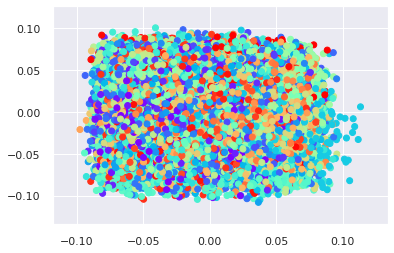

In [94]:
plt.scatter(array_for_classifier[:,0],array_for_classifier[:,1],c=identified_clusters,cmap='rainbow')

In [95]:
wcss=[]
for i in range(1,200):
    wcss.append(len(identified_clusters[identified_clusters==i]))


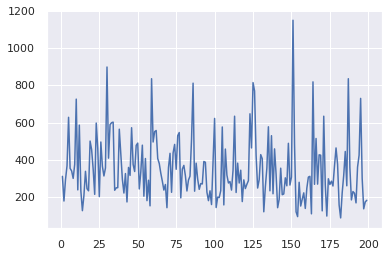

In [96]:
plt.plot(range(1,200), wcss)

In [ ]:
#wcss=[]
#for i in range(1,200):
#    kmeans = KMeans(i)
#    kmeans.fit(x)
#    wcss_iter = kmeans.inertia_
#    wcss.append(wcss_iter)

#number_clusters = range(1,7)
#plt.plot(number_clusters,wcss)
#plt.title('The Elbow title')
#plt.xlabel('Number of clusters')
#plt.ylabel('WCSS')

In [ ]:
#data_with_clusters = data.copy()
#data_with_clusters['Clusters'] = identified_clusters 
#plt.scatter(data_with_clusters['Longitude'],data_with_clusters['Latitude'],c=data_with_clusters['Clusters'],cmap='rainbow')


In [ ]:
#wcss=[]
#for i in range(1,200):
#kmeans = KMeans(i)
#kmeans.fit(x)
#wcss_iter = kmeans.inertia_
#wcss.append(wcss_iter)

#number_clusters = range(1,7)
#plt.plot(number_clusters,wcss)
#plt.title('The Elbow title')
#plt.xlabel('Number of clusters')
#plt.ylabel('WCSS')

In [63]:
columns_to_list = ['noun_sentence_vaderpolarity']

In [65]:
for column in columns_to_list:
    noun_sentence_df_use_sub[column] =noun_sentence_df_use_sub[column].apply(lambda x: list(x.values()))

In [66]:
noun_sentence_df_use_sub

,noun_sentence,count,AVM_Error,AVM_Error_List,Listing_Error,Listing_Error_List,Listingid_List,AVM_Error_Average,Listing_Error_Average,AVM_Error_Indicators,...,noun_sentence_embeddings_503,noun_sentence_embeddings_504,noun_sentence_embeddings_505,noun_sentence_embeddings_506,noun_sentence_embeddings_507,noun_sentence_embeddings_508,noun_sentence_embeddings_509,noun_sentence_embeddings_510,noun_sentence_embeddings_511,noun_sentence_vaderpolarity
0,great mt vernon woods subdivision,1,0.599963,[0.5999625012919896],-0.032455,[-0.032454780361757106],[210208994],0.599963,-0.032455,[],...,-0.023249,0.071483,0.041525,-0.071626,0.020076,0.014105,-0.014863,-0.076484,0.052241,"[0.0, 0.494, 0.506, 0.6249]"
1,private lot decatur sought-after winnona park,1,0.599905,[0.5999051282051282],-0.025538,[-0.025538461538461538],[173286059],0.599905,-0.025538,[],...,-0.008435,0.034792,0.051951,-0.096261,0.016180,-0.010359,-0.072300,-0.033614,-0.000337,"[0.0, 1.0, 0.0, 0.0]"
2,inviting central foyer frames,1,0.599905,[0.5999051282051282],-0.025538,[-0.025538461538461538],[173286059],0.599905,-0.025538,[],...,-0.067230,0.060858,0.072434,-0.027901,-0.045312,0.000064,0.022327,0.036550,0.029850,"[0.0, 0.566, 0.434, 0.3182]"
3,incredible rear yard w/ limitless potential,1,0.599905,[0.5999051282051282],-0.025538,[-0.025538461538461538],[173286059],0.599905,-0.025538,[],...,0.041896,-0.023786,0.078678,-0.070880,0.009270,0.000933,-0.060474,-0.037303,-0.003984,"[0.0, 1.0, 0.0, 0.0]"
4,geothermal youll,1,0.599767,[0.5997665174825175],-0.047552,[-0.04755244755244755],[6952860],0.599767,-0.047552,[],...,-0.085082,0.044714,0.082731,-0.069547,-0.015886,-0.006318,0.032980,0.009901,-0.023533,"[0.0, 1.0, 0.0, 0.0]"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69995,dissappointment youll,1,0.303836,[0.30383583999999997],-0.117333,[-0.11733333333333333],[85223327],0.303836,-0.117333,[],...,-0.117156,0.042731,0.040579,-0.012171,-0.027498,0.027094,0.048864,-0.028174,0.026240,"[0.0, 1.0, 0.0, 0.0]"
69996,large barn plenty room,1,0.303833,[0.30383342075683784],-0.002248,[-0.0022480329711502436],[249219970],0.303833,-0.002248,[],...,-0.057200,0.048425,0.078632,-0.009716,0.009435,0.005963,-0.018532,0.029395,0.065548,"[0.0, 1.0, 0.0, 0.0]"
69997,picnic area adjacent barn,1,0.303833,[0.30383342075683784],-0.002248,[-0.0022480329711502436],[249219970],0.303833,-0.002248,[],...,-0.047949,0.042604,0.067646,-0.080426,0.029286,-0.019320,-0.044046,0.027591,0.064504,"[0.0, 1.0, 0.0, 0.0]"
69998,bedrooms master suite master bath,1,0.303833,[0.30383342075683784],-0.002248,[-0.0022480329711502436],[249219970],0.303833,-0.002248,[],...,-0.067410,0.038543,-0.052673,0.012084,0.037396,-0.014639,0.016048,0.072296,-0.017735,"[0.0, 1.0, 0.0, 0.0]"


In [68]:
columns_to_split = ['noun_sentence_vaderpolarity']

In [134]:
noun_sentence_df_use_sub_2 = noun_sentence_df_use_sub[noun_sentence_df_use_sub['count']>10]

In [70]:
for column in columns_to_split:
    nelements = (len(noun_sentence_df_use_sub[column][0]))
    list_tmp = [str(i) for i in range(nelements)] 
    column_names = [column + '_' + str(i) for i in list_tmp] 
    print(column_names)
    split_df = pd.DataFrame(noun_sentence_df_use_sub[column].tolist(), columns=column_names)
    noun_sentence_df_use_sub = pd.concat([noun_sentence_df_use_sub, split_df], axis=1)
    noun_sentence_df_use_sub = noun_sentence_df_use_sub.drop(columns = [column])

['noun_sentence_vaderpolarity_0', 'noun_sentence_vaderpolarity_1', 'noun_sentence_vaderpolarity_2', 'noun_sentence_vaderpolarity_3']


In [71]:
noun_sentence_df_use_sub

,noun_sentence,count,AVM_Error,AVM_Error_List,Listing_Error,Listing_Error_List,Listingid_List,AVM_Error_Average,Listing_Error_Average,AVM_Error_Indicators,...,noun_sentence_embeddings_506,noun_sentence_embeddings_507,noun_sentence_embeddings_508,noun_sentence_embeddings_509,noun_sentence_embeddings_510,noun_sentence_embeddings_511,noun_sentence_vaderpolarity_0,noun_sentence_vaderpolarity_1,noun_sentence_vaderpolarity_2,noun_sentence_vaderpolarity_3
0,great mt vernon woods subdivision,1,0.599963,[0.5999625012919896],-0.032455,[-0.032454780361757106],[210208994],0.599963,-0.032455,[],...,-0.071626,0.020076,0.014105,-0.014863,-0.076484,0.052241,0.0,0.494,0.506,0.6249
1,private lot decatur sought-after winnona park,1,0.599905,[0.5999051282051282],-0.025538,[-0.025538461538461538],[173286059],0.599905,-0.025538,[],...,-0.096261,0.016180,-0.010359,-0.072300,-0.033614,-0.000337,0.0,1.000,0.000,0.0000
2,inviting central foyer frames,1,0.599905,[0.5999051282051282],-0.025538,[-0.025538461538461538],[173286059],0.599905,-0.025538,[],...,-0.027901,-0.045312,0.000064,0.022327,0.036550,0.029850,0.0,0.566,0.434,0.3182
3,incredible rear yard w/ limitless potential,1,0.599905,[0.5999051282051282],-0.025538,[-0.025538461538461538],[173286059],0.599905,-0.025538,[],...,-0.070880,0.009270,0.000933,-0.060474,-0.037303,-0.003984,0.0,1.000,0.000,0.0000
4,geothermal youll,1,0.599767,[0.5997665174825175],-0.047552,[-0.04755244755244755],[6952860],0.599767,-0.047552,[],...,-0.069547,-0.015886,-0.006318,0.032980,0.009901,-0.023533,0.0,1.000,0.000,0.0000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69995,dissappointment youll,1,0.303836,[0.30383583999999997],-0.117333,[-0.11733333333333333],[85223327],0.303836,-0.117333,[],...,-0.012171,-0.027498,0.027094,0.048864,-0.028174,0.026240,0.0,1.000,0.000,0.0000
69996,large barn plenty room,1,0.303833,[0.30383342075683784],-0.002248,[-0.0022480329711502436],[249219970],0.303833,-0.002248,[],...,-0.009716,0.009435,0.005963,-0.018532,0.029395,0.065548,0.0,1.000,0.000,0.0000
69997,picnic area adjacent barn,1,0.303833,[0.30383342075683784],-0.002248,[-0.0022480329711502436],[249219970],0.303833,-0.002248,[],...,-0.080426,0.029286,-0.019320,-0.044046,0.027591,0.064504,0.0,1.000,0.000,0.0000
69998,bedrooms master suite master bath,1,0.303833,[0.30383342075683784],-0.002248,[-0.0022480329711502436],[249219970],0.303833,-0.002248,[],...,0.012084,0.037396,-0.014639,0.016048,0.072296,-0.017735,0.0,1.000,0.000,0.0000


In [135]:
noun_sentence_df_use_sub_2

,noun_sentence,count,AVM_Error,AVM_Error_List,Listing_Error,Listing_Error_List,Listingid_List,AVM_Error_Average,Listing_Error_Average,AVM_Error_Indicators,...,noun_sentence_embeddings_507,noun_sentence_embeddings_508,noun_sentence_embeddings_509,noun_sentence_embeddings_510,noun_sentence_embeddings_511,noun_sentence_vaderpolarity_0,noun_sentence_vaderpolarity_1,noun_sentence_vaderpolarity_2,noun_sentence_vaderpolarity_3,class
26000,retreat master suite w/ granite double vanity,11,4.522325,"[0.39025886792452835, 0.12062027450980395, 0.4...",-0.155507,"[-0.08443396226415094, 0.02, -0.02153284671532...","[146508732, 139416200, 139641707, 146500417, 1...",0.411120,-0.014137,"[0.41112042193173354, 0.015446387707810153, -1...",...,0.026793,-0.021270,0.032572,-0.016902,0.008543,0.218,0.575,0.207,-0.0258,68
39389,custom tile shower surrounds,14,5.154729,"[0.14302491620111724, 0.40661979989468144, 0.2...",-0.980490,"[-0.06089385474860335, -0.026856240126382307, ...","[133112084, 3866762, 150627723, 126901892, 193...",0.368195,-0.070035,"[0.3681949308519967, 0.03652201781349093, -0.5...",...,0.076322,-0.052748,0.052909,0.068636,-0.041690,0.000,1.000,0.000,0.0000,168
51715,cooking chefs kitchen w/ ss appliances,16,5.403782,"[0.43180979166666666, 0.39025886792452835, 0.3...",-0.135027,"[-0.07916666666666666, -0.08443396226415094, 0...","[126928436, 146508732, 151213515, 146500417, 1...",0.337736,-0.008439,"[0.3377363818082198, 0.03582629784059979, -0.7...",...,0.004643,-0.060163,-0.027878,0.072490,-0.033743,0.000,1.000,0.000,0.0000,179
60198,buyer restrictions,15,4.812058,"[0.27738986206896554, 0.4792184444444445, 0.50...",-0.503188,"[0.0, -0.08333333333333333, -0.023333333333333...","[173991129, 209138536, 209755772, 210720062, 2...",0.320804,-0.033546,"[0.32080388783365865, 0.01759886912125183, -0....",...,0.039354,0.045768,-0.028564,-0.020391,-0.036611,0.000,1.000,0.000,0.0000,148
61190,popular schedule,12,3.824282,"[0.17838055307760936, 0.36272959452343345, 0.3...",-0.136835,"[-0.02671721677074041, -0.003896787783043707, ...","[22330554, 24064699, 24065732, 24100645, 24187...",0.318690,-0.011403,"[0.3186901606812562, 0.007263016725631648, -0....",...,-0.056270,-0.049891,0.054330,-0.012999,0.051699,0.000,0.263,0.737,0.4215,86
61191,fine eateries,12,3.824282,"[0.17838055307760936, 0.36272959452343345, 0.3...",-0.136835,"[-0.02671721677074041, -0.003896787783043707, ...","[22330554, 24064699, 24065732, 24100645, 24187...",0.318690,-0.011403,"[0.3186901606812562, 0.007263016725631648, -0....",...,0.044714,-0.038227,0.005063,-0.026298,-0.072736,0.000,0.357,0.643,0.2023,86
63607,studs renovation,31,9.744215,"[0.4103665640631011, 0.41728319999999997, 0.49...",-0.735297,"[0.0, 0.00028571428571428574, 0.06693333333333...","[197894660, 250604412, 249157137, 222400238, 2...",0.314330,-0.023719,"[0.31432952538041775, 0.04068285195361636, -0....",...,0.038958,0.005857,-0.043502,0.039682,0.037136,0.000,1.000,0.000,0.0000,73


In [138]:
def embed(input):
    return model(input)

In [189]:
def plot_similarity(labels, features, rotation):
    corr = np.inner(features, features)
    sns.set(font_scale=1.2)
    g = sns.heatmap(
      corr,
      xticklabels=labels,
      yticklabels=labels,
      vmin=0,
      vmax=1,
      cmap="YlOrRd")
    g.set_xticklabels(labels, rotation=rotation)
    g.set_title("Semantic Textual Similarity")

def run_and_plot(messages_):
    message_embeddings_ = embed(messages_)
    plot_similarity(messages_, message_embeddings_, 90)

def plot_similarity_serie(labelref, labels, rotation):
    message_embeddings_ = embed(labels)
    print(message_embeddings_.shape)
    messageref_embeddings_ = embed(labelref) 
    corr = []
    for i in range(len(labels)):
        corr.append(np.inner(message_embeddings_[i,:],messageref_embeddings_))
    plt.plot(range(len(labels)),corr)
    plt.xticks(range(len(labels)),labels, rotation=rotation)
    plt.title(labelref)
    

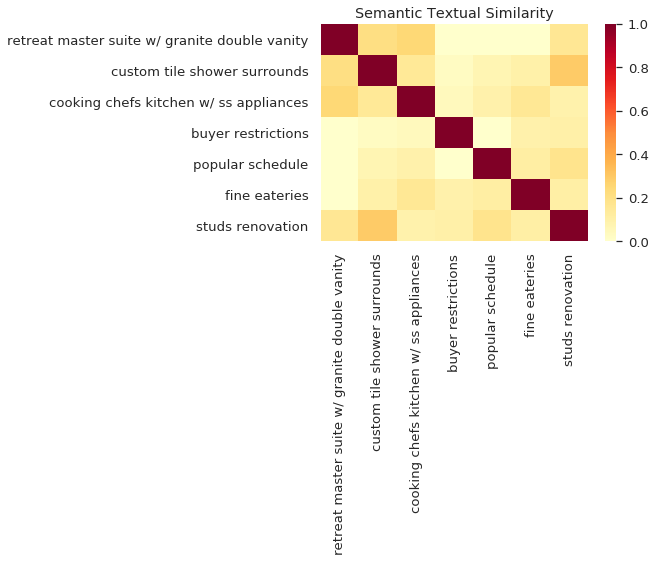

In [185]:
run_and_plot(list(noun_sentence_df_use_sub_2['noun_sentence']))

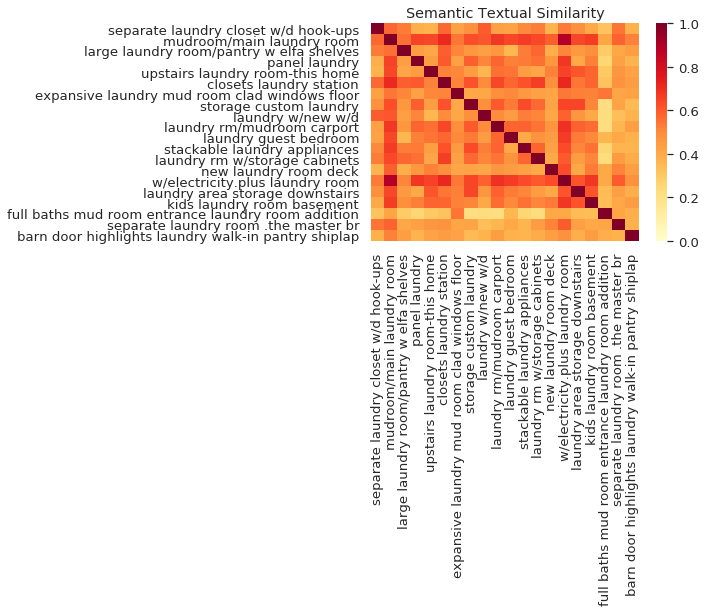

In [195]:
run_and_plot(list(noun_sentence_df_use_sub[noun_sentence_df_use_sub['class']==4]['noun_sentence'][:20]))


In [ ]:
run_and_plot(list(noun_sentence_df_use_sub[noun_sentence_df_use_sub['class']==1]['noun_sentence']))

In [186]:
print(noun_sentence_df_use_sub['noun_sentence'][100])
print(embed([noun_sentence_df_use_sub['noun_sentence'][100]])[0])

spacious brick ranch granite counter tops
tf.Tensor(
[-1.11029157e-02  4.13278770e-03 -7.60507882e-02 -4.24166657e-02
  4.39375918e-03 -3.97174768e-02  5.91227487e-02 -2.25917064e-02
 -4.98393402e-02  5.37170209e-02 -1.81167740e-02  1.62206423e-02
 -4.34289351e-02 -4.01735157e-02 -6.21516220e-02  6.74785525e-02
  5.47951572e-02  7.90996030e-02  2.47307285e-03  3.52451056e-02
  5.08291647e-02  2.14588027e-02  2.59612612e-02  3.18268612e-02
 -2.77723931e-02  5.32269478e-02 -5.88609129e-02 -2.76745539e-02
 -5.44497408e-02 -5.76782040e-02 -4.22610231e-02  3.46956328e-02
  1.85066592e-02  3.86040732e-02 -5.31098247e-02  5.94052151e-02
  3.01235653e-02  7.13258460e-02 -3.10139637e-02  6.75021708e-02
  5.18787950e-02 -4.02272940e-02  5.01724775e-04 -6.36084378e-02
 -6.51117489e-02  1.89026054e-02 -4.22265604e-02 -3.70233841e-02
 -3.73075083e-02  2.20429655e-02 -4.55955192e-02 -2.93157734e-02
  6.03791550e-02 -1.24132810e-02 -2.49745175e-02 -7.00804815e-02
 -5.75207397e-02  6.95910258e-03  2.8

In [187]:
noun_sentence_df_use_sub['noun_sentence'][100]

'spacious brick ranch granite counter tops'

(7, 512)


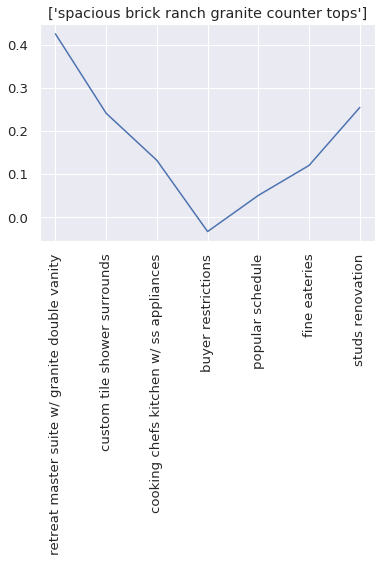

In [190]:
plot_similarity_serie([noun_sentence_df_use_sub['noun_sentence'][100]], 
                      list(noun_sentence_df_use_sub_2['noun_sentence']), 90)

In [52]:
noun_sentence_df_use_sub.to_feather('noun_sentences/' + file + '_withembeddings_erros_' + column + '_nounsentences_sentence_embedding.fea')


In [18]:
noun_sentence_df.to_feather('noun_sentences/' + file + '_withembeddings_erros_' + column + '_nounsentences_sentence_embedding.fea')


ArrowInvalid: ('Can only convert 1-dimensional array values', 'Conversion failed for column noun_sentence_embeddings with type object')

2022-03-01 07:08:05,985 loading file /home/cdsw/.flair/models/sentiment-en-mix-distillbert_4.pt


NameError: name 'reload' is not defined